In [37]:
import numpy as np
from git import Repo
import os
import pandas as pd
from datetime import datetime, timedelta
from git.exc import InvalidGitRepositoryError

analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'simulation')

unique_types = {}i
unique_packages = {}
for folder in os.listdir(analyzed_repos_path):
    folder_path = os.path.join(analyzed_repos_path, folder)
    implementaion = os.path.join(folder_path, "ImplementationSmells.csv")
    design = os.path.join(folder_path, "DesignSmells.csv")
    arch = os.path.join(folder_path, "ArchitectureSmells.csv")
    metrics = os.path.join(folder_path, "TypeMetrics.csv")
    
    if os.path.exists(implementaion) and os.path.exists(arch):        
        imp_df = pd.read_csv(metrics, on_bad_lines='warn')
        unique_types[folder] = imp_df['Type Name'].unique().tolist()
        print("Type added ",  folder, unique_types[folder])
        
        arch_df = pd.read_csv(metrics, on_bad_lines='warn')
        unique_packages[folder] =  imp_df['Package Name'].unique().tolist()
        print("Package added ", folder, unique_packages[folder])

Type added  adf-sample-agent-java ['SampleAmbulanceTargetAllocator', 'SampleBuildingDetector', 'SampleBuildingDetector.DistanceSorter', 'SampleFireTargetAllocator', 'SampleHumanDetector', 'SampleHumanDetector.DistanceSorter', 'SamplePoliceTargetAllocator', 'SampleRoadDetector', 'SampleSearch']
Package added  adf-sample-agent-java ['sample_team.module.complex']
Type added  amod ['CustomAnalysis', 'RoboTaxiRequestHistoGramExport', 'RoboTaxiRequestRecorder', 'RoboTaxiRequestRecorderHtml', 'DemoDispatcher', 'DemoDispatcher.Factory', 'DemoDispatcherShared', 'DemoDispatcherShared.Factory', 'Static', 'UserLocationSpecs', 'UserReferenceFrames', 'UserLocationSpecsTest', 'DemoGenerator', 'DemoGenerator.Factory', 'CustomRouter', 'CustomRouter.Factory', 'CustomRouterDemo', 'ScenarioCreator', 'ScenarioExecutionSequence', 'ScenarioPreparer', 'ScenarioServer', 'ScenarioViewer', 'DemoTest', 'CleanSocketScenarios', 'CommandConsistency', 'EfficiencyScore', 'FleetSizeScore', 'LinComScore', 'ScoreParamete

Package added  tko-electronics-sim ['com.amhsrobotics.circuitsim', 'com.amhsrobotics.circuitsim.files', 'com.amhsrobotics.circuitsim.gui', 'com.amhsrobotics.circuitsim.hardware.devices', 'com.amhsrobotics.circuitsim.hardware', 'com.amhsrobotics.circuitsim.hardware.parts', 'com.amhsrobotics.circuitsim.screens', 'com.amhsrobotics.circuitsim.utility', 'com.amhsrobotics.circuitsim.utility.camera', 'com.amhsrobotics.circuitsim.utility.input', 'com.amhsrobotics.circuitsim.utility.scene', 'com.amhsrobotics.circuitsim.wiring', 'com.amhsrobotics.circuitsim.lwjgl3']
Type added  TraficCERN ['DataManager', 'ExpVarCalculator', 'VehicleCounter', 'Cell', 'Connection', 'MaxVehicleOutflow', 'MultiLaneRoundAbout', 'Phase', 'Ride', 'Road', 'RoundAbout', 'TrafficLightsSystem', 'Vehicle', 'Assets', 'Display', 'ImageLoader', 'SpriteSheet', 'Text', 'KeyManager', 'MouseManager', 'Main', 'Simulator', 'AllNetworkRides', 'Network', 'NetworkComputing', 'NetworkRendering', 'MenuState', 'SettingsState', 'SimState',

In [ ]:
repos_path = os.path.join('data', 'repos', 'simulation')
analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'simulation')
analyzed_commits_path = os.path.join('data', 'analyzed_repos_commits')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

for folder in os.listdir(analyzed_commits_path):
    print("Analyzing ", folder)
    folder_path = os.path.join(analyzed_commits_path, folder)

    res_path = os.path.join(folder_path, "commits.csv")
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
#     print(df)
    
    analyzed_repo_commits_path = os.path.join(analyzed_commits_path, folder)
    print( os.listdir(analyzed_repo_commits_path))

In [69]:
import re
def extract_number(item):
    return int(re.search(r'\d+', item).group())

print(extract_number('adf-sample-agent-java10'))

10


In [189]:
from datetime import datetime

repos_path = os.path.join('data', 'repos', 'simulation')
analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'simulation')
all_analyzed_commits_path = os.path.join('data', 'analyzed_repos_commits')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

imp_agg = pd.DataFrame(columns=['Project','Package', 'Type','Method', 'Smell', 'start', 'end', 'removed'])
des_agg = pd.DataFrame(columns=['Project','Package', 'Type', 'Smell', 'start', 'end', 'removed'])
arch_agg = pd.DataFrame(columns=['Project', 'Package', 'Smell', 'start', 'end', 'removed'])


for folder in os.listdir(all_analyzed_commits_path):
    print("Analyzing ", folder)
    folder_path = os.path.join(all_analyzed_commits_path, folder)

    res_path = os.path.join(folder_path, "commits.csv")
    
    print(res_path)
#     continue
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    
    analyzed_repo_commits_path = os.path.join(all_analyzed_commits_path, folder)
    
    commit_folders = os.listdir(analyzed_repo_commits_path)
    
    commit_folders = [item for item in commit_folders if folder in item]
    commit_folders = sorted(commit_folders, key=extract_number, reverse=True)
    
    for analyzed_commit in commit_folders:
        analyzed_commits_path = os.path.join(analyzed_repo_commits_path, analyzed_commit)
        metrics_path = os.path.join(analyzed_commits_path, 'MethodMetrics.csv')
        implementaion_path = os.path.join(analyzed_commits_path, 'ImplementationSmells.csv')
        design_path = os.path.join(analyzed_commits_path, 'DesignSmells.csv')
        arch_path = os.path.join(analyzed_commits_path, 'ArchitectureSmells.csv')
        
        time_file = os.path.join(analyzed_commits_path, 'commit_date.txt')
        
        if os.path.exists(metrics_path):
            
            time = datetime.now()
            with open(time_file, 'r') as time:
                time = datetime.strptime(time.read(), "%Y-%m-%d %H:%M:%S%z")
            
            
            #Implementaion             
            implementation = pd.read_csv(implementaion_path, on_bad_lines='warn')
            
            implementation = implementation.rename(columns={
            'Project Name': 'Project',
            'Package Name': 'Package',
            'Type Name': 'Type',
            'Method Name': 'Method',
            'Implementation Smell': 'Smell'
            })
            
            
            merged = pd.merge(implementation, imp_agg, on=['Project', 'Package', 'Type', 'Method', 'Smell'], how='outer', indicator=True)

            common_rows = merged[merged['_merge'] == 'both']
            imp_agg.loc[imp_agg.index.isin(common_rows.index), 'end'] = time
            imp_agg.loc[imp_agg.index.isin(common_rows.index), 'removed'] = 0

            
            new_rows =  merged[(merged['_merge'] == 'left_only')]
            new_rows['start'] = time
            new_rows['removed'] = 0
            
            removed_rows =  merged[(merged['_merge'] == 'right_only')]
            imp_agg.loc[imp_agg.index.isin(removed_rows.index), 'removed'] = 1

            imp_agg = pd.concat([imp_agg, new_rows])
            cols_to_drop = set(imp_agg.columns) - set(['Project','Package', 'Type','Method', 'Smell', 'start', 'end', 'removed'])
            imp_agg = imp_agg.drop(cols_to_drop, axis=1)
            
            #Design             
            design = pd.read_csv(design_path, on_bad_lines='warn')
            
            design = design.rename(columns={
            'Project Name': 'Project',
            'Package Name': 'Package',
            'Type Name': 'Type',
            'Design Smell': 'Smell'
            })
            
            
            merged = pd.merge(design, des_agg, on=['Project', 'Package', 'Type', 'Smell'], how='outer', indicator=True)

            common_rows = merged[merged['_merge'] == 'both']
            des_agg.loc[des_agg.index.isin(common_rows.index), 'end'] = time
            des_agg.loc[des_agg.index.isin(common_rows.index), 'removed'] = 0

            
            new_rows =  merged[(merged['_merge'] == 'left_only')]
            new_rows['start'] = time
            new_rows['removed'] = 0
            
            removed_rows =  merged[(merged['_merge'] == 'right_only')]
            des_agg.loc[des_agg.index.isin(removed_rows.index), 'removed'] = 1

            des_agg = pd.concat([des_agg, new_rows])
            cols_to_drop = set(des_agg.columns) - set(['Project','Package', 'Type', 'Smell', 'start', 'end', 'removed'])
            des_agg = des_agg.drop(cols_to_drop, axis=1)
            
            #Architecture             
            architecure = pd.read_csv(arch_path, on_bad_lines='warn')
            
            architecure = architecure.rename(columns={
            'Project Name': 'Project',
            'Package Name': 'Package',
            'Architecture Smell': 'Smell'
            })
            
            
            merged = pd.merge(architecure, arch_agg, on=['Project', 'Package', 'Smell'], how='outer', indicator=True)

            common_rows = merged[merged['_merge'] == 'both']
            arch_agg.loc[arch_agg.index.isin(common_rows.index), 'end'] = time
            arch_agg.loc[arch_agg.index.isin(common_rows.index), 'removed'] = 0

            
            new_rows =  merged[(merged['_merge'] == 'left_only')]
            new_rows['start'] = time
            new_rows['removed'] = 0
            
            removed_rows =  merged[(merged['_merge'] == 'right_only')]
            arch_agg.loc[arch_agg.index.isin(removed_rows.index), 'removed'] = 1

            arch_agg = pd.concat([arch_agg, new_rows])
            cols_to_drop = set(arch_agg.columns) - set(['Project','Package', 'Smell', 'start', 'end', 'removed'])
            arch_agg = arch_agg.drop(cols_to_drop, axis=1)
            
        

#             print("COMMON TYPES-->", [item for item in  unique_types[folder] if item in set(metrics['Type Name'].unique().tolist())])
#             print("###################################")
#             print(metrics['Package Name'].unique().tolist())
#             print("COMMON PACKAGES-->", [item for item in  unique_packages[folder] if item in set(metrics['Package Name'].unique().tolist())])
#             print("###################################")
#             implementation = pd.read_csv(implementaion_path, on_bad_lines='warn')
#             print("IMPLEMENT -->", [item for item in  unique_types[folder] if item in set(implementation['Type Name'].unique().tolist())])
#             print("************************")
            
#             design = pd.read_csv(design_path, on_bad_lines='warn')
#             print("DESIGN -->", [item for item in  unique_types[folder] if item in set(design['Type Name'].unique().tolist())])
#             print("************************")
            
            
#             arch = pd.read_csv(arch_path)
#             print("ARCHITECTURE -->", [item for item in  unique_packages[folder] if item in set(arch['Package Name'].unique().tolist())])
#             print("************************")
        
    


Analyzing  adf-sample-agent-java
data\analyzed_repos_commits\adf-sample-agent-java\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  imp_agg = pd.concat([imp_agg, new_rows])
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  des_agg = pd.concat([des_agg, new_rows])
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 14: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 29: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 37: ex

Skipping line 14: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value

Analyzing  amod
data\analyzed_repos_commits\amod\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Analyzing  amodeus
data\analyzed_repos_commits\amodeus\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 27: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 25: exp

Skipping line 3: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 52: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 8

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 12: expec

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48

Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 11: expecte

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 11: expecte

Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 11: expecte

Analyzing  Black-Scholes-Option-Pricing-Model
data\analyzed_repos_commits\Black-Scholes-Option-Pricing-Model\commits.csv


Skipping line 45: expected 5 fields, saw 6



Analyzing  BoomChess-Android
data\analyzed_repos_commits\BoomChess-Android\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 7: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Analyzing  cas
data\analyzed_repos_commits\cas\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 10: expecte

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  cloudsimplus
data\analyzed_repos_commits\cloudsimplus\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 44: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 140: expected 5 fields, saw 6
Skipping line 168: 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 82: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 121: expected 5 fields, saw 6
Skipping line 190: expected 5 fields, saw 6
Skipping line 192: expected 5 fields, saw 6
Skipping line 21

Skipping line 83: expected 5 fields, saw 6
Skipping line 120: expected 5 fields, saw 6
Skipping line 130: expected 5 fields, saw 6
Skipping line 134: expected 5 fields, saw 6
Skipping line 200: expected 5 fields, saw 6
Skipping line 202: expected 5 fields, saw 6
Skipping line 228: expected 5 fields, saw 6
Skipping line 284: expected 5 fields, saw 6
Skipping line 286: expected 5 fields, saw 6
Skipping line 287: expected 5 fields, saw 6
Skipping line 288: expected 5 fields, saw 6
Skipping line 291: expected 5 fields, saw 6
Skipping line 292: expected 5 fields, saw 6
Skipping line 304: expected 5 fields, saw 6
Skipping line 312: expected 5 fields, saw 6



Analyzing  cloudsimplus-automation
data\analyzed_repos_commits\cloudsimplus-automation\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 23: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 81: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is t

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0


Analyzing  cloudsimplus-examples
data\analyzed_repos_commits\cloudsimplus-examples\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  cloudsimsdn
data\analyzed_repos_commits\cloudsimsdn\commits.csv


Skipping line 24: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 52: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 15: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 40: ex

Skipping line 18: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 52: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 56: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 74: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 80: expected 5 fields, saw 6
Skipping line 98: expected 5 fields, saw 6
Skipping line 124: expected 5 fields, saw 6
Skipping line 146: expected 5 fields, saw 6
Skipping line 152: expected 5 fields, saw 6

Skipping line 18: expected 5 fields, saw 6
Skippin

Analyzing  computer_kurzweil
data\analyzed_repos_commits\computer_kurzweil\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Skipping line 7: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 47: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 56: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 74: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 84: expected 5 fields, saw 6
Skipping line 86: expected 5 fields, saw 6
Skipping line 94: expected 5 fields, saw 6
Skipping line 96: expected 5 fields, saw 6
Skipping line 104: expected 5 fields, saw 6
Skipping line 106: expected 5 fields, saw 6
Skipping line 114: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping

Skipping line 8: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 95: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping

Skipping line 8: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 95: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping

Skipping line 8: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 95: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping

Skipping line 8: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 95: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping

Skipping line 8: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 95: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 13: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 51: ex

Skipping line 13: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 69: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 82: expected 5 fields, saw 6
Skipping line 84: expected 5 fields, saw 6
Skipping line 92: expected 5 fields, saw 6
Skipping line 94: expected 5 fields, saw 6
Skipping line 102: expected 5 fields, saw 6
Skipping line 104: expected 5 fields, saw 6
Skipping line 112: expected 5 fields, saw 6
Skipping line 114: expected 5 fields, saw 6
Skipping line 122: expected 5 fields, saw 6
Skipping line 124: expected 5 fields, saw 6
Skipping line 132: expected 5 fields, saw 6
Skipping line 134: expected 5 fields, saw 6
Ski

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 12: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Analyzing  DesSim
data\analyzed_repos_commits\DesSim\commits.csv


Skipping line 3: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is t

Skipping line 12: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 29: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6

Skipping line 12: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 29: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6



Analyzing  ecosim
data\analyzed_repos_commits\ecosim\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 6: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is tr

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 21: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 35: exp

Skipping line 4: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6

Skipping line 4: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6

Skipping line 4: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Skipping line 4: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6



Analyzing  eqasim-java
data\analyzed_repos_commits\eqasim-java\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 16: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 47: ex

Skipping line 16: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 47: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 82: expected 5 fields, saw 6
Skipping line 89: expected 5 fields, saw 6
Skipping line 91: expected 5 fields, saw 6
Skipping line 94: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 108: expected 5 fields, saw 6
Skipping line 112: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 121: expected 5 fields, saw 6
Skipping line 124: expected 5 fields, saw 6
Skipping line 131: expected 5 fields, saw 6
Skipping line 134: expected 5 fields, saw 6
Skipping line 138: expected 5 fields, saw 6
Skipping line 141: expected 5 fields, saw 6
S

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 16: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 47: expected 5 fields, saw 6
Skipping line 50: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 17: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 52: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  EVLib
data\analyzed_repos_commits\EVLib\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Analyzing  Evolving-Protozoa
data\analyzed_repos_commits\Evolving-Protozoa\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6

C:\Users\riasa\AppDa

Skipping line 6: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 93: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Analyzing  farmsim
data\analyzed_repos_commits\farmsim\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 69: expe

Analyzing  FlockingSimulation
data\analyzed_repos_commits\FlockingSimulation\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  gips
data\analyzed_repos_commits\gips\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 104: expected 5 fields, saw 6
Skipping line 109: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 114: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping line 1

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 62: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 60: exp

Skipping line 3: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 82: expected 5 fields, saw 6
Skipping line 86: expected 5 fields, saw 6
Skipping line 88: expected 5 fields, saw 6
Skipping line 91: expected 5 fields, saw 6

Skipping line 3: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping lin

Analyzing  iflye
data\analyzed_repos_commits\iflye\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 63: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 29: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 75: ex

Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 80: expected 5 fields, saw 6
Skipping line 145: expected 5 fields, saw 6
Skipping line 147: expected 5 fields, saw 6
Skipping line 149: expected 5 fields, saw 6
Skipping line 151: expected 5 fields, saw 6
Skipping line 153: expected 5 fields, saw 6
Skipping line 176: expected 5 fields, saw 6
Skipping line 178: expected 5 fields, saw 6
Skipping line 180: expected 5 fields, saw 6
Skipping line 182: expected 5 fields, saw 6
Skipping line 184: expected 5 fields, saw 6
Skipping line 186: expected 5 fields, saw 6
Skipping line 188: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 84: ex

Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 83: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 145: expected 5 fields, saw 6
Skipping line 147: expected 5 fields, saw 6
Skipping line 149: expected 5 fields, saw 6
Skipping line 151: expected 5 fields, saw 6
Skipping line 153: expected 5 fields, saw 6
Skipping line 167: expected 5 fields, saw 6
Skipping line 169: expected 5 fields, saw 6
Skipping line 171: expected 5 fields, saw 6
Skipping line 173: expected 5 fields, saw 6
Skipping line 175: expected 5 fields, saw 6
Skipping line 177: expected 5 fields, saw 6
Skipping line 179: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

Analyzing  imp_city
data\analyzed_repos_commits\imp_city\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 88: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 43: expe

Analyzing  JSimpleSim
data\analyzed_repos_commits\JSimpleSim\commits.csv


Skipping line 7: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 47: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 41: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  MATSim-UAM
data\analyzed_repos_commits\MATSim-UAM\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 9: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 49: exp

Skipping line 9: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 52: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 72: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 79: expected 5 fields, saw 6
Skipping line 81: expected 5 fields, saw 6
Skipping line 84: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 90: expected 5 fields, saw 6
Skipping line 94: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 100: expected 5 fields, saw 6
Skipping line 103: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 119: expected 5 fields, saw 6
Skipping line 141: expected 5 fields, saw 6
Skipping line 144: expected 5 fields, saw 6
Skipping line 149: expected 5 fields, saw 6
Skipp

Skipping line 9: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 72: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 79: expected 5 fields, saw 6
Skipping line 89: expected 5 fields, saw 6
Skipping line 96: expected 5 fields, saw 6
Skipping line 99: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value 

Skipping line 11: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 52: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 84: expected 5 fields, saw 6
Skipping line 89: expected 5 fields, saw 6
Skipping line 92: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value

Analyzing  microtrafficsim
data\analyzed_repos_commits\microtrafficsim\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 28: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 23: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 23: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 63: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 38: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 35: exp

Skipping line 11: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 82: expected 5 fields, saw 6
Skipping line 94: expected 5 fields, saw 6
Skipping line 98: expected 5 fields, saw 6
Skipping line 106: expected 5 fields, saw 6
Skipping line 110: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping line 120: expected 5 fields, saw 6
Skipping line 122: expected 5 fields, saw 6
Skipping line 124: expected 5 fields, saw 6
Skipping line 126: expected 5 fields, saw 6
Skip

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

Analyzing  Mirage
data\analyzed_repos_commits\Mirage\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 7: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 41: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Skipping line 3: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 93: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa

Skipping line 3: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\A

Skipping line 6: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 52: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 90: expected 5 fields, saw 6
Skipping line 95: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Skipping line 6: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 83: expected 5 fields, saw 6
Skipping line 95: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 6: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 36: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 6: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: exp

Analyzing  MiSim
data\analyzed_repos_commits\MiSim\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 37: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 27: expec

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: exp

Analyzing  multiphysics
data\analyzed_repos_commits\multiphysics\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 16: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 113: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping line 125: expected 5 fields, saw 6
Skipping line 12

Skipping line 16: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 113: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping line 125: expected 5 fields, saw 6
Skipping line 126: expected 5 fields, saw 6
Skipping line 128: expected 5 fields, saw 6
Skipping line 130: expected 5 fields, saw 6
Skipping line 161: expected 5 fields, saw 6
Skipping line 163: expected 5 fields, saw 6
Skipping line 165: expected 5 fields, saw 6
Skipping line 167: expected 5 fields, saw 6
Skipping line 169: expected 5 fields, saw 6
Skipping line 171: expected 5 fields, saw 6
Skipping line 173: expected 5 fields, saw 6
Skipping line 176: expected 5 fields, saw 6
Skipping line 178: expected 5 fields, saw 6
Skipping line 180: expected 5 fields, saw 6
Skipping line 182: expected 5 fields, saw 6
Skipping line 184: expected 5 fields, saw 6
Skipping line 186: expected 5 fields, saw 6
Skipping line 188: expected 5 fields, saw 6
Skipping line 190: expected 5 fie

Skipping line 16: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 113: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping line 125: expected 5 fields, saw 6
Skipping line 126: expected 5 fields, saw 6
Skipping line 128: expected 5 fields, saw 6
Skipping line 130: expected 5 fields, saw 6
Skipping line 161: expected 5 fields, saw 6
Skipping line 163: expected 5 fields, saw 6
Skipping line 165: expected 5 fields, saw 6
Skipping line 167: expected 5 fields, saw 6
Skipping line 169: expected 5 fields, saw 6
Skipping line 171: expected 5 fields, saw 6
Skipping line 173: expected 5 fields, saw 6
Skipping line 176: expected 5 fields, saw 6
Skipping line 178: expected 5 fields, saw 6
Skipping line 180: expected 5 fields, saw 6
Skipping line 182: expected 5 fields, saw 6
Skipping line 184: expected 5 fields, saw 6
Skipping line 186: expected 5 fields, saw 6
Skipping line 188: expected 5 fields, saw 6
Skipping line 190: expected 5 fie

Analyzing  NeuGen
data\analyzed_repos_commits\NeuGen\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 15: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 43: ex

Skipping line 15: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 79: expected 5 fields, saw 6
Skipping line 82: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 88: expected 5 fields, saw 6
Skipping line 90: expected 5 fields, saw 6
Skipping line 93: expected 5 fields, saw 6
Skipping line 96: expected 5 fields, saw 6
Skipping line 100: expected 5 fields, saw 6
Skipping line 103: expected 5 fields, saw 6
Skipping 

Skipping line 15: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 79: expected 5 fields, saw 6
Skipping line 82: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 88: expected 5 fields, saw 6
Skipping line 90: expected 5 fields, saw 6
Skipping line 93: expected 5 fields, saw 6
Skipping line 96: expected 5 fields, saw 6
Skipping line 100: expected 5 fields, saw 6
Skipping line 103: expected 5 fields, saw 6
Skipping 

Analyzing  ORBrake
data\analyzed_repos_commits\ORBrake\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0


Analyzing  Pandemic-Simulator
data\analyzed_repos_commits\Pandemic-Simulator\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  pedroEngine
data\analyzed_repos_commits\pedroEngine\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 6: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is tr

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Skipping line 7: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 47: expected 5 fields, saw 6
Skipping line 72: expected 5 fields, saw 6
Skipping line 84: expected 5 fields, saw 6
Skipping line 127: expected 5 fields, saw 6
Skipping line 129: expected 5 fields, saw 6
Skipping line 131: expected 5 fields, saw 6
Skipping line 133: expected 5 fields, saw 6
Skipping line 135: expected 5 fields, saw 6
Skipping line 151: expected 5 fields, saw 6
Skipping line 153: expected 5 fields, saw 6
Skipping line 155: expected 5 fields, saw 6
Skipping line 157: expected 5 fields, saw 6
Skipping line 159: expected 5 fields, saw 6
Sk

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 7: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 28: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 7: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 27: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 7: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 28: exp

Skipping line 7: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 47: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 136: expected 5 fields, saw 6
Skipping l

Skipping line 7: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 29: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 52: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 99: expected 5 fields, saw 6
Skipping line 118: expected 5 fields, saw 6
Skipping line 139: expected 5 fields, saw 6
Skipping l

Analyzing  plg
data\analyzed_repos_commits\plg\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 12: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is t

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Skipping line 7: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 74: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 84: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 92: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 122: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 12: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 63: 

Analyzing  PowerSystemDataModel
data\analyzed_repos_commits\PowerSystemDataModel\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 31: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.p

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 81: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 108: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 125

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 86: expected 5 fields, saw 6
Skipping line 90: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping line 120

Skipping line 19: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 100: expected 5 fields, saw 6
Skipping line 104: expected 5 fields, saw 6
Skipping line 134: expected 5 fields, saw 6
Skipping line 135: expected 5 fields, saw 6
Skipping line 136: expected 5 fields, saw 6
Skipping line 139: expected 5 fields, saw 6
Skipping line 143: expected 5 fields, saw 6
Skipping line 147: expected 5 fields, saw 6
Skipping line 151: expected 5 fields, saw 6
Skipping line 155: expected 5 fields, saw 6
Skipping line 160: expected 5 fields, saw 6
Skipping line 164: expected 5 fields, saw 6
Skipping line 166: expected 5 fields, saw 6
Skipping line 167: expected 5 fields, saw 6
Skipping line 170: expected 5 fields, saw 6
Skipping line 172: expected 5 fields, saw 6
Skipping line 174: expected 5 fields, saw 6
Skipping line 177: expected 5 fields, saw 6
Skipping line 182: expected 5 fields, saw 6
Skipping line 184: expected 5 field

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 20: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 110: expected 5 fields, saw 6
Skipping line 114: 

Skipping line 25: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 118: expected 5 fields, saw 6
Skipping line 122: expected 5 fields, saw 6
Skipping line 153: expected 5 fields, saw 6
Skipping line 161: expected 5 fields, saw 6
Skipping line 162: expected 5 fields, saw 6
Skipping line 163: expected 5 fields, saw 6
Skipping line 166: expected 5 fields, saw 6
Skipping line 170: expected 5 fields, saw 6
Skipping line 174: expected 5 fields, saw 6
Skipping line 177: expected 5 fields, saw 6
Skipping line 181: expected 5 fields, saw 6
Skipping line 186: expected 5 fields, saw 6
Skipping line 190: expected 5 fields, saw 6
Skipping line 192: expected 5 fields, saw 6
Skipping line 193: expected 5 fields, saw 6
Skipping line 196: expected 5 fields, saw 6
Skipping line 198: expected 5 fields, saw 6
Skipping line 200: expected 5 fields,

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Skipping line 26: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 108: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping line 120: expected 5 fields, saw 6
Skipping line 155: expected 5 fields, saw 6
Skipping line 163: expected 5 fields, saw 6
Skipping line 164: expected 5 fields, saw 6
Skipping line 165: expected 5 fields, saw 6
Skipping line 168: expected 5 fields, saw 6
Skipping line 172: expected 5 fields, saw 6
Skipping line 176: expected 5 fields, saw 6
Skipping line 179: expected 5 fields, saw 6
Skipping line 183: expected 5 fields, saw 6
Skipping line 188: expected 5 fields, saw 6
Skipping line 192: expected 5 fields, saw 6
Skipping line 194: expected 5 fields, saw 6
Skipping line 195: expected 5 fields, saw 6
Skipping line 198: expected 5 fields, saw 6
Skipping line 200: expected 5 fields, saw 6
Skipping line 202: expected 5 fields, saw 6
Skipping line 205: expected 5 fiel

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 27: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 104: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 114

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 27: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 104: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 114

Skipping line 20: expected 4 fields, saw 5

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 26: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 108: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 115

Skipping line 20: expected 4 fields, saw 5

Skipping line 26: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 108: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping line 121: expected 5 fields, saw 6
Skipping line 161: expected 5 fields, saw 6
Skipping line 177: expected 5 fields, saw 6
Skipping line 179: expected 5 fields, saw 6
Skipping line 180: expected 5 fields, saw 6
Skipping line 181: expected 5 fields, saw 6
Skipping line 185: expected 5 fields, saw 6
Skipping line 189: expected 5 fields, saw 6
Skipping line 192: expected 5 fields, saw 6
Skipping line 196: expected 5 fields, saw 6
Skipping line 201: expected 5 fields, saw 6
Skipping line 205: expected 5 fields, saw 6
Skipping line 207: expected 5 fields, saw 6
Skipping line 209: expected 5 fields, saw 6
Skipping line 212: expected 5 fields, saw 6
Skipping line 215: expected 5 fiel

Skipping line 21: expected 4 fields, saw 5

Skipping line 106: expected 5 fields, saw 6
Skipping line 109: expected 5 fields, saw 6
Skipping line 112: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 119: expected 5 fields, saw 6
Skipping line 155: expected 5 fields, saw 6
Skipping line 172: expected 5 fields, saw 6
Skipping line 174: expected 5 fields, saw 6
Skipping line 175: expected 5 fields, saw 6
Skipping line 176: expected 5 fields, saw 6
Skipping line 180: expected 5 fields, saw 6
Skipping line 184: expected 5 fields, saw 6
Skipping line 187: expected 5 fields, saw 6
Skipping line 191: expected 5 fields, saw 6
Skipping line 196: expected 5 fields, saw 6
Skipping line 200: expected 5 fields, saw 6
Skipping line 202: expected 5 fields, saw 6
Skipping line 204: expected 5 fields, saw 6
Skipping line 207: expected 5 fields, saw 6
Skipping line 210: expected 5 fields, saw 6
Skipping line 212: expected 5 fields, saw 6
Skipping line 215: expected 5 fi

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 108: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 114: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping line 121: expected 5 fields, saw 6
Skipping line 1

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 108: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 114: expected 5 fields, saw 6
Skipping line 117: expected 5 fields, saw 6
Skipping line 121: expected 5 fields, saw 6
Skipping line 1

Skipping line 23: expected 4 fields, saw 5

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Skipping line 22: expected 4 fields, saw 5

Skipping line 109: expected 5 fields, saw 6
Skipping line 112: expected 5 fields, saw 6
Skipping line 115: expected 5 fields, saw 6
Skipping line 118: expected 5 fields, saw 6
Skipping line 122: expected 5 fields, saw 6
Skipping line 159: expected 5 fields, saw 6
Skipping line 160: expected 5 fields, saw 6
Skipping line 165: expected 5 fields, saw 6
Skipping line 169: expected 5 fields, saw 6
Skipping line 172: expected 5 fields, saw 6
Skipping line 174: expected 5 fields, saw 6
Skipping line 176: expected 5 fields, saw 6
Skipping line 180: expected 5 fields, saw 6
Skipping line 185: expected 5 fields, saw 6
Skipping line 189: expected 5 fields, saw 6
Skipping line 191: expected 5 fields, saw 6
Skipping line 193: expected 5 fields, saw 6
Skipping line 196: expected 5 fields, saw 6
Skipping line 199: expected 5 fields, saw 6
Skipping line 202: expected 5 fields, saw 6
Skipping line 205: expected 5 fields, saw 6
Skipping line 208: expected 5 fi

Analyzing  PureEdgeSim
data\analyzed_repos_commits\PureEdgeSim\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 14: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is t

Skipping line 11: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.p

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.p

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Analyzing  QSPcc
data\analyzed_repos_commits\QSPcc\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  react-native-ble-peripheral
data\analyzed_repos_commits\react-native-ble-peripheral\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  riscj-computer-mod
data\analyzed_repos_commits\riscj-computer-mod\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 29: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6

C:\Users\riasa\AppDa

Skipping line 3: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 100: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skipping line 114: expected 5 fields, saw 6
Skipping line 120: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535

Analyzing  Robot-Overlord-App
data\analyzed_repos_commits\Robot-Overlord-App\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 13: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is t

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 13: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 89: expected 5 fields, saw 6
Skipping line 94: ex

Skipping line 9: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 72: expected 5 fields, saw 6
Skipping line 93: expected 5 fields, saw 6
Skipping line 127: expected 5 fields, saw 6
Skipping line 129: expected 5 fields, saw 6
Skipping line 131: expected 5 fields, saw 6
Skipping line 162: expected 5 fields, saw 6
Skipping line 213: expected 5 fields, saw 6
Skipping line 218: expected 5 fields, saw 6
Skipping line 220: expected 5 fields, saw 6
Skipping line 231: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 110: expected 5 fields, saw 6
Skipping line 113: 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 43: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 47: expected 5 fields, saw 6
Skipping line 90: expected 5 fields, saw 6
Skipping line 113: expected 5 fields, saw 6
Skipping line 116: 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 44: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 131: expected 5 fields, saw 6
Skipping line 154: 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 19: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 145: expected 5 fields, saw 6
Skipping line 172: 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 45: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 163: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 58: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 56: expected 5 fields, saw 6
Skipping line 58: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 70: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 69: expected 5 fields, saw 6
Skipping line 72: expected 5 fields, saw 6
Skipping line 94: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 69: expected 5 fields, saw 6
Skipping line 72: expected 5 fields, saw 6
Skipping line 94: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 9: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 98: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 85: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 83: expected 5 fields, saw 6
Skipping line 94: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 12: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 49: 

Analyzing  SASS
data\analyzed_repos_commits\SASS\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is tr

Skipping line 25: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  ShapeOfThingsThatWere
data\analyzed_repos_commits\ShapeOfThingsThatWere\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 37: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 27: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 27: exp

Skipping line 5: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 50: expected 5 fields, saw 6
Skipping line 52: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 90: expected 5 fields, saw 6
Skipping line 95: expected 5 fields, saw 6
Skipping line 99: expected 5 fields, saw 6
Skipping lin

Analyzing  simulated-evolution
data\analyzed_repos_commits\simulated-evolution\commits.csv


Skipping line 3: expected 5 fields, saw 6
Skipping line 4: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Skipping line 7: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 47: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 56: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 74: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 84: expected 5 fields, saw 6
Skipping line 86: expected 5 fields, saw 6
Skipping line 94: expected 5 fields, saw 6
Skipping line 96: expected 5 fields, saw 6
Skipping line 104: expected 5 fields, saw 6
Skipping line 106: expected 5 fields, saw 6
Skipping line 114: expected 5 fields, saw 6
Skipping line 116: expected 5 fields, saw 6
Skipping

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 14: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 28: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 53: ex

Analyzing  sinalgo
data\analyzed_repos_commits\sinalgo\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  skiverse
data\analyzed_repos_commits\skiverse\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 9: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 28: exp

Analyzing  smockin
data\analyzed_repos_commits\smockin\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 16: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 21: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 33: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 38: ex

Skipping line 36: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 56: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 74: expected 5 fields, saw 6
Skipping line 82: expected 5 fields, saw 6
Skipping line 84: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 28: expected 5 fields, saw 6
Skipping line 29: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 52: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 34: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 39: ex

Skipping line 34: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 86: expected 5 fields, saw 6
Skipping line 88: expected 5 fields, saw 6
Skipping line 98: expected 5 fields, saw 6
Skipping line 99: expected 5 fields, saw 6
Skipping line 101: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 108: expected 5 fields, saw 6
Skipping line 112: expected 5 fields, saw 6
Skippin

Skipping line 33: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 85: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 98: expected 5 fields, saw 6
Skipping line 100: expected 5 fields, saw 6
Skipping line 104: expected 5 fields, saw 6
Skipping line 107: expected 5 fields, saw 6
Skipping line 111: expected 5 fields, saw 6
Skippin

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 32: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 56: expected 5 fields, saw 6
Skipping line 57: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 33: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 43: expected 5 fields, saw 6
Skipping line 62: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 17: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 39: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 18: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 33: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 21: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 36: ex

Skipping line 21: expected 5 fields, saw 6
Skipping line 22: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 26: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 56: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 86: expected 5 fields, saw 6
Skipping line 87: expected 5 fields, saw 6
Skipping li

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 22: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 25: expected 5 fields, saw 6
Skipping line 27: expected 5 fields, saw 6
Skipping line 37: ex

Analyzing  supermarket-simulator
data\analyzed_repos_commits\supermarket-simulator\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Analyzing  synthea
data\analyzed_repos_commits\synthea\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 24: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 9: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 9: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 22: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 23: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 23: expe

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 7: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 12: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 36: ex

Skipping line 12: expected 5 fields, saw 6
Skipping line 15: expected 5 fields, saw 6
Skipping line 18: expected 5 fields, saw 6
Skipping line 21: expected 5 fields, saw 6
Skipping line 34: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 40: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 46: expected 5 fields, saw 6
Skipping line 49: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 69: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping li

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 42: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 55: expected 5 fields, saw 6
Skipping line 57: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 72: expected 5 fields, saw 6
Skipping line 74: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 80: expected 5 fields, saw 6
Skipping li

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 17: expected 5 fields, saw 6
Skipping line 20: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 54: expected 5 fields, saw 6
Skipping line 59: expected 5 fields, saw 6
Skipping line 61: expected 5 fields, saw 6
Skipping line 63: expected 5 fields, saw 6
Skipping line 65: expected 5 fields, saw 6
Skipping line 67: expected 5 fields, saw 6
Skipping line 69: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 74: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 80: expected 5 fields, saw 6
Skipping line 82: expected 5 fields, saw 6
Skipping li

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 79: expected 5 fields, saw 6
Skipping line 81: expected 5 fields, saw 6
Skipping li

Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 79: expected 5 fields, saw 6
Skipping line 81: expected 5 fields, saw 6
Skipping li

Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6
Skipping line 37: expected 5 fields, saw 6
Skipping line 39: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 44: expected 5 fields, saw 6
Skipping line 53: expected 5 fields, saw 6
Skipping line 58: expected 5 fields, saw 6
Skipping line 60: expected 5 fields, saw 6
Skipping line 62: expected 5 fields, saw 6
Skipping line 64: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 68: expected 5 fields, saw 6
Skipping line 70: expected 5 fields, saw 6
Skipping line 73: expected 5 fields, saw 6
Skipping line 75: expected 5 fields, saw 6
Skipping line 77: expected 5 fields, saw 6
Skipping line 79: expected 5 fields, saw 6
Skipping line 81: expected 5 fields, saw 6
Skipping li

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 16: expected 5 fields, saw 6
Skipping line 19: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 35: ex

Analyzing  tko-electronics-sim
data\analyzed_repos_commits\tko-electronics-sim\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 27: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 65: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 69: expected 5 fields, saw 6

Skipping line 65: expected 5 fields, saw 6
Skipping line 66: expected 5 fields, saw 6
Skipping line 69: e

Analyzing  TraficCERN
data\analyzed_repos_commits\TraficCERN\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 8: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Analyzing  TraJ
data\analyzed_repos_commits\TraJ\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 3: expected 5 fields, saw 6
Skipping line 5: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 35: expected 5 fields, saw 6

C:\Users\riasa\AppData\

Analyzing  universe-maker-app
data\analyzed_repos_commits\universe-maker-app\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 16: expe

Analyzing  varsim
data\analyzed_repos_commits\varsim\commits.csv


C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 7: expected 5 fields, saw 6
Skipping line 9: expected 5 fields, saw 6
Skipping line 11: expected 5 fields, saw 6
Skipping line 14: expected 5 fields, saw 6
Skipping line 24: expec

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 4: expected 5 fields, saw 6
Skipping line 6: expected 5 fields, saw 6
Skipping line 8: expected 5 fields, saw 6
Skipping line 10: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 19: expec

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 37: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 33: expected 5 fields, saw 6
Skipping line 37: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 29: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 35: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 29: expected 5 fields, saw 6
Skipping line 31: expected 5 fields, saw 6
Skipping line 35: exp

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 36: exp

Skipping line 5: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 69: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 83: expected 5 fields, saw 6
Skipping line 92: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 98: expected 5 fields, saw 6
Skipping line 100: expected 5 fields, saw 6
Skipping line 102: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 108: expected 5 fields, saw 6
Skipping line 110: expected 5 fields, saw 6
Skippin

Skipping line 5: expected 5 fields, saw 6
Skipping line 12: expected 5 fields, saw 6
Skipping line 23: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 36: expected 5 fields, saw 6
Skipping line 38: expected 5 fields, saw 6
Skipping line 41: expected 5 fields, saw 6
Skipping line 48: expected 5 fields, saw 6
Skipping line 51: expected 5 fields, saw 6
Skipping line 69: expected 5 fields, saw 6
Skipping line 71: expected 5 fields, saw 6
Skipping line 76: expected 5 fields, saw 6
Skipping line 78: expected 5 fields, saw 6
Skipping line 83: expected 5 fields, saw 6
Skipping line 92: expected 5 fields, saw 6
Skipping line 97: expected 5 fields, saw 6
Skipping line 98: expected 5 fields, saw 6
Skipping line 100: expected 5 fields, saw 6
Skipping line 102: expected 5 fields, saw 6
Skipping line 105: expected 5 fields, saw 6
Skipping line 108: expected 5 fields, saw 6
Skipping line 110: expected 5 fields, saw 6
Skippin

C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['start'] = time
C:\Users\riasa\AppData\Local\Temp\ipykernel_61608\3535376399.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows['removed'] = 0
Skipping line 5: expected 5 fields, saw 6
Skipping line 13: expected 5 fields, saw 6
Skipping line 24: expected 5 fields, saw 6
Skipping line 30: expected 5 fields, saw 6
Skipping line 32: expected 5 fields, saw 6
Skipping line 36: exp

In [190]:
imp_agg[imp_agg['removed']==1]

Project                              Package           Type  \
10038     amodeus       ch.ethz.idsc.amodeus.testutils   TestPreparer   
10534     amodeus  ch.ethz.idsc.amodeus.virtualnetwork   SaveLoadTest   
10535     amodeus  ch.ethz.idsc.amodeus.virtualnetwork   SaveLoadTest   
10536     amodeus  ch.ethz.idsc.amodeus.virtualnetwork   SaveLoadTest   
10537     amodeus  ch.ethz.idsc.amodeus.virtualnetwork   SaveLoadTest   
...           ...                                  ...            ...   
41478  TraficCERN                               states  SettingsState   
41479  TraficCERN                               states  SettingsState   
41480  TraficCERN                               states  SettingsState   
41481  TraficCERN                               states  SettingsState   
41482  TraficCERN                               states  SettingsState   

        Method           Smell                      start  \
10038  prepare  Long Statement  2018-09-21 15:37:24+02:00   
10534     test    Magic Number  2018-10-19 16:40:33+02:00   
10535     test    Magic Number  2018-10-19 16:40:33+02:00   
10536     test    Magic Number  2018-10-19 16:40:33+02:00   
10537     test    Magic Number  2018-10-19 16:40:33+02:00   
...        ...             ...                        ...   
41478   render    Magic Number  2019-06-20 22:06:07+02:00   
41479   render    Magic Number  2019-06-20 22:06:07+02:00   
41480   render    Magic Number  2019-06-20 22:06:07+02:00   
41481   render    Magic Number  2019-06-20 22:06:07+02:00   
41482   render    Magic Number  2019-06-20 22:06:07+02:00   

                             end removed  
10038  2021-01-03 22:56:45-05:00       1  
10534  2021-01-03 22:56:45-05:00       1  
10535  2021-01-03 22:56:45-05:00       1  
10536  2021-01-03 22:56:45-05:00       1  
10537  2021-01-03 22:56:45-05:00       1  
...                          ...     ...  
41478  2021-01-03 22:56:45-05:00       1  
41479  2021-01-03 22:56:45-05:00       1  
41480  2021-01-03 22:56:45-05:00       1  
41481  2021-01-03 22:56:45-05:00       1  
41482  2021-01-03 22:56:45-05:00       1  

[18834 rows x 8 columns]

In [191]:
imp_agg[imp_agg['removed']==0]

Project                           Package  \
0     adf-sample-agent-java   adf.sample.algorithm.clustering   
1     adf-sample-agent-java   adf.sample.algorithm.clustering   
2     adf-sample-agent-java   adf.sample.algorithm.clustering   
3     adf-sample-agent-java   adf.sample.algorithm.clustering   
4     adf-sample-agent-java   adf.sample.algorithm.clustering   
...                     ...                               ...   
8954                 varsim     com.bina.varsim.types.variant   
8955                 varsim     com.bina.varsim.types.variant   
8432                 varsim  com.bina.varsim.tools.evaluation   
9353                 varsim              com.bina.varsim.util   
9354                 varsim              com.bina.varsim.util   

                         Type              Method                Smell  \
0             PathBasedKMeans     PathBasedKMeans  Long Parameter List   
1             PathBasedKMeans     PathBasedKMeans  Long Parameter List   
2             PathBasedKMeans     PathBasedKMeans  Long Parameter List   
3             PathBasedKMeans          precompute       Long Statement   
4             PathBasedKMeans              resume       Long Statement   
...                       ...                 ...                  ...   
8954                  Variant  getVariantInterval         Magic Number   
8955                  Variant  getVariantInterval         Magic Number   
8432  VCFCompareResultsParser       countVariants  Long Parameter List   
9353                VCFparser           VCFparser  Long Parameter List   
9354                VCFparser           VCFparser  Long Parameter List   

                          start                        end removed  
0     2015-12-02 13:42:29+09:00  2022-01-28 06:10:29-08:00       0  
1     2015-12-02 13:42:29+09:00  2022-01-28 06:10:29-08:00       0  
2     2015-12-02 13:42:29+09:00  2022-01-28 06:10:29-08:00       0  
3     2015-12-02 13:42:29+09:00  2022-01-28 06:10:29-08:00       0  
4     2015-12-02 13:42:29+09:00  2022-01-28 06:10:29-08:00       0  
...                         ...                        ...     ...  
8954  2021-09-20 13:16:53-04:00  2022-01-28 06:10:29-08:00       0  
8955  2021-09-20 13:16:53-04:00  2022-01-28 06:10:29-08:00       0  
8432  2021-10-25 19:48:24-07:00  2022-01-28 06:10:29-08:00       0  
9353  2021-10-25 19:48:24-07:00  2022-01-28 06:10:29-08:00       0  
9354  2021-10-25 19:48:24-07:00  2022-01-28 06:10:29-08:00       0  

[87810 rows x 8 columns]

In [194]:
imp_agg.dropna(inplace=True)

C:\Users\riasa\anaconda3\Lib\site-packages\lifelines\utils\__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


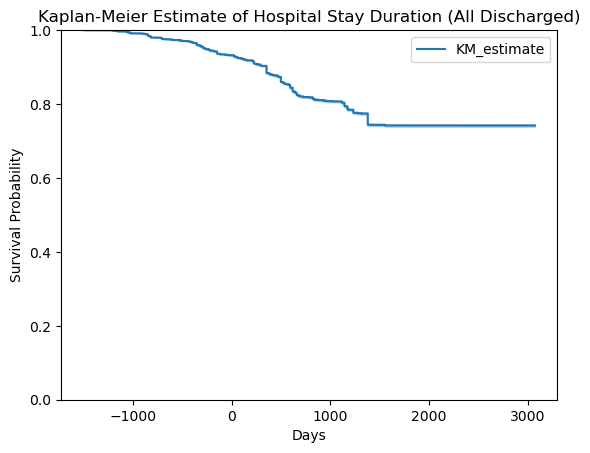

In [197]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

imp_agg['start'] = pd.to_datetime(imp_agg['start'], utc=True)
imp_agg['end'] = pd.to_datetime(imp_agg['end'], utc=True)

imp_agg['time_diff'] = imp_agg['end'] - imp_agg['start']
imp_agg['days'] = imp_agg['time_diff'].dt.days

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(durations=imp_agg['days'], event_observed=imp_agg['removed'])

# Plot the Kaplan-Meier estimate
kmf.plot_survival_function()
plt.title('Kaplan-Meier Estimate of Hospital Stay Duration (All Discharged)')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.ylim([0,1])

plt.show()


In [2]:
import numpy as np
from git import Repo
import os
import pandas as pd
from datetime import datetime, timedelta
from git.exc import InvalidGitRepositoryError


analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'extended-simulation')

unique_types_sim = []
unique_packages_sim = []
for folder in os.listdir(analyzed_repos_path):
    folder_path = os.path.join(analyzed_repos_path, folder)
    implementaion = os.path.join(folder_path, "ImplementationSmells.csv")
    design = os.path.join(folder_path, "DesignSmells.csv")
    arch = os.path.join(folder_path, "ArchitectureSmells.csv")
    metrics = os.path.join(folder_path, "TypeMetrics.csv")
    
    if os.path.exists(implementaion) and os.path.exists(arch):        
        imp_df = pd.read_csv(implementaion, on_bad_lines='warn')
        unique_types.append({folder: imp_df['Type Name'].unique().tolist()})
        print("Type added ",  unique_types[-1])
        
        arch_df = pd.read_csv(arch, on_bad_lines='warn')
        unique_packages.append({folder: imp_df['Package Name'].unique().tolist()})
        print("Package added ", unique_packages[-1])

Type added  {'afterburner': ['MavenWrapperDownloader', 'BasketController', 'FundCheckController', 'ProducstAndPricesValidator', 'TotalAmountCheckValidator', 'AfterburnerConfig', 'RemoteCallHttpClient', 'RemoteCallOkHttp', 'RemoteCallUtil', 'AfterburnerAsyncConfig', 'AfterburnerEmployeeDbConfig', 'OpenApiConfig', 'RequestLoggingFilterConfig', 'SpringSecurityConfig', 'AbundantLogger', 'CpuBurner', 'FileUpload', 'FlakyService', 'GoParallel', 'MemoryChurn', 'MemoryLeak', 'MindMyBusiness', 'RemoteCallController', 'SystemInfoController', 'TcpConnector', 'MusicMachineMemory', 'AfterburnerWebMvcConfigurer', 'ErrorPage', 'MatrixCalculator', 'MatrixCalculatorTest', 'CustomThroughputGauge', 'AfterburnerRemote', 'AutonomousWorker', 'TrafficLightSocketService', 'Calculator', 'TrafficLightSocketListener', 'CalculatorTest', 'AfterburnerStub']}
Package added  {'afterburner': ['(default package)', 'io.perfana.afterburner.basket', 'io.perfana.afterburner.basket.validate', 'io.perfana.afterburner.client'

Type added  {'CloudReports': ['CustomerRegistryDAO', 'DatacenterRegistryDAO', 'MigrationDAO', 'NetworkMapEntryDAO', 'RandomNumberDAO', 'ReportDataDAO', 'SanStorageRegistryDAO', 'Database', 'SQLiteDialect', 'Broker', 'ExtensionsLoader', 'PowerDatacenter', 'VmAllocationPolicySingleThreshold', 'AboutView', 'CloudView', 'Dialog', 'EditLink', 'LogoPanel', 'MailNotificationSettings', 'MainView', 'ManageEnvironments', 'NewEnvironment', 'RandomnessSettings', 'SimulationSettings', 'SimulationView', 'EditVm', 'NewCustomer', 'OverallCustomerView', 'RemoveCustomer', 'SpecificCustomerView', 'EditHost', 'EditSAN', 'NewDatacenter', 'NewSAN', 'OverallDatacenterView', 'RemoveDatacenter', 'SpecificDatacenterView', 'CustomerRegistry', 'DatacenterRegistry', 'HostRegistry', 'Migration', 'ReportData', 'SanStorageRegistry', 'UtilizationProfile', 'VirtualMachineRegistry', 'CustomerReport', 'DatacenterReport', 'DataCollector', 'LogReport', 'Report', 'EntityFactory', 'Simulation', 'ElapsedTime', 'FileIO']}
Pack

Type added  {'DFaaSCloud': ['Cloudlet', 'CloudletSchedulerDynamicWorkload', 'CloudletSchedulerSpaceShared', 'CloudletSchedulerTimeShared', 'Datacenter', 'DatacenterBroker', 'DatacenterCharacteristics', 'HarddriveStorage', 'Host', 'HostDynamicWorkload', 'InfoPacket', 'NetworkTopology', 'ResCloudlet', 'UtilizationModelPlanetLabInMemory', 'Vm', 'VmSchedulerTimeShared', 'VmSchedulerTimeSharedOverSubscription', 'CloudInformationService', 'CloudSim', 'SimEvent', 'LognormalDistr', 'ZipfDistr', 'CloudletList', 'AppCloudlet', 'EdgeSwitch', 'HostPacket', 'NetDatacenterBroker', 'NetworkCloudlet', 'NetworkCloudletSpaceSharedScheduler', 'NetworkDatacenter', 'NetworkHost', 'NetworkVm', 'Switch', 'TaskStage', 'WorkflowApp', 'FloydWarshall_Float', 'GraphReaderBrite', 'PowerModelCubic', 'PowerModelLinear', 'PowerModelSpecPower', 'PowerModelSqrt', 'PowerModelSquare', 'PowerDatacenter', 'PowerDatacenterBroker', 'PowerDatacenterNonPowerAware', 'PowerHost', 'PowerHostUtilizationHistory', 'PowerVm', 'PowerV

Type added  {'get-kanban-simulation': ['Board', 'BoardRunner', 'DaysFactory', 'FinancialSummary', 'FinancialSummaryStatistics', 'RunConfiguration', 'VariableSubscriberProfile', 'WipLimitAdjustment', 'DaysTest', 'DayTest', 'FinancialSummaryTest', 'FixedSubscriberProfileTest', 'VariableSubscriberProfileTest', 'AbstractCard', 'ExpediteCard', 'FixedDateCard', 'IntangibleCard', 'StandardCard', 'AbstractCardTest', 'BlockerTest', 'FixedDateCardTest', 'IntangibleCardTest', 'StandardCardTest', 'Options', 'SelectedColumn', 'StateColumn', 'DeployedColumnTest', 'ReadyToDeployColumnTest', 'SelectedColumnTest', 'StateColumnTest', 'DiceGroup', 'RandomDice', 'StateDice', 'DiceGroupTest', 'RandomDiceTest', 'StateDiceTest', 'CarlosFiredTest', 'CarlosHiredTest', 'MargaretsFeaturesTest', 'TammyHiredTest', 'TedsTrainingOpportunityTest', 'ComplexDiceAssignmentStrategy', 'WeightedShortestJobFirstPrioritisationStrategy', 'DiceAssignmentStrategyTest', 'NoCrossSkillingDiceAssignmentStrategyTest', 'SizePrioritis

Type added  {'JuggleMasterPro': ['BallActions', 'BallsJScrollBar', 'BallsThreeStatesJCheckBox', 'AlternateColorsJScrollBar', 'BallColorJButton', 'BallsColorsJTextPane', 'BallsColorsThreeStatesJCheckBox', 'ColorActions', 'ColorChooserDropDownJButton', 'ColorsStyledDocument', 'ControlJFrame', 'ControlJFrameListener', 'ControlJSplitPane', 'BallsNumberJCheckBox', 'BallsNumberJComboBox', 'ClearCriteriaJButton', 'CriteriaActions', 'CriteriaJButton', 'CriteriaJComboBox', 'CriteriaJDialog', 'CriteriaPlainDocument', 'FilterJLabel', 'FiltersJButton', 'FiltersJDialog', 'FiltersJMenuItem', 'FindJDialog', 'FindJMenuItem', 'InvalidPatternsJCheckBox', 'InvalidPatternsJLabel', 'MarkJButton', 'MarkJCheckBox', 'MarkJComboBox', 'SkillJCheckBox', 'SkillJComboBox', 'ClipboardJButton', 'ClipboardJCheckBoxMenuItem', 'ClipboardJDialog', 'ClipboardJTextArea', 'ConsoleJButton', 'ConsoleJCheckBoxMenuItem', 'ConsoleJDialog', 'DataActions', 'DataJCheckBoxMenuItem', 'DataJFrame', 'DataJTable', 'DataJToggleButton', 

Package added  {'magmaChallenge': ['hso.autonomy.util.commandline', 'hso.autonomy.util.connection.impl', 'hso.autonomy.util.file', 'hso.autonomy.util.geometry', 'hso.autonomy.util.geometry.interpolation.pose', 'hso.autonomy.util.geometry.interpolation.progress', 'hso.autonomy.util.geometry.positionFilter', 'hso.autonomy.util.misc', 'hso.autonomy.util.symboltreeparser', 'hso.autonomy.util.timing', 'magma.common.challenge', 'magma.common.spark', 'magma.monitor.command.impl', 'magma.monitor.command', 'magma.monitor.general.impl', 'magma.monitor.messageparser.impl', 'magma.monitor.worldmodel.impl', 'magma.tools.benchmark.controller', 'magma.tools.benchmark.model.bench', 'magma.tools.benchmark.model.bench.goaliechallenge', 'magma.tools.benchmark.model.bench.keepawaychallenge', 'magma.tools.benchmark.model.bench.kickchallenge', 'magma.tools.benchmark.model.bench.passingchallenge', 'magma.tools.benchmark.model.bench.rollingballchallenge', 'magma.tools.benchmark.model.bench.runchallenge', 'mag

Type added  {'minimal': ['OldConfiguration', 'Configuration', 'IConfigAttribute', 'Camera', 'GameEntity', 'Light', 'Game', 'Animations', 'Renderer', 'Window', 'GameEntityRenderer', 'InfluencerRenderer', 'LightRenderer', 'TextEntityRenderer', 'GameKeyListener', 'Material', 'PhysicEngine', 'RandomUtils', 'World', 'StringUtils', 'CoinBehavior', 'RainEffectBehavior', 'StormBehavior', 'WindyWeatherBehavior', 'DemoListener', 'TitleListener', 'DemoScene', 'TitleScene', 'CameraStepdefs', 'GameStepdefs', 'RendererStepdefs']}
Package added  {'minimal': ['fr.snapgames.game.core.config', 'fr.snapgames.game.core.configuration', 'fr.snapgames.game.core.entity', 'fr.snapgames.game.core', 'fr.snapgames.game.core.graphics', 'fr.snapgames.game.core.graphics.plugins', 'fr.snapgames.game.core.io', 'fr.snapgames.game.core.math', 'fr.snapgames.game.core.utils', 'fr.snapgames.game.demo101.behaviors', 'fr.snapgames.game.demo101.io', 'fr.snapgames.game.demo101.scenes', 'fr.snapgames.game.tests.features']}
Type

Type added  {'otm-sim': ['AbstractActuator', 'AbstractActuatorLaneGroup', 'ActuatorFlowToLinks', 'ActuatorLaneGroupCapacity', 'ActuatorSignal', 'ActuatorSplit', 'PhaseTransition', 'OTM', 'RunParameters', 'Path', 'Subnetwork', 'AbstractController', 'ControllerSchedule', 'CommandSignal', 'ControllerFlowToLinks', 'ControllerOfframpFlow', 'ControllerRestrictLaneGroup', 'ControllerTollLaneGroup', 'AbstractControllerRampMetering', 'ControllerAlinea', 'ControllerFixedRate', 'ControllerProfileRate', 'ControllerSignalPretimed', 'AbstractDemandGenerator', 'AbstractFluidModel', 'AbstractLaneGroup', 'AbstractModel', 'AbstractVehicleModel', 'EventFluidModelUpdate', 'EventFluidStateUpdate', 'InterfaceModel', 'Link', 'Network', 'Output', 'RoadConnection', 'Scenario', 'ScenarioFactory', 'AddLanes', 'RoadGeometry', 'PacketLink', 'AbstractEvent', 'Dispatcher', 'EventComputeTravelTime', 'EventCreateVehicle', 'EventInitializeController', 'EventStopSimulation', 'EventTimedWrite', 'AbstractLanegroupEvent', 

Package added  {'populus': ['edu.umn.ecology.populus.constants', 'edu.umn.ecology.populus.core', 'edu.umn.ecology.populus.eegg', 'edu.umn.ecology.populus.fileio', 'edu.umn.ecology.populus.help', 'edu.umn.ecology.populus.math', 'edu.umn.ecology.populus.model.aids', 'edu.umn.ecology.populus.model.aidsbasic', 'edu.umn.ecology.populus.model.aidst', 'edu.umn.ecology.populus.model.appd', 'edu.umn.ecology.populus.model.appdfr', 'edu.umn.ecology.populus.model.appdi', 'edu.umn.ecology.populus.model.appdnb', 'edu.umn.ecology.populus.model.appdnrs', 'edu.umn.ecology.populus.model.appdtpr', 'edu.umn.ecology.populus.model.aspg', 'edu.umn.ecology.populus.model.bp', 'edu.umn.ecology.populus.model.cp', 'edu.umn.ecology.populus.model.das', 'edu.umn.ecology.populus.model.ddsgv', 'edu.umn.ecology.populus.model.dig', 'edu.umn.ecology.populus.model.dsoqc', 'edu.umn.ecology.populus.model.eov', 'edu.umn.ecology.populus.model.fdsdm', 'edu.umn.ecology.populus.model.fdsess', 'edu.umn.ecology.populus.model.gdamc

Type added  {'prngine': ['Colorizer', 'RandomEnginePerf', 'Bytes', 'KISS32Random', 'KISS64Random', 'LCG64ShiftRandom', 'MT19937_32Random', 'MT19937_64Random', 'Random32', 'Seeds', 'XOR32ShiftRandom', 'XOR64ShiftRandom', 'BytesTest', 'KISS32RandomCompatibilityTest', 'KISS64RandomCompatibilityTest', 'LCG64ShiftRandomCompatibilityTest', 'Parse', 'RandomGeneratorServiceTest', 'TestData', 'DieHarder', 'FileRandom', 'RandomByteStream']}
Package added  {'prngine': ['io.jenetics.gradle', 'io.jenetics.prngine', 'io.jenetics.prngine.internal']}
Type added  {'ProcessVCD': ['CheckVCDForCounters', 'testVCD', 'SignalHistory', 'TimePoint', 'VCD']}
Package added  {'ProcessVCD': ['(default package)', 'vcd']}
Type added  {'ProjektGG': ['DesktopLauncher', 'LockstepGameServer', 'ServerDiscoveryHandler', 'SimpleGameClient', 'SimpleGameServer', 'JSONLoader', 'SimpleJSONParser', 'JsonAssetTest', 'JsonTestObject', 'SimpleJSONParserTest', 'ProjektGGApplication', 'ProjektGGApplicationContext', 'BaseRenderData',

Type added  {'RADDOSE-3D': ['InputfileLexer', 'InputfileParser', '__Test__', 'Assertions', 'BeamExperimental', 'BeamExperimentalpgm', 'BeamGaussian', 'BeamTophat', 'ClassFactory', 'CoefCalcAverage', 'CoefCalcCompute', 'CoefCalcFromCIF', 'CoefCalcFromParams', 'CoefCalcFromPDB', 'CoefCalcFromSequence', 'CoefCalcFromSequenceSAXS', 'CoefCalcMicroED', 'CoefCalcRaddose', 'CoefCalcSAXS', 'CoefCalcSmallMolecules', 'ContainerElemental', 'ContainerMixture', 'ContainerSemiTransparent', 'Crystal', 'CrystalCuboid', 'CrystalCuboidOld', 'CrystalCylinder', 'CrystalPolyhedron', 'CrystalSpherical', 'CrystalSphericalNew', 'CrystalSphericalOld', 'DDMBfactor', 'DDMLeal', 'DDMLinear', 'Element', 'ElementDatabaseEM', 'ElementEM', 'NormalEnergyDistribution', 'Experiment', 'ExposeObserver', 'ExposureSummary', 'Histogram', 'ImportWireframeObj', 'MC', 'MicroED', 'OutputDWDs', 'OutputFactory', 'OutputFinalDoseStateCSV', 'OutputFinalDoseStateR', 'OutputFinalDoseStateRPreview', 'OutputFluencePerDoseHistCSV', 'Outpu

Type added  {'SensorPlanningService': ['SensorInstanceProvider', 'SensorInstanceProviderTest', 'CapabilitiesHelper', 'SensorProviderOperator', 'SensorConfiguration', 'SensorDescription', 'SensorTask', 'SensorPlugin', 'SensorTaskStatusTest', 'SpsOperatorTest', 'TaskingRequestStatusTest', 'InMemorySensorConfigurationRepositoryTest', 'InMemorySensorTaskRepositoryTest', 'CiteTaskResultAccess', 'CiteTaskScheduler', 'CiteTaskSimulation', 'TextValuesDataRecordValidator', 'XmlDelegate', 'XmlValidationDelegateTest']}
Package added  {'SensorPlanningService': ['org.n52.sps.service.core', 'org.n52.sps.sensor.model', 'org.n52.sps.sensor', 'org.n52.sps.service', 'org.n52.sps.tasking', 'org.n52.sps.util.nodb', 'org.n52.sps.sensor.cite', 'org.n52.sps.sensor.cite.exec', 'org.n52.sps.sensor.cite.tasking', 'org.n52.sps.control.xml']}
Type added  {'SimAnalyzer': ['MavenWrapperDownloader', 'Encode', 'ExplodeStr', 'FindNArray', 'LongMath', 'PrimitiveMath', 'SetItToNull', 'ZipIO', 'Block', 'ResolvableAnalyze

Type added  {'Ultraino': ['AcousticField3D', 'UDPClient', 'BFGS', 'BFGSProgressListener', 'LineSearch', 'BFGSOptimization', 'CachedPointFieldCalc', 'CalcField', 'DivTransFocus', 'Kinoforms', 'SimpleIB', 'SimplePhaseAlgorithms', 'SliceCalculation', 'AddTransducersForm', 'ApplyTransformForm', 'AssignTransducers', 'CameraMoveFrame', 'Gradients', 'HoloPatternsForm', 'ImportTransducersFromObjForm', 'MainForm', 'SimulationConfigForm', 'TransducersOffsetForm', 'TransformForm', 'AlgorithmsForm', 'AmpLinePlot', 'BowlsForm', 'ExportPlotsForm', 'ForcePlotsFrame', 'GenerateComplexAnimations', 'ImportExportPhasesMatlabForm', 'ImportPhasesAmpForm', 'MoveOnTimerForm', 'RandPointsExpFrame', 'ScatterObjectForm', 'ShapePointsFrame', 'SliceExperiments', 'StructuralStiffnessForm', 'SwitchTimer', 'UDPRemoteControl', 'AnimPanel', 'ControlPointPanel', 'DomainPanel', 'MiscPanel', 'MovePanel', 'RtSlicePanel', 'TransControlPanel', 'TransducersPanel', 'TrapsPanel', 'BoundingBox', 'BoundingSphere', 'Frustrum', 'I

Type added  {'weblabora': ['Board', 'BoardMode', 'BoardModeFourLongFrance', 'BoardModeFourLongIreland', 'BoardModeFourShortFrance', 'BoardModeFourShortIreland', 'BoardModeOneFrance', 'BoardModeOneIreland', 'BoardModeThreeLongFrance', 'BoardModeThreeLongIreland', 'BoardModeThreeShortFrance', 'BoardModeThreeShortIreland', 'BoardModeTwoLongFrance', 'BoardModeTwoLongIreland', 'BoardModeTwoShortFrance', 'BoardModeTwoShortIreland', 'BuildCost', 'Clergyman', 'CommandBuild', 'CommandBuyDistrict', 'CommandBuyPlot', 'CommandConfig', 'CommandConvert', 'CommandCutPeat', 'CommandFellTrees', 'CommandSettle', 'CommandUse', 'CommandWith', 'CommandWorkorder', 'Landscape', 'MoveProcessor', 'Player', 'Terrain', 'Token', 'UsageParam', 'Wheel', 'Game20430Test', 'Game21872Test', 'Game27378Test', 'Game29696Test', 'Game29767Test', 'Game44462Test', 'Game46615Test', 'Game46808Test', 'Game53276Test', 'Game53626Test', 'Game53772Test', 'Game53955Test', 'Alehouse', 'ArtistsColony', 'Bakery', 'Bathhouse', 'Brewery',

Skipping line 4: expected 4 fields, saw 5



In [3]:
import numpy as np
from git import Repo
import os
import pandas as pd
from datetime import datetime, timedelta
from git.exc import InvalidGitRepositoryError

analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'extended-cloudsim')

unique_types_cloud = []
unique_packages_cloud = []
for folder in os.listdir(analyzed_repos_path):
    folder_path = os.path.join(analyzed_repos_path, folder)
    implementaion = os.path.join(folder_path, "ImplementationSmells.csv")
    design = os.path.join(folder_path, "DesignSmells.csv")
    arch = os.path.join(folder_path, "ArchitectureSmells.csv")
    metrics = os.path.join(folder_path, "TypeMetrics.csv")
    
    if os.path.exists(implementaion) and os.path.exists(arch):        
        imp_df = pd.read_csv(implementaion, on_bad_lines='warn')
        unique_types.append({folder: imp_df['Type Name'].unique().tolist()})
        print("Type added ",  unique_types[-1])
        
        arch_df = pd.read_csv(arch, on_bad_lines='warn')
        unique_packages.append({folder: imp_df['Package Name'].unique().tolist()})
        print("Package added ", unique_packages[-1])

Type added  {'Ant-Colony-Optimization-Framework': ['graphImplement', 'DatacenterBroker', 'ACOImplement', 'LBACO']}
Package added  {'Ant-Colony-Optimization-Framework': ['org.cloudbus.cloudsim.examples', 'org.cloudbus.cloudsim']}
Type added  {'CloudSim-Round-Robin': ['CloudSimRoundRobin', 'RoundRobinVmAllocationPolicy', 'VM']}
Package added  {'CloudSim-Round-Robin': ['cloudsim_round_robin']}
Type added  {'CloudSimSEC': ['CloudSimExample1', 'CloudSimExample2', 'CloudSimExample3', 'CloudSimExample4', 'CloudSimExample5', 'CloudSimExample6', 'CloudSimExample7', 'CloudSimExample8', 'TestBagofTaskApp', 'TestExample', 'NetworkExample1', 'NetworkExample2', 'NetworkExample3', 'NetworkExample4', 'Helper', 'RunnerAbstract', 'Dvfs', 'IqrMc', 'IqrMmt', 'IqrMu', 'IqrRs', 'LrMc', 'LrMmt', 'LrMu', 'LrrMc', 'LrrMmt', 'LrrMu', 'LrrRs', 'LrRs', 'MadMc', 'MadMmt', 'MadMu', 'MadRs', 'NonPowerAware', 'PlanetLabHelper', 'PlanetLabRunner', 'PlanetLabRunnerConsole', 'ThrMc', 'ThrMmt', 'ThrMu', 'ThrRs', 'RandomH

## Get list of commits to analyse

In [4]:
import numpy as np
from git import Repo
import os
import pandas as pd
from datetime import datetime, timedelta
from git.exc import InvalidGitRepositoryError


repos_path = os.path.join('data', 'repos', 'simulation')
analyzed_repos_path = os.path.join('data', 'analyzed_repos_commits')
prev_analyzed_path = os.path.join('data', 'analyzed_repos', 'simulation')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

for folder in os.listdir(repos_path):
    folder_path = os.path.join(repos_path, folder)
    result_path = os.path.join(analyzed_repos_path, folder)
    if os.path.isdir(folder_path):

        if not os.path.exists(os.path.join(prev_analyzed_path, folder, 'TypeMetrics.csv')):
            print(folder, " Repo did not compile, aborting")
            continue
        
        try:
            repo = Repo(folder_path)
        except InvalidGitRepositoryError as e:
            print("Skipping this repository because its invalid")
            continue

        print("analyzing "+ repo.remotes.origin.url)
        if not repo.bare:
            commit_changes = []

            commits = list(repo.iter_commits())
            min_time_diff = timedelta(weeks=4)

            prev_commit = commits[0]

            if len(commits) < 2:
                print("Too few commits, aborting")
                continue
                
            for i in range(1, len(commits)):
                commit = commits[i]

                time_diff = datetime.fromtimestamp(prev_commit.committed_date) - datetime.fromtimestamp(commit.committed_date)

                if time_diff >= min_time_diff and commit.stats.total:
                    commit_datetime = datetime.fromtimestamp(commit.committed_date)
                    diff = repo.git.diff(prev_commit, commit, '--numstat').splitlines()
                    num_changes = len(diff)
                    commit_changes.append({'commit':commit, 'changes':num_changes, 'date':datetime.fromtimestamp(commit.committed_date)})

                    prev_commit = commit



            df = pd.DataFrame(commit_changes)
            print(df)

            if not df.empty:
                sorted_commits = df.sort_values(by=['changes', 'date'], ascending=[False, True])
                print(sorted_commits)
                res_path = os.path.join(result_path, "commits.csv")
                print(os.path.exists(result_path), result_path)
                if not os.path.exists(result_path):
                    print("Created new folder")
                    os.makedirs(result_path)

                sorted_commits.to_csv(res_path, index=False)

analyzing https://github.com/roborescue/adf-sample-agent-java
                                      commit  changes                date
0   1fd6114a6aacf7c648355f05980d530742cd46c6        2 2023-02-03 12:09:14
1   742a6c46c68f9fad8a893c9ba78a337a45379713        4 2022-11-26 17:29:55
2   d42692cbe8be18793d0a4fd7cddb7a6ce29d53a8        2 2022-10-03 03:41:08
3   5a57a04f16644c05586ebddf557fa5b926d9258a        1 2022-03-01 18:19:13
4   2eb8c76cf0e82e54e3c4926f71a3bc3073fb19ec        1 2022-01-11 17:05:34
5   7ddb7cec11e1c9bc10d37e3c52ff2f9243dba677      134 2021-11-30 15:15:52
6   c9655058bf9910deef37658d55c0ac7df45c9546       49 2021-11-01 18:16:12
7   00a3a75d0cd7a24fc93b35f182488cbb7bfaf66e       29 2021-09-01 15:09:04
8   d69723cb524792cd5852461228b5ce82bb800dc5       37 2021-04-08 18:20:14
9   96df5b0e6003b22a0e2448e583c7d56cae7c0983       35 2020-09-27 18:26:43
10  07b9f6f0a0173ba982a76f8684230fb46573e6c4       20 2020-06-09 18:28:56
11  68c2f86e54603d8325bd0a7ee59ed311bbbe8b40      

                                      commit  changes                date
0   f0f913586cfa14ebf55add9cca442a4e3203c2de       51 2021-03-25 18:08:19
1   b62a9446ae3d3ed8810f60e9961a83c029351206        3 2021-01-28 11:53:17
2   889c126a5a7419ebe6377f6f2bb6f4896953a911      102 2020-12-18 13:44:35
3   9b1baacc0c8ee58778b682a9dd2ec84956d2421e      146 2020-11-10 03:34:45
4   27514cbc32a1c48e7ddecaafb231fffdb38b83ed        8 2020-10-12 20:13:42
5   875ef0dd83a3d598d183dd58665343b75b524faa        8 2020-07-22 11:13:18
6   961f10f14d252982b50d4bbef0dbdbe8b7acac6a        7 2020-06-23 04:06:08
7   0811f463e5548fd657b37753b4c7c544ab76268a      845 2020-05-25 08:52:23
8   f2954a7692c253dafb90df776e3a2e2c52d05a5c      383 2020-04-26 09:01:59
9   045263b57544ae860c4f2dcccdfd9aec6305f181        8 2020-03-26 11:40:54
10  7a07ec8e1be4dd3803c40095d2d2fb25f1fb741c       17 2020-02-26 12:03:08
11  49b8aa696e32d073c59f8ac7d320a70a1dddd773       12 2020-01-23 04:40:51
12  e65138caa619c824d49bdb5aa60a6e82ba

                                      commit  changes                date
0   63504c129a6ea342d64fadff332ead2e07296960       12 2023-10-27 17:02:46
1   42b131a397f00ca587c580b05f6bb1ef43698230       15 2023-07-08 16:47:47
2   119577de99746c2c44b548ab2d4ce67e16eb3d2b       15 2023-05-18 18:20:39
3   77afad4cc2604cf85dacab4b7208165d83d6a35a       87 2023-04-13 11:21:26
4   2b0d20db82afdd7745505de13d4e239163130e45       60 2023-03-16 10:53:46
..                                       ...      ...                 ...
83  7b66bab7bd75d577266e5e3d282f25eb1e74f686       16 2011-05-07 07:00:40
84  7d4408e9b3e38be914384823b9e286277ceafb63       36 2011-04-07 03:18:40
85  755f3817f71dd2b0ad8575eda9fe66a55cc815f9        8 2011-02-22 19:04:52
86  41ed465a6a3cd44396f17554cbdc5cf1bab15468       18 2010-09-17 03:39:11
87  6ed4a0e1c41a46addad6a03834ca0725d9d2349d        4 2010-07-28 01:27:15

[88 rows x 3 columns]
                                      commit  changes                date
66  e1d8049eadb

                                      commit  changes                date
0   49a8de5697ffca25eb2c40484390a63b44b9faf2      495 2022-11-22 19:57:50
1   8165d48588963493285b083ce07dd966d8440656       48 2022-06-06 18:09:51
2   6f0a9f2799c8bdb207b943f9fed9cde1b46a7047      819 2021-10-03 05:55:51
3   b244d9a0c0eeeb3f7b6650bf8275b6a55301ee40        2 2021-08-08 21:40:17
4   cabaf7cba4f601b3e097e7829b546c018b1c2465      353 2021-02-09 14:41:33
5   915d2114d893a8e91ca18f1ca0e30159637eed11        3 2020-10-11 15:25:06
6   e3cba27a4b55a8a913aca033002086ed5a01b069      367 2020-08-19 16:08:28
7   3be1ee5f40b733a92afaf666a7bf41f8c4643ad9        0 2020-07-01 16:37:58
8   8b97b95893efa16fb97f96b769c0022b93c6ff9a       17 2020-04-24 15:36:16
9   2531c8c94e1f03b3fe26ddf1d90a1633e362ce7a      794 2020-03-12 17:16:25
10  5b885f0814a9f7e3f4edd8fe5a054899719f24b3      573 2020-02-10 22:59:14
11  9948cae9de9d883fe079df8e81f5745696bd4b2d      322 2020-01-13 17:53:05
                                      

Empty DataFrame
Columns: []
Index: []
analyzing https://github.com/eqasim-org/eqasim-java
                                      commit  changes                date
0   a1bbe91e8a5a5e0ce77b04da00babc5ad69ec622       23 2024-04-25 16:21:41
1   4b93368ae00fe45dc431901d352395cc75191fb8      103 2024-03-26 14:22:27
2   9fab628289c4c67bd43146f9b421859afceee4ec      143 2024-02-20 10:51:39
3   4b87117ca03ada6cfa61fe411be159b5f46ea9fc        9 2024-01-17 07:29:09
4   e23f64398db20f3ed4a8b385cb3efe7ee6d9ea06       40 2023-12-19 13:24:32
5   7cbe85b251f8adf9dacc29adc7e386abb853b614       51 2023-08-29 08:58:40
6   582f4015f9c09b99e431dc8b19c75233729a0e0d        1 2023-07-09 18:18:37
7   1a10b832c08605f9041d45bc3637a6cba158bdb8       13 2023-05-23 05:46:43
8   77bd90be512591ae204ca9b6659e6fa300467738        1 2023-04-20 06:22:05
9   e7805213796d8f6f423b982979a40150af2420e2        2 2023-03-13 05:03:29
10  f14515fd56c2986aa1dcafad9086b9d3515a46ac        1 2023-01-18 10:14:32
11  748c4b437cbfb0a80e

                                     commit  changes                date
0  f5929ced872c224174e8fc2d543edb97156e8d3a       69 2016-01-29 09:24:36
                                     commit  changes                date
0  f5929ced872c224174e8fc2d543edb97156e8d3a       69 2016-01-29 09:24:36
True data\analyzed_repos_commits\farmsim
finmath-lib  Repo did not compile, aborting
analyzing https://github.com/avihuxp/FlockingSimulation
                                     commit  changes                date
0  ede508d38bd960f1557d94b01b4f419459d19b53        7 2022-03-21 17:27:16
                                     commit  changes                date
0  ede508d38bd960f1557d94b01b4f419459d19b53        7 2022-03-21 17:27:16
True data\analyzed_repos_commits\FlockingSimulation
gama  Repo did not compile, aborting
analyzing https://github.com/Echtzeitsysteme/gips
                                      commit  changes                date
0   13e882471ac372c51d75b5ffb3a75a55089a1dc3       11 2024-04-

                                      commit  changes                date
0   5600eb62bf987ff33604291353c5eb1911b6b349       32 2023-01-31 17:59:41
1   4a6d562329f27f6f1bae871ed3ca611d04cac6bd       62 2023-01-02 19:46:03
2   3240793668a947c77bae094f0385ad834ec61ed0       51 2022-02-21 19:52:48
3   4a6bc0ab8fdf0076224cb28f5a8fdaf21f5e6496        8 2021-10-31 06:57:12
4   2e84db82a0b4c126dbc589613a2041963a4798ce        6 2021-07-03 16:13:16
5   9df4baf9f652b84a391c1d781b4eeab158f10d79       11 2021-04-20 20:14:20
6   0061e26063d840504d9583e941cc8c892582ccb8       31 2021-01-31 13:18:04
7   94279479dea06a9cafc3efd69f5b2aa4486d8bc3       34 2021-01-02 17:41:59
8   431699062aa343c56dfdd067c31031e8eac5be04       14 2020-08-29 05:38:05
9   cc290eb98e2dcf61cc697ca34d4614cba2102beb       41 2020-07-26 18:23:55
10  071b145902cfb3e32edab7313d89232b454026ad       76 2020-03-02 18:17:57
11  1c098e46b7761efc76dbc3d21134f0a5ceb0bbed       51 2020-02-01 20:30:31
12  fed5ddb20703c64cb4466ecf873e5a8b8e

                                      commit  changes                date
0   2acafd5f7be0821ce6e602a7a6a650f7dfe93459        2 2024-03-13 18:11:06
1   6ce5f28fa3c853a55c74af4e4bb0f3b2c72f914e        4 2024-02-06 09:38:32
2   5df98f3aff93f626e3dbb7426dc0f957c326d328        2 2024-01-03 23:14:53
3   477ae9413ed4272010bcaf9effee226898487eef       34 2023-12-06 17:44:20
4   25f72807e8cd0f95f41d11246dd7b040863eeb1e        3 2023-11-07 17:27:43
5   d8072e57aba12febe7322d71b7b1505f18a6df50       10 2023-09-25 18:18:42
6   36a003b44262e5d2eaecbce2d76e8fa8ff031e05       14 2023-08-28 04:29:03
7   8748e37efd2f9057c34b58dc9a4642f3f4aa7b34       23 2023-07-29 04:57:18
8   673fe1c421be85fdd727eb9d266bf083ddc55c6d        1 2023-06-10 04:49:54
9   d6f5edade8aa945c420e1490874f57bb381d9043       31 2023-02-22 05:08:55
10  fc5e5b8510dd34cf4b0d89e4e99208e844f4df1a        0 2022-12-18 04:17:39
11  8d97c3ef398c7dd26fd729627d4818aef5fb88ec       21 2022-11-18 17:25:21
12  23f9ffbe9aed47467606e7915250b32bd8

                                      commit  changes                date
0   6ed108f5f45479708f7cd9cca542981f68c81610        1 2023-12-26 13:53:47
1   bc76c0e67efb06b27d5f6bd2ca93904173a32d0e        2 2023-10-01 22:00:51
2   c18dea32f6ccca70a4ae0965e536e614a5136eca        2 2023-08-30 20:43:28
3   7d1aeb83b6cd6f79a1fa44f83436b42e64bea6f7        1 2023-07-03 12:51:43
4   e8d739c5f17f8e2ccbe2ab2081e018d52d9c8645       25 2023-05-29 20:45:34
5   3f77f7a4034f884410150b733f013522256fd080        7 2023-03-28 11:22:31
6   99d806f6966821993811c9c9a6e5fce49fa973e8        1 2022-08-15 19:15:35
7   227e38ded49073c9a9f783a03d931748c4dffa92        1 2022-07-08 09:47:29
8   007746aaaa37c70da21304a2790735eb8e680c31        1 2022-05-28 11:14:17
9   b5169fbf01965de004ae2428d969f132f67afa9d        1 2022-03-23 10:35:29
10  2ed64bf3ecf0dce0567320fc427f00472979e7a2        1 2022-01-31 10:06:23
11  c5fdfa175adc913537a9be10ca1b35b358961b91        1 2021-11-05 21:27:22
12  7ad4943c0ba3e299a5c06ccb62dc45c3ff

                                      commit  changes                date
0   c16ba233a880ce9b3c4af960506c279b5098de35        4 2023-10-25 06:10:32
1   d3bf3b3c999efbda1b242204361942cf13771911        2 2023-09-26 05:20:49
2   c256a31c52a4e61cabe64bb1001c65b0b0cab48b      330 2022-03-06 06:59:12
3   7ba9a4363467fc7f077bd4d8d8d66c2a6c4f4cd7        3 2022-01-30 07:21:31
4   6320abc23cd1c3d0592248f79c866edc79b6313f        1 2020-11-04 12:20:02
5   d886996e3868d96f0296d7e83916c1987e5876ab       19 2020-10-07 09:35:37
6   4925a4cb69e1498961d04bcc8229b548f88d7881      105 2020-04-07 17:16:10
7   96e1318d053fe57ec13396022fd537df174e5196        3 2018-11-12 05:41:58
8   81bd95b8a8541d2e1d54d2acf1dd8e2a759355fc       24 2018-07-09 10:04:55
9   1a4172d6a05c53f114cd036a036e5505aff412a7        4 2018-01-21 09:09:24
10  6793994daa9d6a6513ed0139d95c8c821c94591f        4 2017-10-11 10:22:31
11  aec742e7380d7d4cbb86054b08170c62112941ec        1 2016-11-17 11:14:28
12  de7d256f554085b24fccecb8ea3a2a5ab9

                                      commit  changes                date
0   12f75f8b0f0e4c9180b96a61d5134eb394248845       25 2023-06-11 05:06:04
1   e761c15a756c7c9ede8b986128da62821becf5a2       38 2023-04-18 11:12:59
2   df252e7e9a07f792f08a08bb7e77097b24a5317a        9 2022-12-15 12:27:13
3   1a02ea04b5393c3d07791436afb14fd8640ac134       16 2022-10-20 06:18:35
4   b16bc3cd7e9857c5e4c332b4e7d0cc2b760fbcf9      119 2022-04-02 21:14:59
5   b483925d26ac5af5c460f00fda12338123aaed53      150 2021-05-31 11:36:10
6   e157e5ae07637b76649c218a9cb1ea1fb82f6ae6       57 2021-04-13 10:22:02
7   479d6fdeffecd7a0b5db75e71e7e2ec7148811ab       89 2021-03-02 09:18:58
8   3630409cc51009f472bd6b0407493b88281767a1       39 2020-07-21 12:29:37
9   13623c7f89c2bd4620ddd4e8c6342627f74af85f       80 2020-05-07 18:12:57
10  ab753cdcc00e40783ea4f2b5af20598eff489dbf       56 2020-04-07 12:30:36
11  69f3d283a0e72876842b664aafb2f02739477a8e       31 2020-03-05 09:37:31
12  6548746bdfdb625d7f8ceb6d8f331407b6

                                      commit  changes                date
0   379bcdeeae68823a5248ceb6d70dbe1804cb22c4      143 2018-05-03 08:36:51
1   bcd4fdd2d06ee28b40255bc34d191476b8ca6c53      148 2018-03-23 04:48:02
2   cc10fa2ca0d4e43f5622b5203dbe7264a03a06d7        7 2018-02-13 02:53:27
3   8876da9bc13d7535bc58f538f51cf8b9589c46ef      168 2018-01-08 02:20:42
4   eb69849776ae66839a135237e010c97abe2e2349       19 2017-12-08 08:37:43
5   c26d4fcf879cda8f2fa41028117d637de3db5f32       34 2017-11-09 12:30:25
6   f78912ba746bc0947a54a0b3bb3e9d0c7e88269a       85 2017-10-08 04:04:14
7   27a2a42383d1b3af5244201f6586a0c02cfe0169       24 2017-09-09 17:23:46
8   e2305356eeae1c89861da3be348588192235ef69       90 2017-07-06 11:33:12
9   ddd46d807f7e4c5bd908b6000bbe86a6042d60b7       33 2017-06-07 15:54:01
10  91fe18e75ebba5d7f3ed46aea8ffc8381526fdb7       83 2017-04-21 06:06:19
11  d968126a31b05109e3c9a366a9926e27517d3589       55 2017-03-23 13:18:05
                                      

                                     commit  changes                date
0  70d8aaccc0369498224bbd613810741047797ab7        1 2020-08-28 02:43:14
1  d7813fecacd3ed06fc3bedaf03d302333718a44a        1 2020-07-28 08:24:23
                                     commit  changes                date
1  d7813fecacd3ed06fc3bedaf03d302333718a44a        1 2020-07-28 08:24:23
0  70d8aaccc0369498224bbd613810741047797ab7        1 2020-08-28 02:43:14
True data\analyzed_repos_commits\skiverse
analyzing https://github.com/matthewgallina/smockin
                                      commit  changes                date
0   d28c3b0e0b58cd34d0b6454019ac494178b9077e       17 2023-05-22 04:54:55
1   61a93cc43bc552fd6f4165eaaccc214e8d4934e7       27 2022-09-06 05:29:28
2   8f653da1fc3622413993f7ce3cbd32640e594148        0 2022-08-08 17:34:34
3   3fffa0f62f50fdb93af789b6021b2725aba977d3        1 2022-05-19 10:56:32
4   9574676952c23452ee599409a45a76175123ac00       34 2022-04-13 06:21:46
5   70208c9adf4ed30c3fb3

                                      commit  changes                date
0   c3584b41b1907af300f37d53b21ca77dc62c56eb      279 2024-04-30 15:23:43
1   7185ded0c4ee7f467b5523e279ca945b5c769ea7        8 2024-03-29 16:06:48
2   32e75d9829cf175ec29068955b244aaccaced0cb       20 2024-02-28 18:51:06
3   bd60c04050ca60b8161d24879a55c53f40e922f6        8 2023-12-28 15:21:16
4   ba9066d9c447b56d43b871bd4df7bfc51d6a66c5       29 2023-11-28 14:07:53
..                                       ...      ...                 ...
92  eff86d8b6fe5878d871b18aac1afe377e2480854       80 2016-08-29 13:16:30
93  9a996b634e2957a1835b28acb16eb90e1310a61f       65 2016-07-28 18:17:15
94  a301cd6a8bac6b3d8e41601ea9a11cf58a31d2d5       33 2016-06-28 18:00:50
95  acc7d03ecd2545d494df0f9dd2f2143642da2ee0       35 2016-05-31 17:58:21
96  72b11868b08d98a48c984818f7f1e45902803acf        8 2016-04-21 16:04:56

[97 rows x 3 columns]
                                      commit  changes                date
82  a5e58f51c35

In [198]:
import numpy as np
from git import Repo
import os
import pandas as pd
from datetime import datetime, timedelta
from git.exc import InvalidGitRepositoryError


repos_path = os.path.join('data', 'repos', 'traditional')
analyzed_repos_path = os.path.join('data', 'analyzed_repos_commits_traditional')
prev_analyzed_path = os.path.join('data', 'analyzed_repos', 'traditional')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

for folder in os.listdir(repos_path):
    folder_path = os.path.join(repos_path, folder)
    result_path = os.path.join(analyzed_repos_path, folder)
    if os.path.isdir(folder_path):

        if not os.path.exists(os.path.join(prev_analyzed_path, folder, 'TypeMetrics.csv')):
            print(folder, " Repo did not compile, aborting")
            continue
        
        try:
            repo = Repo(folder_path)
        except InvalidGitRepositoryError as e:
            print("Skipping this repository because its invalid")
            continue

        print("analyzing "+ repo.remotes.origin.url)
        if not repo.bare:
            commit_changes = []

            commits = list(repo.iter_commits())
            min_time_diff = timedelta(weeks=4)

            prev_commit = commits[0]

            if len(commits) < 2:
                print("Too few commits, aborting")
                continue
                
            for i in range(1, len(commits)):
                commit = commits[i]

                time_diff = datetime.fromtimestamp(prev_commit.committed_date) - datetime.fromtimestamp(commit.committed_date)

                if time_diff >= min_time_diff and commit.stats.total:
                    commit_datetime = datetime.fromtimestamp(commit.committed_date)
                    diff = repo.git.diff(prev_commit, commit, '--numstat').splitlines()
                    num_changes = len(diff)
                    commit_changes.append({'commit':commit, 'changes':num_changes, 'date':datetime.fromtimestamp(commit.committed_date)})

                    prev_commit = commit



            df = pd.DataFrame(commit_changes)
            print(df)

            if not df.empty:
                sorted_commits = df.sort_values(by=['changes', 'date'], ascending=[False, True])
                print(sorted_commits)
                res_path = os.path.join(result_path, "commits.csv")
                print(os.path.exists(result_path), result_path)
                if not os.path.exists(result_path):
                    print("Created new folder")
                    os.makedirs(result_path)

                sorted_commits.to_csv(res_path, index=False)

analyzing https://github.com/actlist/actlist
                                      commit  changes                date
0   a0a07c1c250b31f7a77e6bfa1377e52629c32530        1 2022-02-16 23:01:51
1   f4fc7dfd1c6a1ba4d2411a17bda2a3c25db319da        1 2021-12-25 11:44:44
2   759ee536eaa0bfdf85b4b853732417d59a6f0e97        3 2021-08-09 04:06:19
3   c0c2843256565936d8a3566b17e7ecb86b800558        1 2021-07-04 07:52:38
4   a40d10cd276cc7f09643835dfe4b1561f79d474e        1 2021-03-29 01:39:12
5   188452b3f87f9803d5ce9fa8374f768b2b6e7ad2        1 2020-09-16 11:16:01
6   17af5ff960770c72395eab221ab1a3e853f35886        3 2020-08-18 15:53:34
7   8318084ca2ddebcf13fe48e72af7580c7f9a5c27       20 2020-07-20 13:07:06
8   925e212bdef3d12f4c97d26c5dbee51629987731        3 2020-06-09 12:52:49
9   682e795e7be77b4fcbbe3080bbd64ad29d08ecd6        1 2020-05-10 10:03:19
10  328ad8a1725bfbf7b7ad1004cf840a4228290bfa       26 2020-03-17 12:21:33
11  09a4d2200388f8b462018f00935fbf29cd759b5f       17 2020-02-02 09

                                     commit  changes                date
0  c8ff6505c10b45e5a984d046823ae5e3cf78899e       14 2022-03-20 21:23:28
1  17838b48cb61721200d25187d57cbe827020beef       71 2022-02-14 20:17:44
2  f6e4b045425bb340b50e898ccec86c4831e87fd9        3 2022-01-10 04:23:20
3  f99a987aa8eb1299bb688e7b87f02da1a4b1e7b2       34 2021-12-13 01:39:21
4  dc2f3f6fa6f65cc83a5a9fb59ffae4d803b601d8       18 2021-10-21 00:30:44
5  ae04e47d7279dffc4665ade7fe6f7d98f5854e27       54 2021-09-17 02:43:00
                                     commit  changes                date
1  17838b48cb61721200d25187d57cbe827020beef       71 2022-02-14 20:17:44
5  ae04e47d7279dffc4665ade7fe6f7d98f5854e27       54 2021-09-17 02:43:00
3  f99a987aa8eb1299bb688e7b87f02da1a4b1e7b2       34 2021-12-13 01:39:21
4  dc2f3f6fa6f65cc83a5a9fb59ffae4d803b601d8       18 2021-10-21 00:30:44
0  c8ff6505c10b45e5a984d046823ae5e3cf78899e       14 2022-03-20 21:23:28
2  f6e4b045425bb340b50e898ccec86c4831e87fd9        

Empty DataFrame
Columns: []
Index: []
analyzing https://github.com/thedathoudarya/AndroidDBvieweR
Empty DataFrame
Columns: []
Index: []
analyzing https://github.com/joinAero/AndroidWebServ
Empty DataFrame
Columns: []
Index: []
analyzing https://github.com/korpling/ANNIS
                                       commit  changes                date
0    8fd436d43d9d056bf8810bf1f90f28f81409d0f2       16 2024-04-22 13:26:46
1    20f4a88cd26d3f1a150ae45de13c92388d2d5b71       10 2024-03-25 09:10:47
2    87969a0e5ea493ac08f4574a2aececabbb8ca4ae       10 2024-02-09 06:14:16
3    15acc65f519883012a66a09ba0e335051957e180       12 2023-11-28 16:38:44
4    3379dad26ae1e14de39d20c20fb41a0d97cd8561       12 2023-10-31 14:52:03
..                                        ...      ...                 ...
148  3371d6e95509ceb3d1c6250118f2b39cc0daf486      632 2009-08-13 06:49:13
149  47ac2505f003a45116df28257d408d47d165e7f6      635 2009-07-14 09:43:05
150  06af59335359447f41a474a0b2588e1c663e911f      613

                                     commit  changes                date
0  c3be05c4d015b0740b153faa2744f3fc8a823ab7        6 2018-11-25 20:46:19
1  644536e255c1741070985108260e9ec590b1fc2c       20 2018-09-13 11:07:18
2  8a58a1bd3acff492a838f9a8d2eada280278416e       32 2018-04-25 07:14:26
                                     commit  changes                date
2  8a58a1bd3acff492a838f9a8d2eada280278416e       32 2018-04-25 07:14:26
1  644536e255c1741070985108260e9ec590b1fc2c       20 2018-09-13 11:07:18
0  c3be05c4d015b0740b153faa2744f3fc8a823ab7        6 2018-11-25 20:46:19
False data\analyzed_repos_commits_traditional\AutoShiftPlanner
Created new folder
analyzing https://github.com/hzw1199/AwesomeWebView-Android
                                      commit  changes                date
0   d6f2951d116f1c91dfe2c06dcee747d6283a9f94        5 2023-11-01 07:48:08
1   ee52b9c975491987504e1960f42e952f53a0438d       11 2021-07-26 02:40:48
2   7d074bbb6e51c2d03cfd1b481279acbd1e4d2c10       1

                                      commit  changes                date
22  68f060620fcfbf9142de23e8b2c862c49331daab      135 2022-02-18 12:02:57
37  96a6d3ff0f2be7403494de7fcb2d9dd9396770ef       49 2020-05-14 09:50:23
23  961db70246a0248bcbfb93ae85690c2a556bae39       41 2022-01-07 12:03:58
16  f46942d22177dfb427fcce17f512ba2e1eafb7da       40 2022-09-27 15:02:55
17  0417d1355d0dbadf430c42aefc842f75ef2e8a14       32 2022-08-29 12:35:13
21  d9ff448b7d6be73e881bf689c052550b96e8d2c8       30 2022-03-22 11:35:44
14  c59b33b6e46db24b2de2ebce1f547fc9f13339ac       22 2022-11-28 13:48:36
26  292ebc9648a66f5c1b9c24a7fcc97116554621d0       21 2021-07-14 17:16:16
5   226fdce0ecc5dcb115ea42bae49927ba0cdd673d       21 2023-11-02 15:52:46
15  a267147b0359dfa554e6c3b1c1aa1efefe512247       18 2022-10-25 17:52:45
10  065f81df34c748a07c9bad3b77e3665b1850107c       17 2023-04-27 13:31:19
30  ee9520a43ccdf795fdb9c72d0516d4539a45fa6e       16 2021-03-08 11:17:40
6   66ff5bdaed903d4dc2f166313a8dd47260

                                     commit  changes                date
0  bdc46b48aa130cb571c9689471d63702ec70b92e       71 2019-10-20 16:16:43
1  00ebf7fb7768ec4b50013c506fe3e84aae64dc03       14 2019-09-17 13:09:08
2  f8e2140b5300763f03a4ea4f76074f75a1af3e50       22 2019-05-11 05:17:31
3  cd00741a7b57530795eda1dd5631736abf7dd5fd       63 2018-06-27 17:20:15
4  c33e5ff87cff87f1c3a1cff6ca61e72fd8768b1c      104 2018-05-30 07:20:50
5  e0db689b914c4557a3a7d64ba0e72b0cd7ed4104       52 2018-05-01 04:34:41
6  4b542f6f8da2cb38d1721b569a91144b134eabea       71 2018-04-01 07:12:38
                                     commit  changes                date
4  c33e5ff87cff87f1c3a1cff6ca61e72fd8768b1c      104 2018-05-30 07:20:50
6  4b542f6f8da2cb38d1721b569a91144b134eabea       71 2018-04-01 07:12:38
0  bdc46b48aa130cb571c9689471d63702ec70b92e       71 2019-10-20 16:16:43
3  cd00741a7b57530795eda1dd5631736abf7dd5fd       63 2018-06-27 17:20:15
5  e0db689b914c4557a3a7d64ba0e72b0cd7ed4104       5

                                      commit  changes                date
14  8e00051717452a58a4b68cc87d2956931fb9d9df      132 2020-09-14 14:14:39
2   7b7598a17a813e2f2253f0bf98aa1296eeaf7d36      127 2023-11-17 13:34:29
7   60c70d8cdd5e900c933c3221ad1e7d4730c621e7      126 2022-10-30 06:48:07
9   c2e946b2b3c81e709b6afafb5baa1089ad5df787      125 2021-12-31 05:09:27
11  e23577b79e81f684bbd17bc7b36fefdbd73de60d      111 2021-01-03 05:44:43
24  b5629c907293d79856706a9956025b561d40c85b       97 2019-05-11 04:50:51
23  7549d2baebb556c590dcdd13e0534c2bc9310c95       95 2019-06-09 09:54:52
26  e5f1e077318864adb41dc2e75f4d8f6b164bb37f       88 2019-03-02 14:28:10
19  d159f8f49dbbb835db354b6c39e6bfb82e00690b       80 2019-12-30 14:27:51
15  bd3e02a37fa734c5e61a2452190397f02fe92146       68 2020-07-31 05:58:21
20  30b725ba1f54e3cd34d75f3c52d83200dec5a548       66 2019-10-12 05:27:39
13  289a3b0a8420b6225daf8e406f11be5614d73b48       63 2020-10-13 15:13:50
8   e73f4c8292c9c21d8df5b7f88b04059aaa

                                      commit  changes                date
0   fc2834ce97d8d41bdeabda13a7b866dbfe05a0bb        1 2021-12-16 20:18:00
1   26714e26fae728733a13a0f332bd0c6dcaa78de5        2 2021-02-15 07:39:22
2   5ecf73d03246145453bb6f43598ace6fedc0fe66        2 2021-01-08 04:31:40
3   a93beba6d5eacebf5c312aab0b5ab4f6b69f13af       38 2020-12-09 01:20:23
4   6659e1346877d865745e2c0f4172a426ed333fd1       37 2020-10-29 02:26:28
..                                       ...      ...                 ...
80  a1c3e7fb78c462d2af0cef4e1192d3852624eb7e        1 2010-07-19 15:00:33
81  3ffe41c14ce1d17c51e3f270bcc7751dc2e22c80        1 2010-06-01 14:25:28
82  f801e789c1ed34e2ac1e9dbc8c48a56acd45fa4b       31 2010-04-29 21:40:04
83  5c63b6bbe69ae7985d5eb9364d065c2c6709facf       21 2009-12-25 17:21:26
84  a548c1e6236acd72cbb19abafe18768d975c3638        3 2009-09-14 01:30:35

[85 rows x 3 columns]
                                      commit  changes                date
44  407456f16c0

                                      commit  changes                date
0   d50cf0b53a3aa6966da6d95087d87520253e8926        1 2024-03-15 17:18:07
1   b92d0bbc37bdbfb2c4d5e23a86cd916ce993a342        6 2024-01-25 19:36:33
2   a8203891ca342d3d983cf15920d9bb459d667007       15 2023-04-15 18:59:41
3   4d77104b5024a2d9d2819304994c4e5ae9667ce9        2 2023-02-05 13:04:44
4   f024e5a0ed16e1d99bd16b7ef359518bcfac1877        9 2022-10-30 07:32:03
5   42ca4d5ef5fd7c3802b5666483bf28d44dabdc8e        1 2022-09-30 18:54:32
6   b4dd318e0c1ba600553ab729f12cc09bc61a6ee7       10 2022-08-28 21:29:09
7   12f108b5fe8ebdf81c782b74dc1659d6cf0b0be6       19 2022-07-01 18:27:57
8   02fc5119c3023a200e9a0f1719566a1222ec2d0a        3 2022-04-22 18:45:24
9   c5e2f31d275f92b6aae9dfdf293d2c1e8c00792c        5 2022-03-25 17:26:29
10  24dc41fd9d38518a51f8b423e503469884bf64bc        3 2022-02-03 18:34:05
11  24b463cfb4d6768be18437156c488fe9db79d206       14 2021-12-18 16:13:46
12  d1d541dbe8c25291d84f1f92d2b18c012a

                                     commit  changes                date
0  1bba2821d91743233e8176d7980596fe623fc02d       13 2023-07-05 19:22:08
1  cd267d4bddd2ddbac7bf122740be7ddf16134aa0        5 2022-09-18 16:08:03
2  b156b889bb654d53346c5598a5d839b12d6f303d       14 2021-09-23 12:55:17
3  56e4d29972b9da537dac8899b488b2009563666b       24 2020-04-12 05:07:02
4  8c4ad453a69c4d4cd588d76a8ef633f1bfec138a       19 2020-03-04 12:29:22
5  5dc7f1aa936e7b1b87cd7e2ef3d3721c8e787e2b        7 2019-11-20 13:07:29
6  883175b0a466c96451baa7c5871c2e31f482f4dc        1 2019-09-23 06:30:35
7  7772a1d34c2702c679a65c5ab02222bb5df11c7a        1 2019-06-23 12:30:46
8  1797403e55639fb29960d1698ec13f0498ade16d       30 2019-03-02 08:10:25
9  68b90119a50f6289c12582e7f8b38d0a2fa0fe7b       16 2018-12-23 08:19:46
                                     commit  changes                date
8  1797403e55639fb29960d1698ec13f0498ade16d       30 2019-03-02 08:10:25
3  56e4d29972b9da537dac8899b488b2009563666b       2

                                      commit  changes                date
5   70d46dadb4d62b0cce6ebb10835867838176adb6       13 2022-09-27 13:24:23
11  e40440b7275f6216525efe1211d1135488a312aa       10 2020-06-16 06:49:38
22  1a211605ed891e31ea15a4b33ce8a0cc41b2a007        8 2017-11-21 08:17:14
20  e1fd4923f8f7aa01eb07ec826ae98f618b6e9afb        8 2018-04-24 08:46:21
6   169c9a5630a9e864adc7427370fb70d68e7ae45b        8 2022-03-16 07:56:01
14  80082dc2091205b8f2d828c24145418db411cacf        7 2019-08-07 10:19:30
0   2e84615b638bb1148388370e920c0c71aff1fa09        7 2024-03-14 08:04:00
16  fca3c7d9b86df40e7c2fe3cf52fcc18c2ee11e04        6 2019-02-05 11:08:41
10  413a3b82f6960b0228c885dd31af87c873e3f253        6 2020-10-26 14:35:15
19  fd2ab4d3cca1bf9602f18f4759c4f63ceefb1ec7        5 2018-05-24 08:05:15
7   f33704bc3afc396aa4804869c7ee65b2d51465e9        5 2021-10-04 16:09:59
21  6687b2eb081572f9687406238971ade47187934d        4 2018-02-28 10:51:49
13  1e30781486a65d553f7897e4478a906010

                                      commit  changes                date
0   63b6fd4c5395353bb7cc8092d4e8bc3df04f31f0       21 2024-02-02 14:59:45
1   116cfcabb2e2679bca8f702b2dd6b53bd9c209a7        1 2023-12-13 14:14:38
2   94605efbdc6eac21d1145da6002c5450de4a41ce        3 2023-09-04 16:47:35
3   9272bd92ff14aee86abcad90ba19e218c06412b7        3 2023-07-31 16:59:58
4   4f06867cbeef13df42c130a9f3e23ce23acd7e33        2 2023-06-20 16:00:54
5   1a11d567d801f7d66789f70a479d129d375c5a14        2 2023-05-22 17:22:28
6   e92ef32e05c823fc284e98342a2866c2fdb0acd8        1 2023-04-03 16:25:09
7   c805920a17357aa54cd92dfbdd6064d539817993        3 2023-02-28 16:08:40
8   0468d5f3e473263bdb41136b36b03dcc413b1755        1 2023-01-17 15:21:54
9   67b0e24ec00bb97f84d364b23908afbeb733fcb7        1 2022-12-14 09:28:12
10  4a5f7fe1178d0b69f5a8f6d9fd7f339be8056a0b        1 2022-09-28 15:59:57
11  558a9836b7ddc309d7d805671db500399f974bf8        2 2022-08-24 17:41:09
12  475aa23177a6cc162369724ba3192e6e9d

                                      commit  changes                date
4   d7f0285788b9a4710766ec3f1275d8b7460cb32b      239 2020-06-09 11:17:26
18  a2f07af9afdba88da235d46feba677251ce1a492      217 2017-06-27 06:57:46
17  62db1abaa771b3ca968fa47b8f915b476a32d05e      124 2017-07-26 04:49:11
16  ec7e0e6ae6951094dd72057d50b6b0bb46a76738      116 2017-08-24 08:01:14
31  2cb2519d3f48753044a0f60e90c092e144906720       68 2015-11-15 11:48:18
27  ab961ff1d1cf6a5f5b2265a42cd331c660ffb140       63 2016-05-23 04:39:46
11  affce713c03831f09cffc94c2b43e5a50810a250       52 2018-03-15 11:41:33
14  3e806c96519f01deac08f3e76b725af874f3f58a       48 2017-10-30 15:46:44
10  d3e60a3cfb8a8cb99b2c2ecb04042fd83bbbe2d3       46 2018-05-29 16:11:12
20  1198e25b086d0fde18df00a57e868d430d4b47a3       38 2017-03-07 03:20:26
7   b483e1a8f261b80a66291a42fc455256b0b5059c       38 2018-11-06 17:02:01
26  2fe5bde97c4a3671f5998f050081ff701ef8164b       31 2016-07-01 08:51:08
21  d3c0e4883d1cc186e4b90a9b238c774dbf

                                     commit  changes                date
0  0f7c7fb668feca7a2982afbf1c4d3ea626d093d1        1 2018-02-03 23:20:12
                                     commit  changes                date
0  0f7c7fb668feca7a2982afbf1c4d3ea626d093d1        1 2018-02-03 23:20:12
False data\analyzed_repos_commits_traditional\datax-web
Created new folder
analyzing https://github.com/linuxserver/davos
                                     commit  changes                date
0  9f0ba7d92004d6f0a4ba7a08c27ae2c5c0fc358b        6 2017-10-01 11:20:13
1  36015655aa559bce3e4e2d5969aac6de75301a9e        0 2017-08-02 15:30:28
2  7c8365d9869771e7cd1bff75dbc378db0db67b62       74 2017-05-01 12:46:48
3  749b52f98f78ef804ed42e5eb4f5e2c19992b159       39 2017-03-22 19:12:34
4  a03c358255a3b2eded51871096c9fb8c2f98993f       55 2016-11-26 10:04:24
5  5f12c12738d084574b9a7dfb8b92c65796a1dd7b      132 2016-07-26 16:57:08
6  058df01200f03c67329a96e9bcae123c4c912426        3 2016-03-19 07:28:37
7 

                                     commit  changes                date
0  afad96a5c8ec0e819868f7a2d963f5c0456ee256        6 2014-06-19 12:15:20
1  445688d9bbf66102aa2965affe049869bc466214       15 2014-04-24 07:57:00
2  d767423affa447067a1f1728b0363ba66f5ec44b       97 2014-03-13 11:15:16
3  58078dcd7bce0aee3d7864e60dfa00b53d7e4c89       94 2014-02-13 10:04:16
4  4994d766b6e758605d55fcef9dc5cc4d05460039       30 2014-01-11 09:00:07
                                     commit  changes                date
2  d767423affa447067a1f1728b0363ba66f5ec44b       97 2014-03-13 11:15:16
3  58078dcd7bce0aee3d7864e60dfa00b53d7e4c89       94 2014-02-13 10:04:16
4  4994d766b6e758605d55fcef9dc5cc4d05460039       30 2014-01-11 09:00:07
1  445688d9bbf66102aa2965affe049869bc466214       15 2014-04-24 07:57:00
0  afad96a5c8ec0e819868f7a2d963f5c0456ee256        6 2014-06-19 12:15:20
False data\analyzed_repos_commits_traditional\deskcon-android
Created new folder
analyzing https://github.com/Wudji/Desktop-

                                      commit  changes                date
0   74f6b8bf21313fa0b8f146c5b60d4dc60527fafc       20 2021-05-06 10:27:20
1   1845d4ea0d18822f07f07deb1730b0d5dfaa7b16       30 2020-11-28 10:30:14
2   546f2fa4cd137eba2b243b143c4fa516f0afe32f       15 2020-09-19 07:27:41
3   54e89a84832a684fa6a5720bfe3d26b8143ff674       12 2020-04-26 06:54:09
4   211d4253f256999540ae39ce3ba51396d9ef47fa       10 2020-01-04 10:40:36
5   ea9f106982eb1c4c13a7bdb27fae440d9f684181       24 2019-12-02 10:44:52
6   894386aa1a308555e3d08f40bbbeda9cfaf58278        7 2019-09-27 14:37:25
7   e3ff4da921f23e3f457dfd6cebbce2f8784c2825        9 2019-03-21 18:09:04
8   9e5d8edd96e952c873b648d52ad0278ebcddef0b        1 2019-02-12 16:52:18
9   b8fcf4c61d436b69eafee4884d3f1bb2470f574b       29 2018-09-28 17:36:04
10  ac419d4ffd60aa0fa5006300f5ab125da1db0572       16 2018-08-08 04:42:50
11  d08dab793c0c79051ea966f0b1881cea991ddcff       19 2018-06-29 06:26:27
12  3048e5d6c10ef21c65555e8b544a0a4b49

                                      commit  changes                date
6   b3dd4d44ea77dffab5bfe5da10288262c1c554a3      231 2022-09-30 09:01:22
18  19a64e4cb2f70d537b5ff000b1ddff506de92d2d      206 2020-10-12 23:02:37
17  6d5b48b9858e4c523cc3b3876ab6d8e5402d8281      147 2020-11-24 03:55:08
33  5e1e64933a1b391fde566148f324c15577f089a8       36 2018-08-18 13:09:38
32  f091de21473af2c396e096e5b89461ddeb8cb22a       26 2018-09-23 12:44:01
12  1cefffdf90f1068731e43b35b3268b83019a153c       13 2021-05-17 02:22:17
25  3941a3606676008058b852051860ee16e756e31d       10 2019-11-01 08:56:06
11  98b3543796bcfba56d554aa30834f2485e5dd07e       10 2021-06-14 03:49:34
16  3a899739cd2c0bd71adccfded433ed189310e6d9        7 2020-12-22 06:16:04
5   195fbf351064bcbe103aedf1eeaaa9e768f88613        6 2022-10-30 15:53:49
13  c2875efb33d12b49e220f9781cb9f3c2c01bec69        5 2021-04-15 07:57:31
30  8b22f33a07b12cfdedfd265fef3d31379ae95986        4 2019-05-27 10:11:16
9   67625df6e83d32b2c7ee39bbee6a29820c

                                      commit  changes                date
23  503e97ae575503877f6fbde4b9d603d1e7877677      388 2019-07-06 16:56:55
9   3907a506ca5273aa3ab3b3e2b38c8c61680d0aad      373 2022-09-20 19:22:45
2   61429730c464e0e6ed45631180b6fa259ff13d28      279 2023-10-12 12:13:37
25  09989865d37642f82c7274376c171cba8c75e615      178 2017-05-27 09:48:53
26  f37cabb45b220cd9f292fa9eceefd0e9507122c5      128 2017-04-27 18:33:24
11  cc6c3d3f295c1d34f3c5c13ea1a6dd291697d795       78 2022-06-03 14:57:22
22  0c55f5794e6464ed55aaa514deffc5388cf57ad3       65 2019-08-03 18:44:48
24  d49d582120f5f1c05c8eed1cc9daabdea94bb5fe       53 2018-05-25 14:29:06
3   35f7dcf7b3e4c34093b3bcd468f1a663e9eb42c8       42 2023-07-17 10:35:25
20  55f0c78a6a574b664344de93e11cdf799b7c1adf       37 2019-10-31 18:32:40
13  90d0da575200264909ec6f867b1e7072626ff1ee       21 2021-07-14 19:30:00
1   62e3bb2b7dd46256564eb545910fcddaf3fb9384       21 2023-11-15 19:03:28
6   498520fc0168074729209919638fe33064

                                      commit  changes                date
77  34bc003f8bce618be2f884e9d5b406467d5e2571     3562 2008-04-04 12:23:14
74  10b6a7f04c968f7df38e85038f3612405d031334     2950 2008-07-14 13:35:58
71  d7d1a24326381e1c8f362110c914d31ff912ec04     2864 2008-10-18 17:57:15
76  9ddeb74129a70b40f10e8dac73ef91a94100cf3f     2652 2008-05-03 17:39:18
75  c07abb626863693d080db47b89584577dffdb6ff     1627 2008-06-02 05:44:27
..                                       ...      ...                 ...
18  4254509c994106c149c7e2fabb51bcc85e615607        1 2014-03-01 10:59:03
9   c66310454a1fc2d3790a3f18ab61f2a539b36c2c        1 2015-07-21 23:13:28
7   cf00f4574361817fe485820aa0eadf616e6595f9        1 2015-12-23 10:20:59
4   d64222676b1b422f97dcfdf3c730f9be70ba52b1        1 2016-12-12 06:31:01
2   9ba422e15b2f9eb448594864fc8b1454ea1e5eb9        1 2018-06-06 08:23:25

[78 rows x 3 columns]
False data\analyzed_repos_commits_traditional\dwr
Created new folder
dwv-react  Repo did 

                                      commit  changes                date
16  de518090bacd270ccb1a4489e747d4acaf6b15ca      197 2015-01-30 02:47:02
1   83caa5c8ccb05a4139c87babb1b37b73248db9da       54 2018-04-11 04:55:24
12  96a22d813a33cf4e5d043980f14e8964773d84c9       53 2015-12-22 10:57:33
8   d321699ef87a3f9651b49b0a8e271a5198e995bc       38 2016-12-07 04:16:14
15  83fb7b66186af781124f2e3e5a6cd32303e443c2       20 2015-08-06 12:33:02
14  ffc009eb17c953810d8a6e2158d95c27f6a95949       13 2015-09-05 09:16:50
3   a3a10d4a62b62f4bd35a91cb53678ab6a5a74447        5 2017-11-26 06:59:59
13  95ac79bc5db1ffa599af06735a435c6696d34d1c        4 2015-10-11 03:52:02
10  afa4c7caa5e1399eceb4aeb20ecf7fb6c09706d8        3 2016-09-22 04:17:39
7   51ba6563d5fd92eb867f0c138fd87adc9dd77d47        3 2017-01-10 09:29:25
5   917d6648f5b964fa80aaf14444f0df85d2811390        2 2017-05-12 06:42:55
17  2c2a433e364aa0f0f8c768a4095151944a5f80db        1 2013-09-18 16:44:13
11  29b8a19c46229ef9f29205b39b52a790ce

                                      commit  changes                date
0   cb2cea189acff37f8bb06809cfd233de4036f088        3 2011-03-13 16:44:41
1   b633379457c60eeb7b723080a8c6a352b161cc56      391 2010-12-23 16:16:40
2   f12a2b681cf881dca49991065f29f20787d70206       21 2010-07-28 04:02:35
3   74f249ca201dc77730881936280153475ae61e5b       68 2010-06-30 02:59:43
4   89c0a0a21e9ae27e4901755cdfb04ae86eca6668       49 2010-05-31 01:51:22
5   bad530111a43df428a4c2cf87ab15655b700d625       58 2010-04-30 02:47:47
6   a9089a8c752cfd47fa9b59d74d61c6b1b4ab799a      129 2010-03-25 02:45:31
7   ad54a57ee4ea4dbc87a8a2a329cd2138aa348d54       74 2010-02-21 17:34:58
8   d6526787a1f5b1fca975f810434d7ec93001502e      138 2010-01-21 11:58:12
9   f192f237c0fe898057aee521ea9c0a887d807579       51 2009-11-14 11:45:37
10  60d08c18672f3900c9c0e445dae074d7808b5c28      108 2009-09-28 16:56:02
                                      commit  changes                date
1   b633379457c60eeb7b723080a8c6a352b1

                                     commit  changes                date
0  852bf3a968e40198da3d385912706be7780e7269        2 2020-11-12 11:38:36
1  747ec6a372fc783e886fbc864773eb9d433ac673        1 2018-01-23 15:18:31
2  e27eca6efa3dfca883a794414774ea6cbce4abbb      119 2017-06-21 14:03:26
3  32ce7e010f09c324276042ed156529220bd02575        2 2017-05-12 23:15:32
                                     commit  changes                date
2  e27eca6efa3dfca883a794414774ea6cbce4abbb      119 2017-06-21 14:03:26
3  32ce7e010f09c324276042ed156529220bd02575        2 2017-05-12 23:15:32
0  852bf3a968e40198da3d385912706be7780e7269        2 2020-11-12 11:38:36
1  747ec6a372fc783e886fbc864773eb9d433ac673        1 2018-01-23 15:18:31
False data\analyzed_repos_commits_traditional\exit_code_java
Created new folder
analyzing https://github.com/rodriguesabner/Facial-Recognition
                                     commit  changes                date
0  2f6d24de9b82e2e8c3ba5773660f77710d922c37       32 2

                                     commit  changes                date
0  03f8a8ec7e5bff6d9d236be071c6bc2421570dba        1 2019-08-17 17:05:57
1  3cf46ea67d47696b62266642c0943b343fb5159a        3 2019-07-02 21:06:34
2  2a0f4af832eedc80c367db413217f39e910d0a15        2 2019-04-11 05:48:18
3  d5fcbf415b1a8a89db68f4f2a5287b79fef12072        1 2018-07-30 12:57:52
4  bdd321d5a0faf766e9c5154d8cae842cc98eadf3        7 2018-07-02 03:23:04
5  e62f80d0929715b6bc85ba4dcfbdfa2f23ba6209       13 2018-05-15 16:16:05
6  1a80b6e84101412917c15964343927b50c59b642       26 2018-04-16 15:11:04
7  af59b34d2575b77705800d9c069db07b685ea5fc       37 2018-03-08 15:13:26
8  ebc49422ed74489cf9cef8c602d73bd2f8750d41        2 2018-02-07 21:33:24
                                     commit  changes                date
7  af59b34d2575b77705800d9c069db07b685ea5fc       37 2018-03-08 15:13:26
6  1a80b6e84101412917c15964343927b50c59b642       26 2018-04-16 15:11:04
5  e62f80d0929715b6bc85ba4dcfbdfa2f23ba6209       1

                                     commit  changes                date
0  e306ef5d725188884de26cd2c39fee34bb052d12        1 2017-11-25 18:37:24
1  2341f3cd0175f0c01f7bc51cbdb1acf824da8303       45 2017-06-06 15:35:17
2  9677649d94cb0d02ba729a8138c793bfe75c2087        4 2017-05-01 15:41:38
                                     commit  changes                date
1  2341f3cd0175f0c01f7bc51cbdb1acf824da8303       45 2017-06-06 15:35:17
2  9677649d94cb0d02ba729a8138c793bfe75c2087        4 2017-05-01 15:41:38
0  e306ef5d725188884de26cd2c39fee34bb052d12        1 2017-11-25 18:37:24
False data\analyzed_repos_commits_traditional\fsbrowser
Created new folder
analyzing https://github.com/1C-Company/FxDriver
                                     commit  changes                date
0  1bd35d66dd4e1b27512eb926d365132d4e37dbb2        7 2018-05-17 13:46:40
1  bcfee5b1b6e4c2e3f31f38fea2f460d11c101a6d       22 2018-03-30 08:43:07
                                     commit  changes                date


                                      commit  changes                date
11  b43f112234b0f039024e1c419111ef42529f50f5      220 2015-05-09 16:01:44
14  206a017989e8ae6c940882ef9fa346c92cc3fd96      203 2014-07-07 11:22:04
10  17fb324bd6aac97a8be5ad19bc138e3752dac44f      107 2015-06-27 21:06:16
17  181adec1cc95118710891f6dcba0d44237621967       78 2014-02-06 01:32:10
22  2f5638142233c25f62de704da1712e82bcdf99fa       44 2013-07-26 10:57:59
15  ba9a5acda213d9175bb81b8a315542b563e70060       40 2014-05-25 21:25:08
19  1220e38d68700bfb4c4b53acdf15a8412eb3e6a3       39 2013-12-09 01:04:26
16  3ee24144d14cc42045e57c9e3e584183a45c123b       33 2014-03-06 04:39:36
20  ec2cc14a3699dba94d9778ea43907e1f778afa99       15 2013-10-03 01:21:21
21  a1153b6fbdeb6ed67ca55947deb2ceb5ca6a5cc3       14 2013-08-23 12:59:55
9   b2d249fa30c2d6e1debb9f368fb6767d5718dc79       13 2015-08-09 21:17:28
12  297e7576f816d83e3819eb6ca10e47288b67ba07       12 2014-10-13 07:57:55
2   ed5572397f2475cc1cb94a2f416cb61bbd

                                      commit  changes                date
7   403dd6441a848ef456d7ae887bc106324b4894ed       20 2021-06-04 15:43:15
13  36e673cc3fb39f494ba4f33af266bf23d2d3acbb       19 2020-07-29 11:33:20
36  fde6aebdbd9654f1ac1ee813890977d3c5412d34       13 2016-06-27 17:22:19
28  a67ac3913569f9bddd7eafb8b297477511d680d2       13 2017-04-21 11:19:05
27  30543fe54362879fcba3f8e50f52b23fffadde4c       13 2017-08-10 17:06:07
34  0756470b6c7af36ee1d286f9246f24bf5fd5eaa6       11 2016-08-26 12:45:27
26  5d2217afbe8e68b9cda04ffe5919e87b5b922731       10 2017-09-27 15:48:13
4   531e42cbf29149e3f76ebd1d4754e7a3ce36de90       10 2022-02-02 16:17:56
47  947f9a3c0e61dfa859137c54e483e60acf312cb8        9 2015-02-27 00:39:06
20  2b4b90b081d71ccf6ef5a48d5e6c82515316f5a8        9 2018-11-30 13:30:17
16  977e40536bfa985065382245da2e0ce327e499dc        9 2019-08-12 11:08:24
15  966a71fb425be685fc350941ed990bc1f6140d37        9 2019-11-26 15:08:57
57  c08465780aaa68135629e7e73a6172d4c0

                                      commit  changes                date
8   7637d48867c39a91efd0fcc2482342f01d245850       20 2018-10-11 09:11:38
2   69067835b02c41fccf81d8a08b5feea25f8ea51d       16 2021-10-06 11:31:48
4   4c7cae35d694ad2013a53ddac1227ee5b75a3e6f       12 2019-10-16 11:44:29
14  fe5b58a5671213180da4cd323b4d9e636cb5be84       10 2016-06-10 09:09:05
21  dd3926c2bc548acf339d0a357f37d9d81b7d5e5e        9 2015-01-08 12:45:33
6   8b7a00d69b54316879523dbd3180a8f1e90d01ec        9 2019-05-08 17:16:20
5   2cdb7a4eab76550e855bade3eb2bf9ce9c5a8735        9 2019-06-25 11:59:51
9   ceabea03a7a0208d7ecd30e93d71e1d58d0bf940        8 2017-10-09 09:22:20
7   d2ca04524a811f73febd73cb04f2858658601e11        8 2019-03-15 10:17:29
22  14f4cc78501688e6d21e2bcdaa9210b8cd37433e        5 2014-10-13 09:06:12
17  eda099936f18cd399ffdf91b07cffe3f38bab245        4 2015-10-20 09:38:45
10  d7bacc9018eb99af17dc8115166fb098d9e04a5f        4 2017-08-11 11:45:48
3   c178c7e4448e99b5c55479035b2b9c1456

                                      commit  changes                date
8   b0db871ad34cf10447f7cfc60a0e77800f6cf575      148 2022-03-22 12:27:16
10  61dbb41d7acff7872d76ef958e2bf36fe21cff27      125 2022-01-19 08:55:24
4   16c3fde16aae5101d6d1f34c9fb3245b3069fb43      124 2023-10-03 09:57:18
6   17a3ab8549b357a0feb9644e5b004a45c8973a49       69 2022-08-25 15:18:35
1   55d865041a30cc6ab6d2bcb5b893524aea67cc3a       63 2024-02-23 11:17:39
9   79577e855e2409b6fa0d6cbdcae8868863807462       48 2022-02-16 12:19:41
7   b6ee619440f5fbf8d9ee945fd08a8bfd8281b31d       39 2022-04-28 14:09:13
11  754394de2f8acfd091d0c4165b63a71393debafb       35 2021-12-22 08:48:57
3   0d834cd3a09918e951d2e0f6027b3549190e3ca1       35 2023-12-22 18:29:24
12  daee48de498d5acf380dbd566a10f6b72b840568       28 2021-11-23 10:47:40
2   0dcc478c0489951f9493112cbd3ee5dc2383bb06       26 2024-01-22 22:54:52
5   53a23e41bee6a5904df3c45978c4df4652322dcd       14 2022-09-26 13:29:02
0   4060b0365e99112e24598d93f5c93fe99b

                                      commit  changes                date
14  0a8181c7a964fb60fef4ffb9edfe8755f76441b0       81 2017-11-21 17:41:46
12  c7a8901cd3365fb5cd3cc382d1ef02b18dca0d6c       73 2018-01-21 18:04:38
3   c756fc0d8dc733818d4038d7a724d213d0c6b337       57 2020-09-29 19:37:43
17  ea639ba8bb5cff3643b9f8cb7fe365b5ab513daf       50 2017-08-24 15:40:15
11  ece05bfcc21b590824b208e5e13bceea22a748b4       46 2018-03-21 06:42:01
4   03036be6244b5d42377cdf4e55e0fb2cad1aafcb       44 2018-11-20 10:42:31
7   6b11afd25aeb5da0db89fe5fc0adbd6320e7bbc5       41 2018-07-15 17:21:45
2   eafa8d5bb7a31d54f740dfa437d1f6181e39bacd       37 2020-10-29 05:54:04
15  0327b1001bf26d27e67b9c3e34771c88de347abb       32 2017-10-23 12:01:17
16  2a7042414a3cff06b25c7f8985af5927c9ac0b1f       29 2017-09-25 10:30:42
9   6f0ac080681bdcb315e058001cf8cec13f82bed8       29 2018-05-18 10:29:07
10  d199aa5c4d094dfd7cbb080ca4f04c917383070e       24 2018-04-18 10:18:06
8   122bcf999f93480264a7018433cc0be355

                                      commit  changes                date
2   97d80280c3156de9e2af266c10d50249ff0e991a      303 2020-05-03 15:52:38
12  241e4dc7c2146cb336700b7b133df6c992b60349      302 2017-02-15 14:58:52
11  14e35fb78a29166d04b04b3133985c9b7f3e5271      302 2017-03-16 22:49:48
1   79e72658793f6f2b3876a7fff4c414ad1eb2643b       74 2022-06-19 22:28:37
13  e50b2e53d5f8ff25e6ba271e4464c84b821df09f       10 2017-01-08 17:07:01
3   e978d45a7ea79e1b41d1b32d22ac08681e435d14        8 2020-01-11 12:39:31
7   da0c0948d68008cb87f82eadb608c61bd0d616d3        4 2017-08-17 23:30:09
10  d27abeb79b35739cd306c4cbe175724e2781822e        3 2017-04-18 13:11:40
9   0c52dc93afc453fcbde3c82cd2a88e5ea975b1fd        3 2017-05-26 18:32:18
8   b674480de6a41334489975ddc295a668dc894b07        3 2017-07-12 19:05:09
6   5e1f499625408ef1cb1672cc2d9b958774297a9b        3 2017-11-24 12:10:13
0   66e63848c4321dfadd90120c369b9310bcc16878        3 2022-07-20 00:14:26
5   044c1702838f1fbd1e49de28e16ad5a88c

                                      commit  changes                date
0   43f1ac9fb64c9aaeb86feeb04e412289925d357b       16 2020-01-22 03:42:21
1   5262c01c5223ff2931685b9b572ce869b0c5caa8        9 2019-12-02 03:13:55
2   653166f4e9b0c6243a6eb2d4746b94b3aeb0f29b       12 2019-08-16 05:41:44
3   3a0719db55f45b96792ac12814f10bf3f52ad5a1       12 2019-07-03 07:06:12
4   1ee1d667173d5bfec33af30bfbc2a985f7178c79       11 2019-05-03 06:37:03
5   3a35c7d8caa55a51f19a70a218ca7a7537fc2a7a       31 2019-03-13 15:49:06
6   f5a11436e98615fb7368e2b7acdad380e890cf8e       75 2018-12-03 11:08:12
7   02909a0db4d48f514d51b2967c4412d3085933c4       12 2018-10-09 11:00:10
8   0933caece7de11ae9f9d411113a5473d35288cf8       11 2018-06-19 06:33:25
9   0bab51478bd452345969e86f27cf6d63ea256fa5       33 2018-04-24 07:07:48
10  e8da782f2e917968c341db51e9e4e7e0571168f2       25 2018-03-02 05:13:38
11  4f40dcb6e8fdcffee2635aaa0e174c309e257a53       17 2018-01-18 14:22:12
12  febe8cdfd0acae00a308924cd6c259fe60

                                      commit  changes                date
2   2001e966a09108f37d9eaf1af46561706e9ed1e5       15 2019-12-18 15:03:09
5   ed3f3b0ffd62dde66fcddcc0c08b86cfea7af3a0        8 2019-04-25 19:28:30
3   4c7d6b39af16d5228bd848bc16b958769a2cf7f8        8 2019-10-10 09:55:59
10  eff84cd310b9d6edf4a88dafb17c377dad194fb0        7 2018-06-14 02:57:45
4   5aef9a1e303ee0217a69239b2542332ee46c3ccb        7 2019-08-05 13:02:19
7   1833d7140da4fbfd6ae236d5faf32dafe2d21798        5 2019-01-17 19:27:26
12  341759286a592123527d4ec6b9121e22f052ee4a        4 2018-03-14 13:10:12
9   224aabc88347850ca328e97ce434933144e2f600        4 2018-09-12 23:20:30
8   3e475c01fbc24c64942fd160128f1efa08abc411        3 2018-12-06 17:04:26
6   eb84258af2514cd9f08bfb6244b158194b6ec31a        3 2019-03-08 23:45:14
1   cf122516983d77fcebbb112afbe032f0ddbbd610        3 2020-01-20 22:51:01
11  bde58e9829551d148044a5b9ee724cba231ed7ba        1 2018-04-27 13:57:12
0   966c3b1ae50254cb88db0cadcc1b624294

                                     commit  changes                date
3  f0489dcf9498971bc2fb07fa6499a673c05a7929       87 2020-07-12 07:52:22
2  62ba3203801f7a4e88fca118ca8b1bc01c6ce2ec        8 2020-09-15 17:06:37
1  ed0a04753ade368c9f0a46e5444cf4c27b0c9d09        7 2022-01-12 19:09:06
0  10603024f4cc833d1e1c8111977ecca3eb67bcac        4 2022-03-22 16:28:54
False data\analyzed_repos_commits_traditional\jentunnel
Created new folder
analyzing https://github.com/onblog/JerryServer
Too few commits, aborting
jeveassets  Repo did not compile, aborting
analyzing https://github.com/rkonovalov/jfilter
                                     commit  changes                date
0  98cb0629ffd8aacd07c94fda41ca4c89ed4c2e44       33 2019-12-21 16:10:32
1  b5a311d1348a57fd0e20bec1d8b8b5936e6b0d1e        2 2019-10-04 10:31:06
2  42ead841f26581b0ece35f9c62c437228177de50       63 2019-08-27 11:08:54
3  e781e2bd071bb66c284da9ca8ff54c189aea1199       48 2019-06-24 23:12:49
4  27c67bc5d688de1c91e38512d86

                                      commit  changes                date
22  910e1b787213172db0f3c76433b51fe00f91f2fd      184 2019-12-02 01:52:29
24  36e113b2d2b2ea20ad98168357819185c629ba38      160 2019-07-16 22:12:53
30  3ea14d85366d5996c00dbb0c4709f5abc813bf6f      119 2018-05-08 05:57:19
25  663aba1bc64b5ae9e63f1eeaa67e1714f26b1151       95 2019-06-07 05:08:22
28  026476957ab758c06fade3f59dc49c6d8f53d305       91 2018-12-02 23:48:32
18  73e7e16bf7770f91049bf5c7ebacf42de25b6394       69 2020-07-20 10:51:59
11  867195793fc590b9919a4c2f3ba63ad2cf5749eb       69 2021-09-09 10:50:18
23  cb0da0b5ba29e0beb3d86b3e8188a6e8f9b5a8c3       61 2019-09-30 07:46:18
27  f4ee0d0a8b53cf950055ae7de28d7625df34a0f8       60 2019-01-08 08:23:49
29  ecae4b1b6a791b074484c0beeda57678411a0f3d       37 2018-10-25 01:50:06
20  0515d9f60fc38ce63f1bea7f64996de0262d41c6       34 2020-02-12 02:58:20
15  06ad1f8751673c2373dec815f7028f509e048782       25 2021-02-25 11:07:32
21  385cc723018ecd72b902daf890823f4086

                                      commit  changes                date
6   eeec6cc69787ee66e0a5e4db8903a62ddfddb461      142 2022-01-13 17:01:44
11  06411619565a52c6bbadfbed13e35204a2fbe79a      101 2021-07-02 14:10:00
4   d30fc4b4ce1a4b30af479306933487076a6396c0       88 2022-04-04 19:20:15
9   ecbf438082934f59420f835bf25e092bac770504       73 2021-09-08 00:56:50
12  6c2b567536bf3247442d0a8098d2bd64508f60d2       69 2021-03-24 14:30:29
7   3018a2540fa456f16c2bb129e3f95727f1143bd5       39 2021-12-04 12:38:50
2   b0ffd93f8d5a49a37a1d408e70494fbac87f990f       39 2022-06-06 00:36:50
14  fa606cce8438dc16b2fb1652f2a02ac2bbc2bc4c       37 2021-01-24 14:41:46
10  cb774d19506ce5933132e13d3b390fd492f92c54       37 2021-08-09 14:43:47
13  afe5faf536dc293157c51a929eb27edbc33965cb       36 2021-02-23 14:21:43
5   119173f2d209c0f8d21e2038b828222fca0316d9       15 2022-02-26 00:15:54
1   bdf8652450a454ebdcfb7955df6cc4b8c410f315       14 2022-08-21 11:26:58
8   f5066c541f016375f18c4251e8c2662e00

                                     commit  changes                date
0  7e2e3180df6fa7d01e521ddda9c6acad433c923b        7 2019-01-15 13:39:31
1  04f3f584fb03096daad8af7f6eba4b0ee6d4f4e2     4417 2017-03-19 04:58:39
2  638e37088a635f112e0fdee150556465705a1c31     3422 2017-01-30 22:17:44
3  1e1d085e1f750fd2fed378dffcda5dc0a66ed47b     3306 2016-08-06 21:45:26
                                     commit  changes                date
1  04f3f584fb03096daad8af7f6eba4b0ee6d4f4e2     4417 2017-03-19 04:58:39
2  638e37088a635f112e0fdee150556465705a1c31     3422 2017-01-30 22:17:44
3  1e1d085e1f750fd2fed378dffcda5dc0a66ed47b     3306 2016-08-06 21:45:26
0  7e2e3180df6fa7d01e521ddda9c6acad433c923b        7 2019-01-15 13:39:31
False data\analyzed_repos_commits_traditional\Lucid-Browser
Created new folder
analyzing https://github.com/seagull1985/LuckyFrameClient
                                      commit  changes                date
0   42ac88b8ca2d6c12da320e8a54462f1feccdafb0        4 2023-

                                      commit  changes                date
0   d345d993ccdd06950d2faa446a084fdb4ce38669       50 2024-05-03 09:35:25
1   cf80561aa844bd6146bfd91856ca3371f089f9ef      137 2024-04-05 08:22:35
2   2da489eee5a5404e612a475b55460491aa1a946b       43 2024-03-05 09:34:31
3   6c8f5f8073d91685e455be768fad906ae8e0a706      136 2024-02-05 07:56:30
4   e6e5db7916a1778ff0c13b613404dff9d037586c      128 2024-01-04 07:24:34
..                                       ...      ...                 ...
64  ce44496f8a536513f5fba9ba480c35ab63cc9874      203 2018-10-06 05:47:56
65  63c360ea0c2449ecbf1d1d3a7d9d15e0c332a6a6      137 2018-09-07 01:00:58
66  d4f0230ad9b8220980ddb3624ca5052c55d558fb       95 2018-07-16 16:37:08
67  13d17159aa473c6297a4f2fdea62a14ca23e5177       15 2018-06-17 09:25:38
68  367846c4d31020ccf5c38924784b16de02caa385       50 2018-05-20 03:47:58

[69 rows x 3 columns]
                                      commit  changes                date
35  1b37ab9c0da

                                      commit  changes                date
0   334bef609fa4a92954fda215714843b2727ec31a       17 2022-09-14 17:21:06
1   ae70d0e2bea1b2c5b0f53b02ebaf338b9d4804ae       16 2022-05-20 18:17:14
2   2eda5ea98280a896591c8f0fc6c6b66b7963002e       16 2021-09-20 11:54:21
3   547ca7f44531d58ba973e2da8854257beab28fad       15 2021-04-27 14:48:21
4   cd863d565ed30c1c7bf5fb75d4c9b95b8fed8a2b        1 2020-10-14 08:48:34
5   008ad6d09dae8fd2f57af7365110cf0b086ac269        1 2019-11-01 13:13:20
6   9b882f14de06ee8a979d99dae11199a319176cc0       17 2019-05-15 09:49:06
7   304693ee397c204242dc7a71ea242cf4d170ddba        2 2019-04-08 12:18:27
8   9c9cf7160c99c18a18f07a3edc192641cd77bd74       17 2019-02-06 12:24:43
9   94f26b923032593bd038f734250d8b3a64ac4ecd        3 2019-01-07 09:18:07
10  8fd3fdf8ce85c9c291a49c51a76c82247437c049       18 2018-12-03 10:16:46
11  96303919e2d16f211ba04821d3d73d3a5c659e04        1 2018-11-02 10:39:34
12  7c5cc0c72439a0c8a3a80f06430af5ea21

                                      commit  changes                date
0   74e0f596a5a4347caa0fbd8f2dad562bacb99885      126 2024-05-02 12:23:59
1   4981f80acc214eeb01190d29c314071ef41ebc0b      160 2024-04-02 10:33:07
2   82b00ff318ce1c086f7224aa059ba2648e0aa574       45 2024-02-27 09:10:06
3   b31a885e510fa83a30560fd7cd9daa5cb9a3b419       74 2024-01-29 02:49:20
4   ee3a32ab56fa78648369f4c67655e80812b59d62      103 2024-01-01 01:53:26
5   08aaef051ce6494461e0dede41206aae28b6a64e       47 2023-12-03 23:26:54
6   12e08c21454168ee344ffd6ea01d0e03900043aa       49 2023-11-04 12:09:29
7   12cac29e16e560ed80d8fca3f4a3a772aa2e4d58      172 2023-10-02 01:48:47
8   30f43705c6ee96c554511cea7c7b0d104968ff37       95 2023-08-26 10:25:38
9   f1cf5b69bb6e73988f78d2c2bfde2c54f01d6f1b       40 2023-07-16 14:23:05
10  2e76b133a0ee23d5ce7f0971b59cede2be861b63       92 2023-06-12 16:39:40
11  11732ac7e9b3bf55cb1d3a6716a36449c32aec5d      102 2023-05-15 12:58:20
12  da87e273aa966dd6f7a524bd66ac1ade58

                                     commit  changes                date
0  cb7a21412297193fc05ae6dea7989bbb681d1366        1 2021-07-13 13:35:51
1  4a24acc4726153cae06a81793c82ff721bdb8600        2 2020-06-30 19:51:06
2  e79c15e51d99f73b1544a60c98ea130210ebd5be       11 2020-03-30 12:50:20
3  a40ab4da9ba39337bab40f9728a361ee55b870e1       10 2020-01-06 19:58:40
4  a02eb303bae4c208518b82cb132439d4f2dd059e       14 2019-12-03 20:15:48
5  5a1a1c85bee46c8282cfad9e5e239ca45625d8fa        4 2019-11-05 16:49:25
                                     commit  changes                date
4  a02eb303bae4c208518b82cb132439d4f2dd059e       14 2019-12-03 20:15:48
2  e79c15e51d99f73b1544a60c98ea130210ebd5be       11 2020-03-30 12:50:20
3  a40ab4da9ba39337bab40f9728a361ee55b870e1       10 2020-01-06 19:58:40
5  5a1a1c85bee46c8282cfad9e5e239ca45625d8fa        4 2019-11-05 16:49:25
1  4a24acc4726153cae06a81793c82ff721bdb8600        2 2020-06-30 19:51:06
0  cb7a21412297193fc05ae6dea7989bbb681d1366        

                                      commit  changes                date
0   d82945e68cca8c4afba79e8effbf147453c7880a        1 2016-02-17 16:29:00
1   75bd1bb631aa5d78defe7c06e354c1dd6d7e2294        9 2014-12-16 14:28:13
2   a9f829eb3ec93c789e912447ac5c5225ceb676fe        7 2014-03-11 15:50:47
3   090d9f2bac9a43608397fa14313e7b2a9397427c       27 2012-12-04 04:19:40
4   d639847135d396ca7b6f93256bcaa9bcb2673a35       68 2012-01-05 00:15:02
5   143695077562abb3f3b2492da68f16737e9fbe34       21 2011-05-15 20:09:06
6   27983a867ff00a1f6d3be364bbb57bdc783a4301        3 2011-04-01 03:01:00
7   dc1db857a21112177f44bdd450d76d6d6eaa0c3f        1 2011-02-09 15:35:07
8   65e8aab12722600ab0f474c7e8aef87fcbf38d1b       33 2011-01-11 04:59:46
9   53c638993cea18b6cc253b5527aa58262ec0c023      258 2010-12-07 21:02:57
10  10a1e3bf957d2c49425fc1306db4800b36370453       12 2010-07-15 18:43:50
11  e263bb25244e0b31bb84dfcdfb89847eaf4aed13       20 2010-05-13 12:17:28
12  805ce67c460ace52f8a517c9b350a2af79

                                      commit  changes                date
70  7497e4c5d1f4ef02bd2728384cf529cb9c4214f1      309 2014-07-01 10:09:02
27  b11bbaef5a4d074a39b86fe8f1a657232361a876      297 2018-11-16 05:55:09
69  90d199bc41777c4e6284d10e710b430cda8437d0      287 2014-08-13 09:18:25
71  e4c94896e96d4b3fa4798a32dcd9cf23766d90e4      249 2014-05-23 11:37:51
52  eee1122aa5156c9b289b810f11106a6bc8b572ef      210 2016-06-20 07:01:18
..                                       ...      ...                 ...
6   b06a665fc3056e8f3473789d17ab111de69f6620        1 2020-11-19 04:41:13
5   28141294f61c0a565cea9de880fd4fb19018fdb3        1 2021-03-11 11:37:03
3   b73c31c0896073c9658a3aed9cca756912e71870        1 2021-06-13 18:47:03
1   991dfda1a3e63b394c0783e6b58b0956f0359d8d        1 2021-08-17 11:43:49
0   b562d38e3bd685989aa114b4df4648e5dde32f0b        1 2022-01-25 07:03:39

[74 rows x 3 columns]
False data\analyzed_repos_commits_traditional\NLIWOD
Created new folder
analyzing https:/

                                     commit  changes                date
0  f7ad71803c8b4c731b7bbb29ee093b5fab17e577        5 2016-02-29 06:43:57
1  c44ee89a2d834f7c98cf1fff4d043b7f4d30a604       18 2016-01-22 06:52:31
2  c60a7268369e17d8bc9150665ef0735fd9f95bd3       26 2015-12-20 16:03:56
3  fd0b8e546dd6270a063771feba0941b1e560aa66       51 2015-11-09 09:12:18
4  821d39c94adca518166783fc330926c01bacc3be        4 2014-08-24 13:47:28
5  96c1f8e006e746c42b0afffb0ace7fec318f0ab5       10 2014-07-26 17:29:40
6  c8417652f91559a30ddba3a66e7b0589ba3e048e       17 2014-05-19 13:28:27
                                     commit  changes                date
3  fd0b8e546dd6270a063771feba0941b1e560aa66       51 2015-11-09 09:12:18
2  c60a7268369e17d8bc9150665ef0735fd9f95bd3       26 2015-12-20 16:03:56
1  c44ee89a2d834f7c98cf1fff4d043b7f4d30a604       18 2016-01-22 06:52:31
6  c8417652f91559a30ddba3a66e7b0589ba3e048e       17 2014-05-19 13:28:27
5  96c1f8e006e746c42b0afffb0ace7fec318f0ab5       1

                                      commit  changes                date
36  3ee5524cdc6b93ac7d3cea53f9669c8a7b3c5db9      458 2016-06-29 13:56:09
20  ab591efb71911c5154d1774b2668b659e15892cb       19 2018-04-25 06:39:13
35  6628e84a5e9169ae8732f56907fcbbb15c976472       18 2016-08-09 14:45:08
33  b82e7c3441904ef42c47a2d7a885eb087491dd96       16 2016-11-02 23:53:42
10  52baf6e043b33324a600a7630d62fc5ad61635da       15 2019-08-21 13:58:37
5   ad0835c3f751212fa12260128f20eb00ac4a721e       13 2020-03-28 15:20:47
4   32a3c26d76bd06ba3269cddf15cf5ca0642e5198       13 2020-04-27 18:12:03
34  b7e543e8e83e509bf9316a5e879675242526d761       11 2016-10-03 20:44:55
15  5953f2075bf93d6a84b6e3725ff53c7e8edac746       11 2018-12-20 03:34:02
18  47e19b7eb66cf2e4da44942dfc32c3d288811306       10 2018-07-11 06:13:13
13  e8c9132333c8a4bb50cb50cd502b1d04db8d4d43       10 2019-02-24 09:04:54
0   4a271291f49094dd8ecc3db7d28061d722543303        9 2020-12-15 15:07:00
19  69156c112e6abca1c96d0fc704553ed3d9

                                      commit  changes                date
5   da582ba8e2330d9872cc19fc404495d6964331b6      132 2016-12-17 17:21:27
14  c82d9ecc8a9e99af1a954e37823a107a2b0ba461       62 2015-02-15 18:07:04
9   3901ba9e08aa8420f3808e4907014167cfbb81e9       39 2015-08-20 15:16:20
13  57c382d14df4134ad2cc04e2990202af8bd02f75       31 2015-03-15 19:32:45
6   7ad0375d6ec92a6deaaf8c000977551b97fd134e       10 2016-08-13 07:59:00
12  508aba308db73de0ea58d85d221b55647df5aae2        9 2015-04-13 14:29:36
2   a16e2c061053e8c088a7b429cdf6725ed4fbe03a        8 2019-05-20 06:42:47
3   545d513345a1a48d07cfd2c9e8d5ea87ebd38f0e        6 2018-06-26 06:31:42
11  5350fb593cf0dcebfb421c073a2b587808fb005c        5 2015-06-16 20:28:25
8   9718567df4edd39589e101025539287b3e9cc17e        3 2016-06-04 05:49:41
10  3c54a38e5d9b41fe2cbfb839f65ccfb532578774        1 2015-07-16 06:56:11
7   f9ddf86dbaf3e98fe2f6331672458a6f3e0377f3        1 2016-07-10 15:18:58
1   33ddadde4360393c7f42dd3850b17aba59

                                      commit  changes                date
0   9715f003bb823388a43e9e494b19447e8ac451f2     1412 2014-05-20 07:08:27
26  70c31946699195479f3bca120f4d3383c1bed6ab      246 2011-06-09 05:01:34
19  f1d72d8e6761a6f853ffb0cd62b68a80a6ff625b      160 2012-01-02 07:43:11
18  7eec76f2d20ef2d1fddfdfef5f4589f1d780dc8d      126 2012-04-18 15:59:51
25  44c9b448e3fc56c966e0f97321ac0ac04aa3032d      124 2011-07-08 22:50:40
3   6f6df119091940b880d33434deb48fb648fe83d1      119 2013-10-19 09:21:35
24  61d41227f18f4bc341902466ea6d86148d82d088      114 2011-08-06 00:10:26
15  6580dde1523a8d92d11899df01652be31b6ae1ca      112 2012-08-19 08:33:25
16  5b0fe8fb55d54b58dc92f92c083308e00fc4499c       90 2012-07-17 08:03:52
14  25eb43ad5a58c6e05694bc5d65b0975a12b7f7bc       89 2012-09-18 07:17:32
17  f0032167b9df5dfbd76a7f2f181be2575ea96ff8       73 2012-06-18 13:59:53
2   aec5f685a220d3593e484fb9e4c18dc944046b6f       57 2014-02-17 06:05:17
7   385a4c05906f3b76a0ad94ed194e34fd5f

                                     commit  changes                date
0  2e60a8825967dad0aa080f69d1d7c327ecb06971       14 2018-06-02 18:40:00
1  da9b566e98b6e5ccaf63522866bc122e060ee025        6 2018-03-12 06:13:29
2  a9e25911a70a17cd2c7ec6decf4702274a18a00c        2 2018-01-22 17:35:58
3  32f86584f2f7c6293d617ad1e99cb75c7ea0dd48       74 2017-12-23 19:04:08
4  f9ccc6cb1a04329bb53a34302f9d21b084fe6920       48 2017-10-30 08:42:14
5  070601eefee644cc9eae2a3ea2209a849b693663       32 2017-09-27 17:30:47
6  a0ccd6d964a37510caccd16a41c44b41dbfac166        3 2017-08-22 05:07:36
7  c356f3c6f67ee6405b118c317c93973717d9b3e8       39 2017-07-14 07:38:26
8  467a52c5f4f61d39f2b2e65e4169036ffd1b1369        9 2017-06-14 12:27:20
                                     commit  changes                date
3  32f86584f2f7c6293d617ad1e99cb75c7ea0dd48       74 2017-12-23 19:04:08
4  f9ccc6cb1a04329bb53a34302f9d21b084fe6920       48 2017-10-30 08:42:14
7  c356f3c6f67ee6405b118c317c93973717d9b3e8       3

                                      commit  changes                date
7   cf1a3f07ae265182680944e34368cc268b6100f1      140 2023-08-30 03:24:42
21  d4411a025bee39ea499176cb1c6273d1b86156e2       65 2022-05-25 12:30:14
22  ec5c5b14aeeb959a818ac0d1dc1b9774ac42623f       63 2022-04-26 15:30:52
18  24e730c38d0a149a0d00f6d9cbb0dba7b9a262d0       60 2022-08-26 10:21:44
23  3894e55135bb72bac7bcd2fc85b86ca89d5ae902       52 2022-03-29 07:55:20
20  ad0a0a47631179809c0cc89bc4134093675b72ca       45 2022-06-22 12:37:54
10  92b59b84684400ee5b8af2c660a9b11dd4479010       41 2023-06-05 09:34:24
12  d09ad173159c5320ce072ed613a71f43bb36780c       40 2023-04-05 11:47:41
5   4012ce7d11637877a8b107760c9b626a7d616c00       39 2023-11-04 09:46:17
13  79a60bdda7baae0ad04157ee9eb0f00a7a005f0e       31 2023-03-07 06:33:23
8   c08a9bc45d326cdc97e9c927ccab02a4f9fbc56c       28 2023-08-01 20:41:34
4   1622870aa7a613fc25d18c0d721fa2ac82192473       25 2023-12-19 10:33:33
6   e4214cc1038293e9d1fbe298debcccf55e

                                      commit  changes                date
0   73c91d02f584437411616f068b638183624eb028    14931 2019-05-14 15:40:27
6   5e287f9227daa77259ebbfd96cca2ae17931384d    13687 2018-01-01 05:02:01
7   7b38643382073c978eb161a81b6397abca4a6927     8669 2017-10-11 18:15:22
2   3442f3d3dca7ec79c0384f9533a97fb4f99ccfe1     1182 2018-11-18 04:20:23
9   6d6ecd7e7f7b4ab9dbaf9e41355354e563b99317      471 2017-04-18 10:41:53
4   bcdbe7fd94e71515e27859ee6b2b451e7583dfc2      174 2018-05-19 02:32:53
11  a39910fcd86afe8e1486cbf46570bc1b4fa6b83a       99 2017-01-15 15:16:39
5   0c34bd076878dfc604d1fd54239c4cd9685c0a4c       55 2018-03-21 03:54:52
12  276b9138a6485636ccd279a18f8468b348ef30ac       53 2016-11-19 16:24:25
3   fffe837b351b3a08eacb0720f3e35e922e547fc4       33 2018-08-18 10:28:54
10  9bb6054f0fcdb004feb09eae6a80bbd6e6772f0d       25 2017-03-20 18:49:26
1   59bccd34e5f392f720025840f6f4e3ea15d27245       13 2019-04-16 03:52:12
8   6609ee5057a3683b7ff96c8cfd3107bf6a

                                     commit  changes                date
0  e89117132a9313dda94dc1890ab20151d033e678        1 2021-03-04 00:38:13
1  dea580c38cbcdddd99669188fd4f6d60de96fb95        1 2020-10-05 00:54:21
2  da88c9f240ea70f837ab07eee8e3f83443bcd51a       11 2020-08-30 05:20:24
3  1c0003909d03d904d44c8be2963e533831678c99       11 2020-06-22 04:18:54
                                     commit  changes                date
3  1c0003909d03d904d44c8be2963e533831678c99       11 2020-06-22 04:18:54
2  da88c9f240ea70f837ab07eee8e3f83443bcd51a       11 2020-08-30 05:20:24
1  dea580c38cbcdddd99669188fd4f6d60de96fb95        1 2020-10-05 00:54:21
0  e89117132a9313dda94dc1890ab20151d033e678        1 2021-03-04 00:38:13
False data\analyzed_repos_commits_traditional\retail-banking
Created new folder
analyzing https://github.com/Regenerate38/RicerKit
Empty DataFrame
Columns: []
Index: []
analyzing https://github.com/756718646/RichWebList
Empty DataFrame
Columns: []
Index: []
analyzing ht

                                     commit  changes                date
1  36e44f7089f317c0c7e90e0ad6fc349a395ae7de       47 2014-04-09 04:18:52
4  0fa826cd39ed97cc437d73e3e69b4716e29ad847        6 2012-11-20 05:21:02
0  b3742fed977e1d84fa46afe155c1472423a8db05        5 2014-11-01 07:06:37
3  26869fab51196c47cbc0d6cdb09edae933e75752        2 2013-03-06 11:10:18
2  2f7f436ab27f3072fb9853065cd7bb40ab2e756d        1 2013-04-03 11:20:22
False data\analyzed_repos_commits_traditional\SecureWebSockets
Created new folder
analyzing https://github.com/selcukes/selcukes-java
                                      commit  changes                date
0   c53ab7e199579ee0c76cf0d6cc9278bafd5ed1c0        1 2024-04-29 03:58:24
1   a2f8ce85996ec31cb4d8ad9b5df63292e24d7f92        3 2024-03-31 15:18:22
2   a630e7b39403dbeeabf583b446cbaad1e94a8bab        1 2024-02-22 22:35:44
3   32e3dd77dd8dc957aa571eb1c98ffc38e45fdfb4       20 2024-01-23 12:59:08
4   ddb999539d0b0598b105fe112c668d1ff9877abd       98 2023

                                      commit  changes                date
30  a392187253b86ea507401089bb7721942f924ec4      834 2021-11-14 14:22:01
31  85db3d025e0988a54aae9e70883c8446ab92cb7c      525 2021-10-17 05:05:14
33  5a8b0cbe57c0b36e82a128976ff7b5b1b9247ac6      295 2021-08-21 10:32:10
34  76e80d8511aff524979ba2888cd973473dd5ffbe      220 2021-07-23 14:43:12
28  c08eac6b3cc06279c94d8bcf1dd9f4d819e9e442      101 2022-01-10 02:19:24
0   4013b6c503a57e4cffa00cbadec0ff813b53c277       84 2024-04-29 03:23:26
7   5feefa83bb49c7e62ce7ae8d0e2b4334914d3cb6       81 2023-10-04 03:23:47
32  18acb770a0b668b773dfc0162c7845c51aeb8fc3       80 2021-09-18 12:43:23
23  7e441f9be3334dca8f78201b02bd70c0a0a7b9f5       79 2022-06-03 05:19:02
14  32e62d86bdfa2dc8cc05ff27fc5a9f7282735af0       68 2023-03-10 02:59:16
21  8f8e936d9c1c58b5a7f420972d2550e27007ed09       60 2022-08-12 16:41:34
25  51c7adbc0e1668baaff6d09e85067f5b67a71b57       59 2022-04-07 03:20:41
24  90006ecb6402b6024918e747de61de1e31

                                      commit  changes                date
0   d2323a00aafed2cc397300951effafd1aed5032a       15 2021-06-23 17:24:15
1   ae1cbd5f228fe3faab8c5b767fd075a85d59297d        1 2021-05-12 20:50:10
2   ae074efef922ee4a5c4f1e63a81fd66d8f704fd0        9 2021-02-21 20:13:35
3   8aaedef66ac58822db7455fc13752ad3ad3bb5b2        4 2021-01-01 19:57:21
4   8e91f71f04c0b2cb0b098077aa5ff5eacdc9f37d        7 2020-12-02 15:46:04
5   cd5ed36b3e31b54c5f6023f5261b9ede2ab0f844        1 2020-10-20 17:37:27
6   001dca11724ed5704dda022bc13551cc690c3be4        1 2020-04-10 16:47:43
7   7a737c67c327bc1a6111e16c685111fc74412d14        2 2020-02-07 02:44:19
8   dd0a96e53bee7851c9ca203c8f92d1035a0c1f6c        1 2019-12-02 12:37:38
9   aa1ead8742f144308643354114d39eaf81c90740        1 2019-08-19 19:02:41
10  1a04f52512dfa0a711ba0cc7023c604dbc82a352        1 2019-02-22 15:17:20
11  dc04fc56ad06a1be2cd1ab776462b5bed9917847       29 2018-07-02 15:58:51
12  898132d3002950b6a154d1b6c48082a594

                                      commit  changes                date
29  659dc269363954fdac69678be4395411c40cfe96       35 2017-12-26 12:02:48
25  266a20582f46cd28ad5c68243aa89e384a08a423       27 2018-07-20 11:23:07
40  9d5009f03dc391b0f86c891e8c332a1d5bbf69eb       26 2016-09-20 11:10:26
2   847b50fe70a5fcab04a5e6474169a9e443ff8b97       25 2024-02-19 09:11:15
30  3e229d670800ff6058d41acda105744e53de4ae0       24 2017-09-17 12:35:13
36  16cc65dec81b221b22aa6868bf62c66913939d0f       20 2017-03-10 12:07:34
28  d1f4bd2c10529c86202fdf8038f28432a3e0d07f       20 2018-03-15 10:14:27
34  d713c2ccf93caab22d40c78de65a300e8d66fd4c       19 2017-05-12 08:29:04
9   e80956705737aa1eb148dff49653f8c3828660a6       18 2023-04-04 22:35:21
0   a691cc2b6717aec847da4f052ea71b6a9d821c33       18 2024-04-25 23:30:40
6   53bc2bb0bfcd3938dbd76e9c09a26853d9699253       17 2023-08-06 07:00:47
7   66a31e8ad215c3f7029be80cbcc575abb92f6942       15 2023-07-01 03:04:04
18  a0e2529f23f061aa4c7a65df11271c8059

                                      commit  changes                date
2   abe6c30f0c52e729177b1d3eb42c5bc5cd4e828b      466 2024-01-29 18:18:41
1   c6a41a856339df7b9f453e9a35f3826f410cc073      261 2024-03-13 16:51:27
35  6bfbfc2138624445989bc700f9a0f82ae79423d3      108 2019-10-07 12:17:36
34  a9a36cab4ffcc183d95b4328a983ad8f591823fa       50 2019-12-11 10:21:48
30  431d505366bb9b13a9aad4cab874a7635a5bc0a0       42 2020-04-21 13:44:37
51  67d3ec1283da230742cc35d774d8b3d102271d00       37 2018-03-20 16:01:16
27  493eca4cb5a1b02cb0f83b3afb052ee6f1774e57       35 2020-09-14 17:55:52
13  7e0950b7807409b4d38786a7ebc30bed657f1427       31 2022-05-04 18:38:55
47  60c14a706b94ec997ea59917d1a4c14c7e16dde4       30 2018-07-25 13:38:03
14  f7d92f42337e5d9117e734f9a3a026d03c90e423       30 2022-04-06 08:17:22
40  b5134ef22adfec625d92ff2b434e517eaf2a9398       28 2019-04-30 12:15:06
20  0345be1b23f56142ccb933029e888abdd47c9f80       27 2021-08-02 10:08:26
5   f298fda684859087b0f5c2bb74836be975

                                      commit  changes                date
35  bb285ba44dbcf6f717866941a3a2c10e8bd55592      150 2018-07-17 13:10:58
22  a820b6895672ddb19f783ab3313458d16b42f51b      137 2019-11-15 04:35:32
44  bda2d48e7e70dc8f8b482ebed093e0b64969d0a7      125 2017-08-04 13:17:04
43  6b8357886b8dbe737e3eb05cd995e2313e8badf4      100 2017-09-01 13:17:22
42  3ba98273be10457080f2fb5522eacb78b9b73d90       85 2017-10-02 10:08:40
33  e6e3d668f7fe25636bed4ead8a990584d774f7b9       79 2018-09-13 07:59:50
8   6d001afee6cbe0a82fa078b0850bb7c214614181       76 2021-12-07 17:25:18
41  6b74b9e74dee10c019c475574b9865faf1fa4484       72 2017-11-02 05:47:47
10  edd90397c57ad65ea19e2b48be33ee92b6c267ab       69 2021-06-13 07:15:54
11  c6272d3c235e07886a741df84b8302c7f90bc25e       65 2021-05-15 14:46:38
34  0648a460786abacfa1c3a2eddebe8229832000e9       62 2018-08-14 15:09:23
31  b89bb4bdce65cb3feea110c747306b4cfa05055b       58 2018-11-20 07:50:18
21  0ec0282508034299fa6ae3fb0f2fcbac02

                                     commit  changes                date
7  0dbe68e79717fbfe3ec424470e5d4e30be4977d6       32 2018-08-22 03:34:43
6  dd2e43be0f68fc0484205960734282b09efbddc8       20 2018-09-25 05:25:21
5  7dcc0b5593ed299511d56b55f2f87d299b2cd17e        4 2018-10-27 16:23:50
4  ec4bee52acf692ce64007faad41b058ce363593a        2 2019-06-23 09:24:58
3  6e703598ce1b32ff3f8381bcadc67e06ec403045        1 2019-10-10 17:26:38
2  a92193aac206788699801fd4a280604de712ac64        1 2020-10-15 15:01:32
1  2e7f1f618f8f772ce6475a5ab0559ef071494d72        1 2021-03-31 16:00:30
0  22e904e6d79ecc24a89180c645b73ffe988b0f5b        1 2021-06-07 16:21:33
False data\analyzed_repos_commits_traditional\sonar-webdriver-plugin
Created new folder
analyzing https://github.com/HanSolo/SpaceFX
                                      commit  changes                date
0   eaae2553b8ba93366ea3f0867290873fb4c97bee        6 2022-08-08 02:38:36
1   406b0e48fee2bd91e232d48c191a18c2ebe6abe6        3 2022-02-

                                     commit  changes                date
0  f0d3b683eccfbd51724f1a7aed59bfefdde99d47       12 2016-11-24 06:23:51
1  f73a8a47d4cd413e08db0f88e097a279239e974a        3 2016-10-25 16:20:45
2  4f283b50cf9380814f092be457f5ee9c1e3e5ae2       14 2016-09-16 09:47:35
3  7f62d14b7acbf406c25d554308a818770880c4b6        3 2016-07-31 02:17:25
4  3ba2a1ca998a0577df8066a61151eecf57c18d63       12 2016-06-28 07:02:28
5  12d70c48df0c2149a84a07ec569ed6672e57a0c4       23 2016-05-02 11:45:42
6  c9766228a0f1a55094209dda5af492c048f8029c        4 2016-02-02 12:48:19
7  aa9bfef6d59f373a2abb068bde588035072a8160       24 2015-12-16 12:07:45
8  114f6bc16746abc5c749c7cdf40ebb63a4118954       14 2015-10-20 13:11:29
                                     commit  changes                date
7  aa9bfef6d59f373a2abb068bde588035072a8160       24 2015-12-16 12:07:45
5  12d70c48df0c2149a84a07ec569ed6672e57a0c4       23 2016-05-02 11:45:42
8  114f6bc16746abc5c749c7cdf40ebb63a4118954       1

                                      commit  changes                date
9   345deb724bb03db74041a28b097d6d2eed98e42a       35 2023-07-06 01:00:09
5   c7e3845d73c5fb1fd04d2a944dad385eddea1dc1       26 2023-11-15 22:17:47
11  a3a705849ecd3665ed1808f3327a4e6c9004e0e6       24 2023-05-09 06:13:14
4   396791d6b8bbeaa4a0201fc1c4c5fca0a661194e       18 2023-12-20 03:46:32
10  9cad94fa8aa8e20a3b593d04ddf90cfc6c25432a       16 2023-06-07 03:17:09
12  583ecfbaaa6fa8199d18eb9a5914094501f5805f       15 2023-04-05 06:54:03
3   dcfddf800c2dca3981d92832ea3c23c698f182a5       14 2024-01-18 05:36:38
2   d3caa6b8bc45144ba4f8fb0a1a10e7decf0a16de       12 2024-02-15 14:55:32
7   4a8f874e1b45444e8e2c749dc672a786460aa1e0       11 2023-08-31 15:01:44
1   82bfffe616e025d5ab78771fcba3bb7311aafea0        9 2024-03-22 04:06:44
8   f44faeed48a08c50edc8c5c71c6b7d84034850d8        6 2023-08-03 14:23:18
6   c67da96bf28b4ba0a0d4c8065d411443390e96ea        6 2023-10-05 02:53:31
0   5a4c6400c4ee7798ae9855336e0ceac2d2

                                     commit  changes                date
3  d448131d3420220b01c070c345ea36cbcc657ae6      163 2021-06-26 19:42:24
6  acc8b7566e5fc01d0d480b3d95396167e5ff2a5c       30 2018-07-13 23:05:13
0  1862ccc64bed31de1d73851232e3a1051c193770       11 2022-09-03 20:50:11
4  69bbe0d22aa4ed0ea53ca7a8971373f29afe1484        9 2019-11-23 05:58:54
5  409cc5d3eea9cea79169e9186d0d734155572721        4 2019-06-19 14:15:09
2  883ff2ec6908ed33adc52229c790a9516ad84caa        1 2021-07-24 19:42:34
1  151840fcb9b998b08d6aa4a8cfc938767f9fea39        1 2022-03-26 18:15:05
False data\analyzed_repos_commits_traditional\TextSelectionWebSearch
Created new folder
analyzing https://github.com/parkghost/TOTP-authentication-demo
                                     commit  changes                date
0  dacf1732558bddd52f8ea18cb498e0b5f7cbfa2a        2 2012-05-16 19:16:26
1  62bb5fc3143ead6ff3381f5dfb7efd2ac325b922        2 2012-03-05 09:36:27
2  696e02885fd2f489a875caaf8c286880e92d7958  

                                     commit  changes                date
0  40fa96e5c4f8fc1ab86d8e47a7b2da5973ac3bc6       23 2024-04-28 08:01:33
1  d3cd7d4d725f94d07637fa3ac1ee330bab3e607d       67 2024-03-28 17:00:38
2  4e34a440b27545f255e8a0f4367e1a18db9bfd78       87 2024-02-27 03:17:53
3  f271a20e1ad07176ace86d001c2e09dfc38ad7f3       82 2024-01-29 13:56:57
4  8b2d04071e50ebf0f897adb62c8775f1e4ccf168       56 2024-01-01 10:12:05
5  c0bd9cf5d15452c66a224fd8b15fd2302b594966       80 2023-12-02 12:15:10
6  4189a9248a4b1ff93b714841d6d53183692861bf      113 2023-11-04 03:31:33
7  032241dbb773ac115148b5547d76020efb0bc69c      145 2023-10-05 15:41:45
                                     commit  changes                date
7  032241dbb773ac115148b5547d76020efb0bc69c      145 2023-10-05 15:41:45
6  4189a9248a4b1ff93b714841d6d53183692861bf      113 2023-11-04 03:31:33
2  4e34a440b27545f255e8a0f4367e1a18db9bfd78       87 2024-02-27 03:17:53
3  f271a20e1ad07176ace86d001c2e09dfc38ad7f3       8

                                      commit  changes                date
17  d999d2cd5a87cacad7f14bd6193756e7df73d907       71 2018-06-11 03:24:28
11  806dff42ceaf0bb724b10b82bd32a5cdcc2e9c4d       39 2019-01-23 03:19:43
8   029b155d96f28bf5e7d184b7d7672762e857ede8       38 2019-07-27 04:39:37
9   430ced201b3115302821504de8913ec19ecc5809       33 2019-04-22 06:16:12
2   668ae2f5dd4f640dd1ef35143b82a034c9aca6ba       32 2020-08-20 07:18:07
14  a1af1ff61113da434762008bd05bc176deeb9b9f       27 2018-09-25 05:42:37
7   2ae8f03f645d5b540f19fa75ce390e85dbab494e       24 2019-09-12 00:56:37
12  93fbdd18e23a801a0b984142fc33a04b38e6b2d4       15 2018-11-27 05:28:46
13  43e4ae90c4a69cace6b53fabae779da3b5d6e000       10 2018-10-30 03:34:22
6   d7785268db2d2d729bdcae753ca1dea0849904d2       10 2019-10-11 05:15:52
16  79d0fe54f38a31f3e0f271580b589b9899f1f4fa        5 2018-07-09 03:56:45
3   5c16316adf4e50970bb4bc9c1f13fdb1bd679e9a        5 2020-06-28 01:01:02
1   2f6a1f7662259a14b05ad7b9460730e21f

                                      commit  changes                date
11  23ac5f18e64ac6d07807f113443f303c28925a98       40 2020-02-24 12:23:06
14  c6e126330b88a9d04822d0ea6070bf11f2aab8b0       35 2019-11-19 13:32:10
13  2fb7ac0b0b873f308786f6a973e0b2e6136e83f6       25 2019-12-22 19:50:39
7   b15a7ed147f7d43818027fa45885ffbdec4a2b01       18 2020-07-08 08:17:46
8   39f061367795c303c3424839098e3fb798b5e377       17 2020-06-03 20:42:00
10  4a40a1a44ab28bd75126f2062e363d8970cc6cf8        7 2020-04-03 21:56:50
9   4898d7b132f99b63bb53e4ad228e037e7b818873        7 2020-05-04 05:28:04
12  0c4da7cea7a6d65493ae6f35a0b04cf693fc5b2b        4 2020-01-23 05:36:39
3   e7df204acc617f5eb6cdb7a1d1bf7f530bf10af5        4 2021-04-08 23:21:27
1   6c3044b45f77977fca8f80bcf2c17a56701ed337        4 2021-09-13 19:45:11
4   cd0b262415b157cca66d8ca30d0d9b7978d53b16        3 2021-01-17 13:35:07
2   66cc13df07d411713f427ac208a328d9f55ed7da        3 2021-06-20 15:10:38
6   aed29dc0f4ee366272ba1f3ad139c4e2bd

                                      commit  changes                date
41  77a36c10aeca1a78248c4b47e0445d6824dc61c9      263 2019-04-29 05:46:57
38  e3b6e6c8646533395daaab02051d42abc118f065      234 2019-07-30 09:31:54
30  0947c9742e5f245be3e91f82376bb1ceac6248ce      201 2020-03-28 01:07:12
31  31e13ed97568a57d5fa7d4116e8ec34ea917d7a4      175 2020-02-28 08:33:59
29  771f8eb7bca28ce87b60d39b53bff7f48c26ffb5      164 2020-04-26 08:09:13
21  6c87b1beca3a89900adb62c0c196c4a921aee33a      145 2020-12-11 02:42:36
39  b59062dfd0760a68ebcee5739093c475e091a9a4      141 2019-07-02 04:17:58
36  d2e3f6c2b11902fb2111e300400a03192a68de73      136 2019-09-25 04:06:03
28  ccdee51aae56bd1b7f3972737f5460bf078a8953      134 2020-05-26 04:18:58
19  547d8885655af821a61fd19797292d91b1c01c5b      128 2021-02-05 05:49:58
18  5e99c3458db2a800d675cdce432713fdd5e8fd1f      126 2021-03-09 06:15:23
35  5dcad7e06e237ac564b20c16c6ec64541e9b3978      110 2019-10-24 04:18:00
40  dc09ffd429ad905b98980d518814fe2a7b

                                      commit  changes                date
0   58b96375ce9ae6fb4221f37bcdc9aaee3ff1cd64        1 2019-06-02 09:47:47
1   b2528decaf95e7e1cae6f8ae966b016c35509d99        8 2019-02-14 17:28:12
2   4bf94b6174e06aac1b1b39ef49b4fbeb4553f413        2 2018-10-15 05:48:17
3   80151a2bb4fe92b093e60b1e628b8c3d73fb1cc1        2 2018-02-03 03:05:48
4   0cbcd47e6b719531988f974eb8f4598751bfde8a       22 2017-12-10 04:50:40
5   b2732acb58a3ec34b0c9f212bd36830e1e9962bc        3 2017-10-27 19:11:16
6   83c9769e22ddc0e06cc348cf4fa970a4e5d6db85        2 2017-09-11 19:32:25
7   032bda6dc670e4b14f8312b800500b6442b9f206        5 2017-07-05 21:05:42
8   7a0e8749dc7e69338a12bd9d01f0c8d4eee6f00c        3 2017-05-18 16:01:23
9   5571488fc2e0f53f4764120eccbe4b37734464a5        4 2017-03-18 15:45:56
10  4aac43e0a7cdf0bb5bdfa2e96d4f4b215ae04d63       11 2017-02-15 16:52:45
11  3d577abc8d72475a3247ca40b550632039d90453        5 2016-10-21 02:30:43
12  b9b6ff9efafd243b40f65cd1d3bdfc7c4c

                                     commit  changes                date
0  35d6de4938ecf9ff2eebda106626e03059a52a9d       44 2013-03-17 16:46:12
1  09c817fe879adf701eaec6fe0c3041ca405713c1       15 2013-02-17 10:58:42
2  65df7c0ab2cfc4c640cd515c1212e5a6febb119f       12 2013-01-12 11:41:54
3  3b70ea6fdc4d4bd74cb885858c1f1849934a5f96       44 2012-12-07 12:35:17
4  687e98c6edbdd5d51d2d944072a88e594786a535        4 2012-11-06 08:27:26
5  674b5876cb47ad702120a7f80a2b1c22144c86ea        6 2012-09-11 07:31:28
6  14fc9c1a3621274921ccccd625829a08c6d52e4d       65 2012-08-13 10:50:21
7  16a89aba90e9e6e78d27737472c84dd1bed4285c      158 2012-07-08 08:02:12
                                     commit  changes                date
7  16a89aba90e9e6e78d27737472c84dd1bed4285c      158 2012-07-08 08:02:12
6  14fc9c1a3621274921ccccd625829a08c6d52e4d       65 2012-08-13 10:50:21
3  3b70ea6fdc4d4bd74cb885858c1f1849934a5f96       44 2012-12-07 12:35:17
0  35d6de4938ecf9ff2eebda106626e03059a52a9d       4

                                      commit  changes                date
13  46febb102e2235091153bdfd7d29f5f4789cbef5      138 2016-01-09 12:19:51
12  db1706e2a1cce9d263e3900d85a0a7eb59bfd294       93 2016-02-07 08:41:33
0   2adae86108c1afe2a7fd5b9bab6c07cccf1bb48e       39 2018-08-30 15:07:25
1   3b75f6a05216137cc6d30a70bfe0c4b7abf0b267       26 2018-08-01 09:38:37
2   796cedce96ec4b1368823842da0376fdb07fed7a       14 2018-06-25 14:43:14
11  53aceab90006edc1a699c8f5afd60e5621bf1ead       11 2016-03-11 15:31:16
5   eec90aa09665bc701e9dbcb7023bdff1e1f2e4b3        6 2017-06-07 17:03:49
4   6439bac90594391ede4e18372a2bd3a9830dff11        6 2017-10-27 13:35:53
6   76ca5dd07e0a16f5bcb21bbf38b4ee4e85b687eb        5 2017-03-05 17:28:23
7   84ce0c500cdc1c2a360d783257f11e49be43fde9        3 2017-01-08 07:02:54
3   109be70d4ac3a13cc1b6e24ad7c2fa66d237ff23        3 2018-04-10 17:49:34
9   307150276dfcfc684753435f4dea081ec14a1bc3        2 2016-09-02 09:03:19
10  4354a8014b26fd54e9a69c006e3fa4eb74

                                      commit  changes                date
1   42e208a6070bb7bae6e651bd66c5ac9d9044eb91     1338 2023-09-21 13:10:02
30  264d885249ee56cff5c8c79395382b80fc5ae564      477 2015-08-04 05:33:10
44  7e17ad2e3b7c0f8c8f64c63d6d35c855a49334ef      435 2012-09-27 09:27:58
32  82dde43d3a95f4566dc63dd35b1d69bdd5fae664      366 2014-11-13 11:03:19
27  3c2670dbacd426080af01fa90786b8c9a966ac7e      334 2016-01-12 11:54:59
23  83be1a942eb67527c34f877f156b81743cacb27f      274 2016-11-07 13:31:53
0   5a782e087699ad027b2adb67a03443fb7e1c9790      211 2024-03-10 17:11:48
41  ed481e912828962f2205e4fa21809f2176886d96      210 2012-12-28 12:23:26
43  a563018745ec779009a2bd001277eb8c1dbde354      160 2012-10-31 13:35:57
8   b5013e76271a2842d28fcd67be9eb24d7f981a19      117 2020-09-03 17:02:58
40  a90b1c035819a125cc32efd879d3efaf4c2b6445      113 2013-02-12 09:28:31
26  fbfe0e248aca404c6beed101f8cf58479e13f7bc      100 2016-02-26 05:10:36
42  483c69eb4a3478106478a4349b3449e61f

                                     commit  changes                date
0  2136c1c570e9b0f26ddee5b18f8ebc3b95ad2fc0        3 2017-08-03 23:33:37
1  6cd83846589036568561f0a5763a4b1400e7ce82        7 2017-07-04 11:52:02
                                     commit  changes                date
1  6cd83846589036568561f0a5763a4b1400e7ce82        7 2017-07-04 11:52:02
0  2136c1c570e9b0f26ddee5b18f8ebc3b95ad2fc0        3 2017-08-03 23:33:37
False data\analyzed_repos_commits_traditional\x5webview-cordova-plugin
Created new folder
analyzing https://github.com/alvanson/xltsearch
                                     commit  changes                date
0  ecfea0efa4dacfb7335eeaca94b8ddc45e08310b        1 2016-11-21 17:40:07
1  f327720625b78c182d249b5c8429f4aa082bb3b6        4 2016-08-18 20:24:32
                                     commit  changes                date
1  f327720625b78c182d249b5c8429f4aa082bb3b6        4 2016-08-18 20:24:32
0  ecfea0efa4dacfb7335eeaca94b8ddc45e08310b        1 2016-1

In [5]:
import numpy as np
from git import Repo
import os
import sys
import pandas as pd
from datetime import datetime, timedelta
from git.exc import InvalidGitRepositoryError


repos_path = os.path.join('data', 'repos', 'extended_repos', 'simulation')
analyzed_repos_path = os.path.join('data', 'analyzed_repos-simulation')
prev_analyzed_path = os.path.join('data', 'analyzed_repos', 'extended-simulation')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

print(os.chdir(sys.path[0]))
print(os.listdir(repos_path))

for folder in os.listdir(repos_path):
    folder_path = os.path.join(repos_path, folder)
    result_path = os.path.join(analyzed_repos_path, folder)
    if os.path.isdir(folder_path):
        
        print(os.path.join(prev_analyzed_path, folder, 'TypeMetrics.csv'))
        
        if not os.path.exists(os.path.join(prev_analyzed_path, folder, 'TypeMetrics.csv')):
            print(folder, " Repo did not compile, aborting")
            continue
        
        try:
            repo = Repo(folder_path)
        except InvalidGitRepositoryError as e:
            print("Skipping this repository because its invalid")
            continue

        print("analyzing "+ repo.remotes.origin.url)
        if not repo.bare:
            commit_changes = []

            commits = list(repo.iter_commits())
            min_time_diff = timedelta(weeks=4)

            prev_commit = commits[0]

            if len(commits) < 2:
                print("Too few commits, aborting")
                continue
                
            for i in range(1, len(commits)):
                commit = commits[i]

                time_diff = datetime.fromtimestamp(prev_commit.committed_date) - datetime.fromtimestamp(commit.committed_date)

                if time_diff >= min_time_diff and commit.stats.total:
                    commit_datetime = datetime.fromtimestamp(commit.committed_date)
                    diff = repo.git.diff(prev_commit, commit, '--numstat').splitlines()
                    num_changes = len(diff)
                    commit_changes.append({'commit':commit, 'changes':num_changes, 'date':datetime.fromtimestamp(commit.committed_date)})

                    prev_commit = commit



            df = pd.DataFrame(commit_changes)
            print(df)

            if not df.empty:
                sorted_commits = df.sort_values(by=['changes', 'date'], ascending=[False, True])
                print(sorted_commits)
                res_path = os.path.join(result_path, "commits.csv")
                print(os.path.exists(result_path), result_path)
                if not os.path.exists(result_path):
                    print("Created new folder")
                    os.makedirs(result_path)

                sorted_commits.to_csv(res_path, index=False)

None
['afterburner', 'analyticalengine', 'ARGON', 'Baseform-Epanet-Java-Library', 'BoomParty', 'C64Screen', 'cartoon_network', 'ChemistryLab', 'circuitjs', 'citrus-db', 'CloudReports', 'cloudsim-express', 'Cloud_Simulation_Project', 'common-random', 'daceDS', 'data-deduplication', 'dcsim', 'DFaaSCloud', 'DiscoveryTool', 'DistSysJavaHelpers', 'doip-simulation', 'dsol', 'eniac', 'etomica', 'FMU4j', 'gatling-report', 'get-kanban-simulation', 'Hand_Probability_Calculator', 'Hostile-Neural-Networks', 'hyip-simulation', 'j6dof-flight-sim', 'JALSE', 'JESL', 'jill', 'jpoolrunner', 'JuggleMasterPro', 'king-under-the-mountain', 'magenta', 'magmaChallenge', 'magmaProxy', 'MARS', 'matsim-episim-libs', 'matsim-sharing', 'MaxSim', 'measurement-simulation', 'minimal', 'MobFogSim', 'MonteCarloSimulations', 'mr-simulation', 'neqsim', 'nortantis', 'otm-sim', 'PixelFlow', 'pol', 'populus', 'powertac-server', 'Presage2', 'prngine', 'ProcessVCD', 'ProjektGG', 'pure-ski-jumping', 'quantumVITAS', 'RADDOSE-3D

                                     commit  changes                date
0  b3ab41c3bcf35d2ff572d905347faba201e097c4        3 2016-12-24 00:11:19
1  fad6784da4cfcc235df3390047badcf732780a13       48 2016-11-25 01:14:38
2  d89a5696cfdef4d90111ad1511ecfefc77a84868       32 2016-01-19 10:43:19
3  be2c72eeb48342657f38032876d4e4804a8236d0       38 2015-09-10 17:55:40
4  5714d116df4c539cf4ec8e64aa3de6e5b5812575        2 2015-02-10 16:31:48
5  83becded6e57fe6ef8bf89326ee508724852f9a9        1 2014-08-28 14:03:45
6  1c519f1124f477bebc9bddee72bf2447bd50bdde       52 2014-03-11 15:08:52
7  f53e8d5505db259c0daf498f6fe34d371e9daa19        5 2014-02-10 23:53:36
                                     commit  changes                date
6  1c519f1124f477bebc9bddee72bf2447bd50bdde       52 2014-03-11 15:08:52
1  fad6784da4cfcc235df3390047badcf732780a13       48 2016-11-25 01:14:38
3  be2c72eeb48342657f38032876d4e4804a8236d0       38 2015-09-10 17:55:40
2  d89a5696cfdef4d90111ad1511ecfefc77a84868       3

                                      commit  changes                date
0   ff78645f278a457860ff6c869dadfd54a4366d36       57 2019-11-22 11:05:49
1   d512a66198937df81fc815a6ef3150ae090aca27        5 2019-09-09 05:06:12
2   9413d7cf861b22ece69b2d252a3d027148b85b3a       19 2019-08-09 11:35:44
3   28386f4ada79e1330dbb590ec6802eff31102d06        4 2019-06-14 18:04:59
4   bdc86d3cfedae68c7f38bfadf416b687d6d83eff        0 2019-05-07 03:57:57
5   4f00bd8aae116678848eb2c780acbd978767250b       15 2019-03-27 05:33:28
6   3d7d2482a2aff3bba0ced4916294b44ba3f04909       20 2019-02-26 10:47:48
7   2378c19884454c9c5d829474fee9aad7569bb1f4       59 2018-05-29 05:23:00
8   28172f91123a0d7d1863ba713df364264f3a3438       24 2018-04-26 13:42:23
9   b2c7787f98210036d5a9cc99a6de7725a34feefd       64 2018-03-19 14:30:50
10  546037fcaa52ed750e78e4e5cbe56f84e3b0a9cb       18 2018-02-19 11:35:33
11  14138abe3353a8db6821ef76f1107d0a09599957      115 2018-01-19 13:22:01
                                      

                                     commit  changes                date
0  0f83e12c2598514f73ec7fae1c2969d2a8adae3a       39 2023-06-20 15:28:25
1  d44ff7b0b6f173f683232ffee2ceb6c56aa8106e        4 2022-09-29 04:25:41
2  c283dc5df80b3d188c9c773dca02b05e9e779850       91 2022-08-25 12:54:54
                                     commit  changes                date
2  c283dc5df80b3d188c9c773dca02b05e9e779850       91 2022-08-25 12:54:54
0  0f83e12c2598514f73ec7fae1c2969d2a8adae3a       39 2023-06-20 15:28:25
1  d44ff7b0b6f173f683232ffee2ceb6c56aa8106e        4 2022-09-29 04:25:41
True data\analyzed_repos-simulation\daceDS
data\analyzed_repos\extended-simulation\data-deduplication\TypeMetrics.csv
analyzing https://github.com/shubham-thakare/data-deduplication
                                     commit  changes                date
0  4b2f6abb13ed81016ba79144427af664021f3391        1 2020-09-11 07:05:02
                                     commit  changes                date
0  4b2f6abb13ed

                                     commit  changes                date
0  4e3d322e54110d9eb30069a3542430aa73f31c53        1 2017-06-06 11:18:35
1  1f780763a05f46915e86a8b2cba77e3713adfe80        1 2013-06-27 09:00:26
2  758db1fa091cad0be18f148feb5a9a85204d64cf      129 2013-05-25 11:20:01
3  e987ea911c2c4db90a839e4687dfffd5293cfead       64 2013-04-01 09:04:33
                                     commit  changes                date
2  758db1fa091cad0be18f148feb5a9a85204d64cf      129 2013-05-25 11:20:01
3  e987ea911c2c4db90a839e4687dfffd5293cfead       64 2013-04-01 09:04:33
1  1f780763a05f46915e86a8b2cba77e3713adfe80        1 2013-06-27 09:00:26
0  4e3d322e54110d9eb30069a3542430aa73f31c53        1 2017-06-06 11:18:35
True data\analyzed_repos-simulation\eniac
data\analyzed_repos\extended-simulation\etomica\TypeMetrics.csv
etomica  Repo did not compile, aborting
data\analyzed_repos\extended-simulation\FMU4j\TypeMetrics.csv
analyzing https://github.com/Ecos-platform/FMU4j
             

                                     commit  changes                date
0  e3e8d3f8ab8ec58fc87711ef51db61578c788c2b       99 2014-11-04 20:07:09
1  ed8af9c8d9d2a8c4fd80440910d10efc8165a9e6       55 2014-09-26 21:55:32
2  667e4f785f4be08a45d5a1984dcf6642f9728d92        9 2014-08-08 17:15:43
3  650ccaa9d9b7a5e8d2d270d623e6d8155864ace9       31 2014-07-10 09:10:18
4  7549ac56b3c4a3f37e94cf79e4ee5b247721c382       16 2014-06-03 09:52:12
5  00fc6ca88aa1820d87b33a1f57c1f5be55eca1d6        3 2014-04-17 20:17:37
6  a1fbb9191a0c40b0c234d8b5e6ed0d14e41c244c       27 2014-03-20 01:45:19
7  6ef0e4b711604b243bf237b1f5a56c5c29b41d7f       32 2014-02-20 00:49:20
8  59ef2dae8f2ef4f841c92ec3f6e5cda870a56e69      135 2014-01-07 18:55:42
                                     commit  changes                date
8  59ef2dae8f2ef4f841c92ec3f6e5cda870a56e69      135 2014-01-07 18:55:42
0  e3e8d3f8ab8ec58fc87711ef51db61578c788c2b       99 2014-11-04 20:07:09
1  ed8af9c8d9d2a8c4fd80440910d10efc8165a9e6       5

                                      commit  changes                date
0   342fb53d29f6cf9218ecd970ed02e9e807136481        4 2024-05-03 06:04:28
1   5aab3cea31abdf6e23d9149e1e69e455167bc754        3 2024-04-05 05:06:11
2   cdb80fa6b5f2aeea519dce5dde2782688cfef932       10 2024-03-04 06:00:35
3   e013336a7d0e7ca5f5eee7745c019c251f2914c2        9 2024-02-02 07:29:04
4   ec1f969e2a706c8c320672e1ffa90371cd9db829        3 2024-01-01 15:54:19
..                                       ...      ...                 ...
78  64aca81915d110e21f1b39a2ebaad945db137759       47 2015-06-23 11:09:29
79  93d4609c524db97ee2325a73550ff088da98fef7        8 2015-05-21 10:35:08
80  95eaff3042c0e63534bfd8524bd9df4abd4b333e        9 2015-04-22 17:15:49
81  75ca99adba87263756571609f046849727afd295       24 2015-03-20 11:34:20
82  49055988ad8a1b302563ebd974950d89a4b47eb1        9 2015-02-19 16:10:56

[83 rows x 3 columns]
                                      commit  changes                date
16  5ad3b1d07b4

                                      commit  changes                date
0   e3c813627d37ca66892a954ffb1da487d90bd327       16 2022-10-20 15:28:30
1   3c4a49f9aa582265efb50b8d001d75973b81c230       12 2022-04-30 11:17:45
2   b77991423497d6c12037c9bcb915fae4b914677f        2 2022-03-19 19:48:52
3   0557ea6c7fd7a41294e32ec98a0a62b3c1af3a2e        9 2021-02-01 17:06:50
4   32a583c93dde9e7877039dc73abb35c0f813cf41       33 2020-09-23 12:13:19
5   fdef9bd161bcc9ca01510fdb121257e90fe2c5a4        3 2020-02-18 10:05:09
6   a1737a251856559e5de2a298beec3083c5c02f44        7 2020-01-16 12:57:56
7   d79dc888eb0817801ed586dbb343931dc0a2d5e0        2 2017-08-29 07:42:06
8   3c0d731d68f0d4d189dc8c707bb5e4cc3bdfe2d4        9 2017-04-14 07:07:47
9   af933960b1207c43dd15d546250db38018eeb3d3       15 2016-06-14 07:00:01
10  5dc4f74920935dac4130ffa9f19fe191e847b5ed        2 2015-06-30 02:35:50
11  f9dd3bf73ae934daa22e403e5773cf000ac8f6a7       14 2015-04-29 03:42:46
12  ff92e5c5499178d1e94f4375ff0f0e24fe

                                      commit  changes                date
0   4997962982b5893c26eec486b6e3f3849d53a69d       30 2024-01-05 10:42:09
1   0b1d6b12fa9e734026027718b5e389a2c9f63cd3       23 2023-11-07 10:13:25
2   dcfc8435ff49b8d5c4add8a4a8c7a5f81f9e5c62        9 2023-10-09 12:49:55
3   7a3f97fce9836949de74b4aa3ec187e0003f0a89       16 2023-09-11 12:30:04
4   bb9b6bd13d9a4b0023b1c4a6fd874d034dd3d4d3        1 2023-04-28 11:25:46
..                                       ...      ...                 ...
68  3dcbedd2d04f31538dbd0cf22e3e7046da8fcd0f        5 2016-08-06 15:59:04
69  31b699de19eeec99210abd678d7599b522b5402e        2 2016-06-08 07:31:41
70  cda8813ab95ae07ef23df8c4f4059000602ce647        2 2016-04-04 16:19:03
71  7bdd3d7ac5a4c231dc9ea6f30a86887a7285b8f0        1 2015-11-23 04:21:51
72  8689f943fba20d1dfafd72ca5eb541744eac5edf        6 2015-09-28 10:17:17

[73 rows x 3 columns]
                                      commit  changes                date
41  c9299563601

                                      commit  changes                date
0   1fd04e0a9b93f51eb3b4850298ea8b8b03cf8029        1 2022-11-21 00:10:52
1   53003dadfdd8b9701b7d782eaa0b342da1ab037a       82 2021-02-14 14:32:26
2   b5eba2a3b548608598be8c5fba87054ef8362ae2      224 2021-01-15 18:14:02
3   d2ca3e0c25a3e715c3d3e4cf4dfb74d89b11bb3d      142 2020-12-18 17:59:57
4   0a0adc59472ba3c7ebf584e4bf8c4d42a99eeaa4      409 2020-11-19 18:08:17
5   2de2520bf018b69808ddf00fea5dd0bb9e5e7f8c       27 2020-10-21 18:49:15
6   c1af771862d6ae7a5376f3afb612c4b058cf1ab4      112 2020-09-18 16:01:47
7   c174c79862ac0d0160702c77fdd2631cd7cd16f7       45 2020-08-20 20:21:59
8   5752bb85cb2d15806ce488d1a3525085b1834fa0       37 2020-07-21 01:12:33
9   b5df6842d47e1c790aea868788d63d1dc7c34949       44 2020-06-22 20:51:24
10  a2f831b1e646c966d1041b2663871735804bf30a       64 2020-05-22 18:12:01
11  6661efb7d087a54b48242c9dc534c61addda5e23      125 2020-04-17 18:52:31
12  ed09a1c3ed8b3a7ba8e0865e39b3937106

                                       commit  changes                date
0    38102625775df42363c4bd79608b5fc6adbfd61d       33 2023-12-23 15:26:13
1    f9563b05976cfcad0e1eac336df873ee1c915c50        7 2023-10-26 12:21:52
2    fc12685dee5d7e87e0d171bc3a6ea2e6d12c7bf8        7 2023-09-26 20:36:35
3    75fb4a51fe1c5b6dc86db8552f8d67fd86aaca8f       18 2023-07-31 11:18:55
4    bafff807f120124db869901438d3e5bafc20c95d       17 2022-09-23 14:37:28
..                                        ...      ...                 ...
113  aa7eaa1e3562a17903ef4d7c0e8b840cf8a0debb       22 2011-03-25 00:22:50
114  01979179fff20c354fc83e6b775808081f2426fe       71 2011-02-24 07:13:01
115  fb6405e2834a866175aa7626fc900c9904b7364c       11 2011-01-19 03:03:10
116  e5223790920d0fb875bcc86c96510dff40920a75      411 2010-12-20 09:32:11
117  623de0e0e3dbd9152eff35119ff20b97e635fcac      327 2010-11-20 11:26:51

[118 rows x 3 columns]
                                      commit  changes                date
53

                                     commit  changes                date
0  76c8e7e5954b8ce9ee91a6d209fda35b6f7ad01e        2 2016-02-07 21:32:50
1  d48bf76ff933aa5ae115b68e4ccfd6adac0055fe        5 2015-08-13 12:16:30
2  173e8b07b6312fa63a5890d8458721785d9d9171        3 2015-03-06 12:58:04
                                     commit  changes                date
1  d48bf76ff933aa5ae115b68e4ccfd6adac0055fe        5 2015-08-13 12:16:30
2  173e8b07b6312fa63a5890d8458721785d9d9171        3 2015-03-06 12:58:04
0  76c8e7e5954b8ce9ee91a6d209fda35b6f7ad01e        2 2016-02-07 21:32:50
True data\analyzed_repos-simulation\ProcessVCD
data\analyzed_repos\extended-simulation\ProjektGG\TypeMetrics.csv
analyzing https://github.com/eskalon/ProjektGG
                                      commit  changes                date
0   67a7ecf62206cab0ffdf71b922fbdcee2d99d29e       18 2023-12-27 16:27:10
1   af23e52008fdd91d005c61fdedaa843ac613c187       15 2023-10-30 14:03:07
2   34ef61fb2178fa56deb47947abb7f0

                                     commit  changes                date
0  945d598ef20e964515b62d8aa395343ec3753909      399 2023-06-06 06:57:52
1  e1b2ba738f9aa9735fd6aeeab633eb028e8f23b0      192 2023-05-06 17:00:23
2  a709296597cc04ea9a4fccf02e1b33590e455c20      419 2014-01-14 17:26:12
3  065bff8791956a5a67aa17dc3968d2c973271cbf        5 2013-10-14 05:16:27
4  85f79bfd79c1cd14cd891854b649ec0fae364022      277 2013-06-24 16:55:59
                                     commit  changes                date
2  a709296597cc04ea9a4fccf02e1b33590e455c20      419 2014-01-14 17:26:12
0  945d598ef20e964515b62d8aa395343ec3753909      399 2023-06-06 06:57:52
4  85f79bfd79c1cd14cd891854b649ec0fae364022      277 2013-06-24 16:55:59
1  e1b2ba738f9aa9735fd6aeeab633eb028e8f23b0      192 2023-05-06 17:00:23
3  065bff8791956a5a67aa17dc3968d2c973271cbf        5 2013-10-14 05:16:27
True data\analyzed_repos-simulation\railways
data\analyzed_repos\extended-simulation\react-native-360-image-viewer\TypeMetri

                                      commit  changes                date
0   c0bd6636223d495931e34428c193185ef3c906fc        9 2017-11-24 17:04:15
1   8cb6dfa5af609594ee6b93e76e166b95080c1393        4 2017-10-25 15:52:44
2   a67d077754c88b3bbc255beb15e2d9e4aea456d4        3 2017-07-11 02:30:51
3   70ec862de4e6a0cb99a759158c6766d0a9eaf25a        6 2017-05-22 03:51:56
4   611a517ed6c00c1fd88625532015aca280b7b84b       13 2017-04-07 04:04:49
5   3dd6517bd5d607bf87b9e4ab26fa1903ecb55c8c        5 2017-03-09 00:57:19
6   ba15f7f2e16c94fa051b15e42af8b47e97655e77        7 2017-01-14 23:36:27
7   e6f701b374c6c08c15b4b30f3bb321b614251e9f        4 2016-11-14 05:01:47
8   dea679fef959636cffb4f158a235c20170a3575e        4 2016-09-12 02:53:52
9   90e5f7acced6caff57d2681ff64a55bd7d06f1d5       21 2016-08-08 07:03:36
10  0f99dfab99ade4a6f1efec5d2c960e53863240f6       23 2015-05-27 16:29:12
11  b4592ce4a92575119e058f64954562592b2f4873       32 2014-11-17 18:52:53
12  5a6aa381c19bf49cf61d44d93862db593e

                                     commit  changes                date
0  7c62f1f2907ffaa40373ac29ead5b1b182925059        1 2023-07-27 17:07:36
1  72a3e9531e73fc19506f596e72f8396853d98323       24 2023-06-26 14:11:56
2  097b31feadb6104793776d6ab7a866a7800ccee4      120 2023-05-28 00:37:08
3  1f4e87ba34310c7ceb4ea0f11ce5a6a4e25f8ea5       28 2023-02-13 13:05:56
4  f5573ac5e6869d42d29a2c06be94ce139614f6a2      108 2022-10-19 14:33:51
5  7f8b218735484e6f54db4a3a65de74403efd4f36      139 2022-09-21 00:21:36
6  829d18dbc07ec4eb0b99e70a5122f8a446001471       44 2022-08-23 23:13:41
                                     commit  changes                date
5  7f8b218735484e6f54db4a3a65de74403efd4f36      139 2022-09-21 00:21:36
2  097b31feadb6104793776d6ab7a866a7800ccee4      120 2023-05-28 00:37:08
4  f5573ac5e6869d42d29a2c06be94ce139614f6a2      108 2022-10-19 14:33:51
6  829d18dbc07ec4eb0b99e70a5122f8a446001471       44 2022-08-23 23:13:41
3  1f4e87ba34310c7ceb4ea0f11ce5a6a4e25f8ea5       2

                                      commit  changes                date
0   94970ee4dea0062f360c8e7c5efea1bfde7ba441       17 2024-04-28 03:50:19
1   39e50c9fbf899658f332e658a51c98d3baed6287       66 2024-03-25 03:26:13
2   35b0b04cece39db965aa926195b2a45fae5e703e      103 2024-02-22 03:03:17
3   825a9be78592f43eac32068c393cd0447e14f654      111 2024-01-24 21:27:01
4   49c10515fd206c88785cf61930aece734e79803a       35 2023-12-11 10:18:04
5   9c89b7d672783033ef06fc2e57cb6d6ef758ecbf       59 2023-11-07 21:22:11
6   50dc36553f9f228f776ae4a147709f8a75bd0a1a      202 2023-10-08 00:32:37
7   3e76d36f884aa56ed96de1edecb775dfae1ae43f       66 2023-09-09 00:42:57
8   eadcf7f26495d8fedb76818b071409783a0db79a       40 2023-06-08 13:30:22
9   44fd932e223fa7d4c368b2668781d7fbf90ea09a      108 2023-05-10 16:10:06
10  22484568591d566a9f6e12c5cf913a479d5113f5       38 2023-04-11 16:48:51
11  dc5edc906b1daf554aff6a46375a7a08bd052815       39 2023-03-03 15:48:02
                                      

                                     commit  changes                date
0  39b1c4bccd05c0ffecf12dee9aa399d79dfb4fb1        2 2022-03-31 19:36:07
1  87e6bd6c613fb1e29838a20b505e9aecf037340f        5 2022-02-23 20:35:49
2  981d69525f3eb570bb096bbda2067348011c65e6       16 2022-01-02 17:00:38
3  a4d7e267c572aeaf115bc48907548478d3ed5f5f       58 2021-09-16 20:22:21
4  7182ab5cc39b27e80775acd20e78158409ba0db3       88 2021-07-12 15:59:31
5  f3b1671a5d16c6880c97f32984c40c2545126d4c        5 2021-05-05 09:58:26
6  6a1aab19a614121abfa6a1f29fc6bfddbf5e7311        4 2021-03-16 19:00:06
7  cdaf431a2bb54dca1d1a654d65ad0e4678d730e0        2 2021-02-05 10:14:14
8  a3d87c5b5702f053a72b6abd4fea949a769bdadc      252 2021-01-08 09:29:30
9  c63168f906041441ebfd64d2491e3a0b240f750e      212 2020-12-11 05:09:08
                                     commit  changes                date
8  a3d87c5b5702f053a72b6abd4fea949a769bdadc      252 2021-01-08 09:29:30
9  c63168f906041441ebfd64d2491e3a0b240f750e      21

In [6]:
import numpy as np
from git import Repo
import os
import pandas as pd
from datetime import datetime, timedelta
from git.exc import InvalidGitRepositoryError


repos_path = os.path.join('data', 'repos', 'extended_repos', 'cloudsim')
analyzed_repos_path = os.path.join('data', 'analyzed_repos-cloudsim')
prev_analyzed_path = os.path.join('data', 'analyzed_repos', 'extended-cloudsim')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

for folder in os.listdir(repos_path):
    folder_path = os.path.join(repos_path, folder)
    result_path = os.path.join(analyzed_repos_path, folder)
    if os.path.isdir(folder_path):

        if not os.path.exists(os.path.join(prev_analyzed_path, folder, 'TypeMetrics.csv')):
            print(folder, " Repo did not compile, aborting")
            continue
        
        try:
            repo = Repo(folder_path)
        except InvalidGitRepositoryError as e:
            print("Skipping this repository because its invalid")
            continue

        print("analyzing "+ repo.remotes.origin.url)
        if not repo.bare:
            commit_changes = []

            commits = list(repo.iter_commits())
            min_time_diff = timedelta(weeks=4)

            prev_commit = commits[0]

            if len(commits) < 2:
                print("Too few commits, aborting")
                continue
                
            for i in range(1, len(commits)):
                commit = commits[i]

                time_diff = datetime.fromtimestamp(prev_commit.committed_date) - datetime.fromtimestamp(commit.committed_date)

                if time_diff >= min_time_diff and commit.stats.total:
                    commit_datetime = datetime.fromtimestamp(commit.committed_date)
                    diff = repo.git.diff(prev_commit, commit, '--numstat').splitlines()
                    num_changes = len(diff)
                    commit_changes.append({'commit':commit, 'changes':num_changes, 'date':datetime.fromtimestamp(commit.committed_date)})

                    prev_commit = commit



            df = pd.DataFrame(commit_changes)
            print(df)

            if not df.empty:
                sorted_commits = df.sort_values(by=['changes', 'date'], ascending=[False, True])
                print(sorted_commits)
                res_path = os.path.join(result_path, "commits.csv")
                print(res_path)
                print(os.path.exists(result_path), result_path)
                if not os.path.exists(result_path):
                    print("Created new folder")
                    os.makedirs(result_path)

                sorted_commits.to_csv(res_path, index=False)

analyzing https://github.com/sidjee/Ant-Colony-Optimization-Framework
                                     commit  changes                date
0  d2a7631a0d25e90d7b83446a1152b300ac152399        1 2017-12-26 05:00:00
                                     commit  changes                date
0  d2a7631a0d25e90d7b83446a1152b300ac152399        1 2017-12-26 05:00:00
data\analyzed_repos-cloudsim\Ant-Colony-Optimization-Framework\commits.csv
True data\analyzed_repos-cloudsim\Ant-Colony-Optimization-Framework
analyzing https://github.com/AnanthaRajuC/CloudSim-Round-Robin
                                     commit  changes                date
0  b2101a903c3e71c9147501e561870b860977bf21        4 2021-06-27 02:04:09
1  87f93c0b69c9175bcd176e5e1af2827da46420a3       21 2021-05-01 01:48:11
2  74a7ed58b93c490cdf94eeacb95c7505724dff74        3 2020-12-01 09:44:38
3  d976117d8ae76c387731ef22b09a0114087039ed       49 2017-03-12 00:06:34
4  6737197eab9bc3a82eed54750e0728c56a907187        1 2015-07-04 03:

## Get Reports for each commit

In [7]:
from git import Repo
import pandas as pd
import os
import analyze_code
import shutil

repos_path = os.path.join('data', 'repos', 'simulation')
analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'simulation')
analyzed_commits_path = os.path.join('data', 'analyzed_repos_commits')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

for folder in os.listdir(analyzed_commits_path):
    print("Analyzing ", folder)
    folder_path = os.path.join(analyzed_commits_path, folder)

    res_path = os.path.join(folder_path, "commits.csv")
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    print(df_commits)

    #check if the head compiled during analysis and skip entire preocess for no compilation 
    analyzed_repo_folder = os.path.join(analyzed_repos_path, folder)
    adf = pd.read_csv(os.path.join(analyzed_repo_folder, "MethodMetrics.csv"))

    if adf.empty:
        shutil.rmtree(folder_path)
        continue

    # check if folder is already analyzed
    if os.path.isfile(os.path.join(folder_path, "completed.txt")):
        continue

    res_path = os.path.join(folder_path, "commits.csv")
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    print(df_commits)

    repo_path = os.path.join(repos_path, folder)
    repo = Repo(repo_path)
    head_commit = repo.head.commit.hexsha


    count=0
    print("Analyzing Head commit")
    result_path = os.path.join(folder_path, folder+str(count))
    commit_info = repo.commit(head_commit)
    analyze_code.analyze_repo(repo_path, result_path, os.path.abspath(dj_file_path))
    with open(os.path.join(result_path,'commit_date.txt'), 'w') as file:
        file.write(str(commit_info.authored_datetime))

    count+=1
    for commit in df_commits:
        print("Analyzing the ", count, "th commit of ", folder)
        repo.git.reset('--hard', commit)
        result_path = os.path.join(folder_path, folder+str(count))
        analyze_code.analyze_repo(repo_path, result_path, os.path.abspath(dj_file_path))
        commit_info = repo.commit(commit)
        with open(os.path.join(result_path,'commit_date.txt'), 'w') as file:
            file.write(str(commit_info.authored_datetime))


        if os.path.isfile(os.path.join(result_path, "MethodMetrics.csv")):
            # do a check to see if we get metrics and stop 
            adf = pd.read_csv(os.path.join(result_path, "MethodMetrics.csv"))
            if adf.empty:
                print("Finished Analysis of ", folder, " Early at ", count, "th step")
                shutil.rmtree(result_path)
                break

        count+=1

    # analyze_code.analyze_repo_multi(repo_path, folder_path, os.path.abspath(dj_file_path), main_branch)

    # set a file as a merker to indicate its finished analyzing
    end_file = open(os.path.join(folder_path, "completed.txt"), 'w')
    end_file.write("COMPLETED")
    end_file.close()
    print("Finished Analysis of ", folder)
    repo.git.reset('--hard', head_commit)
    print("Resetting repo back to head")

Analyzing  adf-sample-agent-java
['1fd6114a6aacf7c648355f05980d530742cd46c6', '742a6c46c68f9fad8a893c9ba78a337a45379713', 'd42692cbe8be18793d0a4fd7cddb7a6ce29d53a8', '5a57a04f16644c05586ebddf557fa5b926d9258a', '2eb8c76cf0e82e54e3c4926f71a3bc3073fb19ec', '7ddb7cec11e1c9bc10d37e3c52ff2f9243dba677', 'c9655058bf9910deef37658d55c0ac7df45c9546', '00a3a75d0cd7a24fc93b35f182488cbb7bfaf66e', 'd69723cb524792cd5852461228b5ce82bb800dc5', '96df5b0e6003b22a0e2448e583c7d56cae7c0983', '07b9f6f0a0173ba982a76f8684230fb46573e6c4', '68c2f86e54603d8325bd0a7ee59ed311bbbe8b40', 'b294b6d2572e143a378fc27bf766dd6171a4d82f', '7db4ea26613608e9f6771fd34fec96b874f1480e', 'd3631db88bd15c8f7a6048207a3e6fdd0f336a02', '4792458a33339ae18e0f25bc4f4bace38fe354ca', 'ac81b9db79d51e16f409e27dcd54f47eb695299e', '920ea90fe873d6d5e7b35d0a2c2208c9e0b1dd88', 'a24bbbc9a0c20f5fe8e5d393e2d873a2cc004981', '3caa3e330ccbb04330a0a4be082fe52fb78fb2d8', 'e281a88777c7a226e7da2147adf0f8b12ed0cb50', '9a37130ad99e46468feb8262d968c0a3dab64d56'

Analyzing  cloudsimplus-automation
['b234b14d07e81274911ef4f11f2359ffdfd76a10', 'd0dfd1f83fda7a38933009f8c451fbea80c7a735', 'aa9e171cb55b37a84d682d955fe41b0e7c4fdacf', '068261e5e32c6544bb4280ed2f4dc8fe392cfd78', 'f648b01cb4057d55088997dab4028e4baa283cb0', 'c961ef62544febebabc8a2ee3ca65136c6aa5882', '452ed9b1fa21f3147fd92b2722b91b3e863f6a39', '5c26337ad0090d861010c1385698e6189e42343c', 'd07222c9a5f91f94824db68b3bebb889fcb75c1e', '227ffe4f05096fbde9e43b84266005f452059495', 'ed85ec5ea9f366bc0320cdd2569d800ea5eebf5a', 'f50f9df527897e89418402121df0e1fd3d1a6714', '2d58a703c79c413d9f644c1bf4b51889b7647c52', '0d0145c34e998e667fd7d32a0ebf92af9f9482e2', '1274b62af224ebf640e423f16cef014a074eda12', '10f080a4f14225514387a60fac09348139a4cbb5', '19930043777ab7f8f67c8ecf4c7b3d076df9a891', '4eab3038eec8700acb84493a4fa2d19bd6afa2f9', 'e63d903c204522847fd73228d93e02becfb38c78']
Analyzing  cloudsimplus-examples
['da1772da61fe964edffd4266b25cab5379899554', '89548db30873a8fa4504c5da2f61bfb4fafa36a7', '63f60

Analyzing  imp_city
['6ba241c218b8feab96406961b1fd2b106372b997', '12e19b37df0ec2f9450954fae280c850f05cebd5', '7666ab1a65b52e120e4d2fd61c03a3fe3e8bc25c', 'c36be6e9a4c92c356ebfd44f47c381e1324964e9']
Analyzing  JSimpleSim
['5600eb62bf987ff33604291353c5eb1911b6b349', '4a6d562329f27f6f1bae871ed3ca611d04cac6bd', '3240793668a947c77bae094f0385ad834ec61ed0', '4a6bc0ab8fdf0076224cb28f5a8fdaf21f5e6496', '2e84db82a0b4c126dbc589613a2041963a4798ce', '9df4baf9f652b84a391c1d781b4eeab158f10d79', '0061e26063d840504d9583e941cc8c892582ccb8', '94279479dea06a9cafc3efd69f5b2aa4486d8bc3', '431699062aa343c56dfdd067c31031e8eac5be04', 'cc290eb98e2dcf61cc697ca34d4614cba2102beb', '071b145902cfb3e32edab7313d89232b454026ad', '1c098e46b7761efc76dbc3d21134f0a5ceb0bbed', 'fed5ddb20703c64cb4466ecf873e5a8b8e20dab9', '13408aa6eb32a503b8be6354b4e92fb10c9ac497', '7a6d9bf1dcd4a07bb8533bca77213bb38c109a0b', '0d0e48df33f64fde1ed2eca041c62f7b78a49125']
Analyzing  MATSim-UAM
['d93df1728922fb99a3d5e51f00b779ba4c54706c', 'ab8e2f60

Analyzing  PureEdgeSim
['12f75f8b0f0e4c9180b96a61d5134eb394248845', 'e761c15a756c7c9ede8b986128da62821becf5a2', 'df252e7e9a07f792f08a08bb7e77097b24a5317a', '1a02ea04b5393c3d07791436afb14fd8640ac134', 'b16bc3cd7e9857c5e4c332b4e7d0cc2b760fbcf9', 'b483925d26ac5af5c460f00fda12338123aaed53', 'e157e5ae07637b76649c218a9cb1ea1fb82f6ae6', '479d6fdeffecd7a0b5db75e71e7e2ec7148811ab', '3630409cc51009f472bd6b0407493b88281767a1', '13623c7f89c2bd4620ddd4e8c6342627f74af85f', 'ab753cdcc00e40783ea4f2b5af20598eff489dbf', '69f3d283a0e72876842b664aafb2f02739477a8e', '6548746bdfdb625d7f8ceb6d8f331407b658136b', 'd57f9e899e2ef7347950b2b472ee970260bb5249', '5c7347b25592d0bc6430f1e481ff9865ce279c39', '147e16d424d30d2a6ee0d9fc0eedace37a168b7d', 'dc58cbd05d5f10749ff864d369b88958edb2b1ab', '206d09027c9f7dbf9c7ce1a16851615b7638e433', 'ff6014a29a1226144599d551c5a78943334df052']
Analyzing  QSPcc
['c6902a21e0c6ae804964d90cf70c45834751df2f', 'f3c1f577d051dfe89e899343efd94b26fb969db5', '54bf98eeb56d5cd2dc82bf2a6f3206b97

Analyzing  synthea
['c3584b41b1907af300f37d53b21ca77dc62c56eb', '7185ded0c4ee7f467b5523e279ca945b5c769ea7', '32e75d9829cf175ec29068955b244aaccaced0cb', 'bd60c04050ca60b8161d24879a55c53f40e922f6', 'ba9066d9c447b56d43b871bd4df7bfc51d6a66c5', '6352e2a1e4ec1d252fccbaedb291eb723c1d0d99', '6192ed703d8517e7bfab801d9fbee622ec4e8161', '3c23908e922534b5ce2b1ccca3782f84017b2a09', 'dd185eb5a9a76ee8dc2fff1e5c84bdfae716d4a3', '188ce6373ef9af428975c2f3e9631cac852df41f', '5996c4f0f3c3d57b8d561795e478da3502a2da57', '67c18641718c879b3288bc4a7b52c102ffdccc14', '6011c41bb79451b034248abeff70083757f6fcdf', '7464927bfb2b51bb2ea18fef07842d5184a6f013', '86127b085d268394cf4e6fa4fcfad571e89399ab', '22224032528ef1d9a4e1ad832e4f2600746a98c4', 'a6250c3aff864343095272cea4812f7d8b5c574a', '06e47d00fab063d9d049ed0f692d2a38b5b9bef0', '37b33202b01667b87e3223e336f66739b9036fbb', 'a4e5a1a533888276a5d815f4a0c979848ee1fc47', 'a040424a887a637112916c6f35f9b1e1380da866', 'c5aa174592af18c2e9f5cd2a4e080e716522cee6', '4d38bff5249

In [1]:
from git import Repo
import pandas as pd
import os
import analyze_code
import shutil

repos_path = os.path.join('data', 'repos', 'traditional')
analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'traditional')
analyzed_commits_path = os.path.join('data', 'analyzed_repos_commits_traditional')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

for folder in os.listdir(analyzed_commits_path):
    print("Analyzing ", folder)
    folder_path = os.path.join(analyzed_commits_path, folder)

    res_path = os.path.join(folder_path, "commits.csv")
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    print(df_commits)

    #check if the head compiled during analysis and skip entire preocess for no compilation 
    analyzed_repo_folder = os.path.join(analyzed_repos_path, folder)
    adf = pd.read_csv(os.path.join(analyzed_repo_folder, "MethodMetrics.csv"))

    if adf.empty:
        shutil.rmtree(folder_path)
        continue

    # check if folder is already analyzed
    if os.path.isfile(os.path.join(folder_path, "completed.txt")):
        continue

    res_path = os.path.join(folder_path, "commits.csv")
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    print(df_commits)

    repo_path = os.path.join(repos_path, folder)
    repo = Repo(repo_path)
    head_commit = repo.head.commit.hexsha


    count=0
    print("Analyzing Head commit")
    result_path = os.path.join(folder_path, folder+str(count))
    commit_info = repo.commit(head_commit)
    analyze_code.analyze_repo(repo_path, result_path, os.path.abspath(dj_file_path))
    with open(os.path.join(result_path,'commit_date.txt'), 'w') as file:
        file.write(str(commit_info.authored_datetime))

    count+=1
    for commit in df_commits:
        print("Analyzing the ", count, "th commit of ", folder)
        repo.git.reset('--hard', commit)
        result_path = os.path.join(folder_path, folder+str(count))
        analyze_code.analyze_repo(repo_path, result_path, os.path.abspath(dj_file_path))
        commit_info = repo.commit(commit)
        with open(os.path.join(result_path,'commit_date.txt'), 'w') as file:
            file.write(str(commit_info.authored_datetime))


        if os.path.isfile(os.path.join(result_path, "MethodMetrics.csv")):
            # do a check to see if we get metrics and stop 
            adf = pd.read_csv(os.path.join(result_path, "MethodMetrics.csv"))
            if adf.empty:
                print("Finished Analysis of ", folder, " Early at ", count, "th step")
                shutil.rmtree(result_path)
                break

        count+=1

    # analyze_code.analyze_repo_multi(repo_path, folder_path, os.path.abspath(dj_file_path), main_branch)

    # set a file as a merker to indicate its finished analyzing
    end_file = open(os.path.join(folder_path, "completed.txt"), 'w')
    end_file.write("COMPLETED")
    end_file.close()
    print("Finished Analysis of ", folder)
    repo.git.reset('--hard', head_commit)
    print("Resetting repo back to head")

Analyzing  actlist
['a0a07c1c250b31f7a77e6bfa1377e52629c32530', 'f4fc7dfd1c6a1ba4d2411a17bda2a3c25db319da', '759ee536eaa0bfdf85b4b853732417d59a6f0e97', 'c0c2843256565936d8a3566b17e7ecb86b800558', 'a40d10cd276cc7f09643835dfe4b1561f79d474e', '188452b3f87f9803d5ce9fa8374f768b2b6e7ad2', '17af5ff960770c72395eab221ab1a3e853f35886', '8318084ca2ddebcf13fe48e72af7580c7f9a5c27', '925e212bdef3d12f4c97d26c5dbee51629987731', '682e795e7be77b4fcbbe3080bbd64ad29d08ecd6', '328ad8a1725bfbf7b7ad1004cf840a4228290bfa', '09a4d2200388f8b462018f00935fbf29cd759b5f', '06aefa571fa278207a913a49e2cf2368a72b2f1b', '427613808ee3d6896f2bb931e6e0097e74fc3316', '0cb2b0e6e5e61f2e2acab3dc20a655a4c35b9037', 'aeb246f22c2d76056209400f786a97861a9ef3ee', 'e803972930bea500eaa2f8459792c087c3bd4016', 'b4594dbce188d93c8a1d402f9991fd3f5da86f93', '576c9f4a3796134cf0f205d5a4bc96ab3b5aeb97', 'c894e7fd07d311f71bd9ba0003f7f92c7376acec', 'd3205f678e373d0e40478fef45d19491f147be31', 'd8fca9b055d776ba7bf33a3d541d36169e75c122', 'e17c4e42b23

Analyzing  datax-web
['0f7c7fb668feca7a2982afbf1c4d3ea626d093d1']
Analyzing  davos
['9f0ba7d92004d6f0a4ba7a08c27ae2c5c0fc358b', '36015655aa559bce3e4e2d5969aac6de75301a9e', '7c8365d9869771e7cd1bff75dbc378db0db67b62', '749b52f98f78ef804ed42e5eb4f5e2c19992b159', 'a03c358255a3b2eded51871096c9fb8c2f98993f', '5f12c12738d084574b9a7dfb8b92c65796a1dd7b', '058df01200f03c67329a96e9bcae123c4c912426', '9e261eb274162091c94153e8140a233f668dbc01', '800e08d4a15a349b86d3d2ba7b0114a2461ee48f']
Analyzing  Dayon
['62506ad8b55ab300cb1d486156c468fb29a38474', '5f236d15336fc7cffa2186ab934dd4e56f1f3226', '903441f7abfa0afc230a9903bafce81dee14865a', '4f308eafc80ec2d6071f078de9fd561db161f689', '274451229fa52fab46d182a685d1e80534e25505', '8878c29c23a729dc0d8f5dc9ccd776a1c69f04a2', 'ae83051b355818e9c9ba0dd86f5cc5e6b60f783b', '030fde61c862a6067d24d635565a6068c7cfbba2', '4c1f1306e9d6d1bfd613622f57b3cea63495bd1c', 'c0b7dfc32a1eae32b1d0cd12a27c7cb31d110d89', '5a0acf7fb905bd11d310751e63a1658e2271a73b', 'a8366911c748d1890

['2d3bc3ef86ce700b4c525f3978473bf70aa135e8', '50a3a239d7da2dd2e9d91bd68232ab6a01d40bdd']
Analyzing  growing-with-the-web
['155df896994b2ce62f86af1e5dbf1939e276c790', 'b1554fdaebbd4a8bfc74861beffc1584b85194ae', 'ed5572397f2475cc1cb94a2f416cb61bbd5a70f5', 'b635259773009d1e9ec0130bd259976245e4a268', '2b3ccf7fa076268cee0917d740942eb2c6ab5f1c', '121f01a4295fe31d1e825c37979e8a0797337a03', 'dda2fe65af95af505797adf3ba10b0e4a2e202d4', 'fa46f951e375a18c3eafa79b34c310fbfe7d344a', '877417267cc7d02313ff3ce8694417bd5939231a', 'b2d249fa30c2d6e1debb9f368fb6767d5718dc79', '17fb324bd6aac97a8be5ad19bc138e3752dac44f', 'b43f112234b0f039024e1c419111ef42529f50f5', '297e7576f816d83e3819eb6ca10e47288b67ba07', '61ae66f248801bb604a4ddff011a445de981cc9d', '206a017989e8ae6c940882ef9fa346c92cc3fd96', 'ba9a5acda213d9175bb81b8a315542b563e70060', '3ee24144d14cc42045e57c9e3e584183a45c123b', '181adec1cc95118710891f6dcba0d44237621967', 'bd1318b53d0c0c11c5c90f441381f156bc699f36', '1220e38d68700bfb4c4b53acdf15a8412eb3e6a3'

Analyzing  Minesweeper-Desktop-Game
['165deb2da78b5106c2e115278bedc7f83e8181db', '3e0f7f599a1ef1fb91c9fbbfc8012af60e9625df', 'a88c6df8bc34eb986c3a1c2d89f71ba73e0d4d43', 'bcabf6f18c5a1a23d3b81480d93122becc58b16d', '34fe1bd6edc17dcba0e36d8d403d4295c21e1f83']
Analyzing  minitwit
['bc3301c13b53030109f119956e84030611867287', '86816577565de51e834b2c90fa2e846319f3171d', 'ef07e97419d75e269f1dffda53f9000c67ce4286']
Analyzing  molihub
['795b3dcea96245fae50f22a160547516da09643d']
Analyzing  mqr
['49105b9b577fe2ff6a1c8d98559b1f1c6f3c732b', 'd1697fe106379b3a3a9942e960d1f9f9133c70ac', 'ac6fcec55b3057285fc30ce8d79a01c33e75889c', '4de41f61ff464902107c866285b4dc065c814e11', '41617a8286bad60fae95868fab0ba0d2af4e798a', 'bdee488a7602a6102645eb4febb1bf9a8df190d7', '2f9c950961a62be115dae0e6246be30edb56509b', '311ec97ee7255224cb3f1d85d77e41df6574b292', 'a2efb90ea03d56aa977e7fc7cac5aaacb6c85f1f', '0cebf81d464c71c71bdfb7dd373e6ffc99b7b7cc', 'f623d305746732b6d97791dfc2d493c78b4b9189', 'd1c82858da4044fcab4bc0c13

Analyzing  SecureWebSockets
['b3742fed977e1d84fa46afe155c1472423a8db05', '36e44f7089f317c0c7e90e0ad6fc349a395ae7de', '2f7f436ab27f3072fb9853065cd7bb40ab2e756d', '26869fab51196c47cbc0d6cdb09edae933e75752', '0fa826cd39ed97cc437d73e3e69b4716e29ad847']
Analyzing  selcukes-java
['c53ab7e199579ee0c76cf0d6cc9278bafd5ed1c0', 'a2f8ce85996ec31cb4d8ad9b5df63292e24d7f92', 'a630e7b39403dbeeabf583b446cbaad1e94a8bab', '32e3dd77dd8dc957aa571eb1c98ffc38e45fdfb4', 'ddb999539d0b0598b105fe112c668d1ff9877abd', 'd0660a216c84c219313ff5d4f559163bfc1921dd', 'b9edee313d32d5d8941212914b4ffe637ba4d779', '62f78e1914dfbdcdfd16ce75672a57d6530140af', '882deae649a8401f7492e974aeae262ef82adf38', 'b780f1d074f48033ba8ca57aa6c8d4f6ba289e28', 'b0a9d936ac0e063a74179ab9bfc2ba655d2d6409', 'b6cf91bdf255ebf2045db6cb8c166ec9a2a28262', '8389f8eeda4e121854dace1c67aac7e10d475c0a', 'a8c8a014d7062820acc01eddc398dbbeb2fd56c8', '4008c7eaeed6eb8784b460d2dc878f7b565447d9', '708880606a5a5fe9faeec08387e152ea260aac4f', '7b7fb40b8a28ed05eede

['af9cc7bc5449e562a2cb1a45265c0c9cd05f77f9', '6b918b8073cc9654568a33ab2f7e06c9e93b27f6', '5810e45ffcbdfe0574063e7121df1a0e4802d342', '761cb3bee1d079c9e80c2b0a7415d8980dae4a02', '2f3bc3fce3382e41836b511198a4bc6b1fe72461', '7a4f86d8d36d00235e976b1c6ee754e6d55e76c0', 'a8c02305a662f3b69a6d5f9536a8399e111bb469', 'f8b057ca8648c52155fea92078cf3b8293449050', 'e8e870b501288e0bb03e9dd5322e83f79784d986']
Analyzing Head commit
Analyzingdata\repos\traditional\smart-test-framework ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  smart-test-framework
Analyzingdata\repos\traditional\smart-test-framework ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  smart-test-framework
Analyzingdata\repos\traditional\smart-test-framework ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  smart-test-framework
Analyzingdata\repos\traditional\smart-test-f

Analyzing ...
done analyzing.
Analyzing the  14 th commit of  smockin
Analyzingdata\repos\traditional\smockin ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  15 th commit of  smockin
Analyzingdata\repos\traditional\smockin ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  16 th commit of  smockin
Analyzingdata\repos\traditional\smockin ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  17 th commit of  smockin
Analyzingdata\repos\traditional\smockin ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  18 th commit of  smockin
Analyzingdata\repos\traditional\smockin ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  19 th commit of  smockin
Analyzingdata\repos\traditional\smockin ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  20 th commit of  smockin
Analyz

done analyzing.
Analyzing the  1 th commit of  snowplow-java-tracker
Analyzingdata\repos\traditional\snowplow-java-tracker ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  snowplow-java-tracker
Analyzingdata\repos\traditional\snowplow-java-tracker ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  snowplow-java-tracker
Analyzingdata\repos\traditional\snowplow-java-tracker ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  snowplow-java-tracker
Analyzingdata\repos\traditional\snowplow-java-tracker ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  snowplow-java-tracker
Analyzingdata\repos\traditional\snowplow-java-tracker ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  snowplow-java-tracker
A

done analyzing.
Analyzing the  1 th commit of  SpaceFX
Analyzingdata\repos\traditional\SpaceFX ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  SpaceFX
Analyzingdata\repos\traditional\SpaceFX ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  SpaceFX
Analyzingdata\repos\traditional\SpaceFX ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  SpaceFX
Analyzingdata\repos\traditional\SpaceFX ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  SpaceFX
Analyzingdata\repos\traditional\SpaceFX ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  SpaceFX
Analyzingdata\repos\traditional\SpaceFX ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  7 th commit of  Space

Analyzing ...
done analyzing.
Analyzing the  1 th commit of  spotify-web-api
Analyzingdata\repos\traditional\spotify-web-api ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  spotify-web-api
Analyzingdata\repos\traditional\spotify-web-api ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  spotify-web-api
Analyzingdata\repos\traditional\spotify-web-api ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  spotify-web-api
Analyzingdata\repos\traditional\spotify-web-api ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  spotify-web-api
Analyzingdata\repos\traditional\spotify-web-api ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  spotify-web-api
Analyzingdata\repos\traditional\spotify-web-api ...
Attempting compilation...


done analyzing.
Analyzing the  4 th commit of  spring-reactive-playground
Analyzingdata\repos\traditional\spring-reactive-playground ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  spring-reactive-playground
Analyzingdata\repos\traditional\spring-reactive-playground ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  spring-reactive-playground
Analyzingdata\repos\traditional\spring-reactive-playground ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  7 th commit of  spring-reactive-playground
Analyzingdata\repos\traditional\spring-reactive-playground ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  8 th commit of  spring-reactive-playground
Analyzingdata\repos\traditional\spring-reactive-playground ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Anal

done analyzing.
Analyzing the  12 th commit of  springbootexamples
Analyzingdata\repos\traditional\springbootexamples ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  13 th commit of  springbootexamples
Analyzingdata\repos\traditional\springbootexamples ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  14 th commit of  springbootexamples
Analyzingdata\repos\traditional\springbootexamples ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  15 th commit of  springbootexamples
Analyzingdata\repos\traditional\springbootexamples ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  16 th commit of  springbootexamples
Analyzingdata\repos\traditional\springbootexamples ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  17 th commit of  springbootexamples
Analyzingdata\repos\traditional\springboote

Analyzing Head commit
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compi

Analyzing ...
done analyzing.
Analyzing the  54 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  55 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  56 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  57 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  58 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  59 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  60 th commit of  stapler
Analyz

Analyzing ...
done analyzing.
Analyzing the  108 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  109 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  110 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  111 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  112 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  113 th commit of  stapler
Analyzingdata\repos\traditional\stapler ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  114 th commit of  stapler

Analyzing Head commit
Analyzingdata\repos\traditional\TASK-Management-System ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  TASK-Management-System
Analyzingdata\repos\traditional\TASK-Management-System ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  TASK-Management-System
Analyzingdata\repos\traditional\TASK-Management-System ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  TASK-Management-System
Analyzingdata\repos\traditional\TASK-Management-System ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  TASK-Management-System
Analyzingdata\repos\traditional\TASK-Management-System ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  TASK-Management-System
Analyzingdata\repos\traditional\TASK-Management-Syste

done analyzing.
Analyzing the  5 th commit of  TouchMapperLauncher
Analyzingdata\repos\traditional\TouchMapperLauncher ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Finished Analysis of  TouchMapperLauncher
Resetting repo back to head
Analyzing  TOW
['43e85c48ef74daea687b1ccae56f7319c802ada8', 'aa44435d903ab1f71ec7bd0ecca4da1ba2aad887', '80f31ed6d51f362aed1ea1635cf5656ee0095e7c', '9cabc88a8e312d81800618b974726490e49f8664', '1e389654699ebdba44e8ab5e4ee7d7738731074d', '8f5bc5740d3300d40aaa3778e927b38b0fb893fc', '03460fdb2bdf051d276d8fd8ae2f92d07d1512e0', 'ea9297bb46b3ae4bc95cfbaa7da1a9d78afc5098', 'e04075518cd824e2353d42705a860a325fd0f5d6', '7d79ea19bc65bab718f4bbb42e9f17c940710487', 'bccc61c3873e0dcad450c011e7ae05d322bd2ae2', '3906f5bfa8ae41ae44768eae45a9160a0364d746', 'd9da6df1e543d989454e6cea8739024da1175bba', '1e70436d71f4490c62f324a8d5c20b1162065fdf', '6dccf87ca2eb1cdec20f9f9b70775e99070b9764', '723a57a34965c16f39c10982cba541df74770e90', '7adda76cfe9049

done analyzing.
Analyzing the  30 th commit of  TOW
Analyzingdata\repos\traditional\TOW ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  31 th commit of  TOW
Analyzingdata\repos\traditional\TOW ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  32 th commit of  TOW
Analyzingdata\repos\traditional\TOW ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  33 th commit of  TOW
Analyzingdata\repos\traditional\TOW ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  34 th commit of  TOW
Analyzingdata\repos\traditional\TOW ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  35 th commit of  TOW
Analyzingdata\repos\traditional\TOW ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  36 th commit of  TOW
Analyzingdata\repos\traditional\TOW ...
Attempting compilati

Analyzing ...
done analyzing.
Analyzing the  5 th commit of  two-slices
Analyzingdata\repos\traditional\two-slices ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  two-slices
Analyzingdata\repos\traditional\two-slices ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  7 th commit of  two-slices
Analyzingdata\repos\traditional\two-slices ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  8 th commit of  two-slices
Analyzingdata\repos\traditional\two-slices ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  9 th commit of  two-slices
Analyzingdata\repos\traditional\two-slices ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  10 th commit of  two-slices
Analyzingdata\repos\traditional\two-slices ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  

Analyzing ...
done analyzing.
Analyzing the  4 th commit of  venom
Analyzingdata\repos\traditional\venom ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  venom
Analyzingdata\repos\traditional\venom ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  venom
Analyzingdata\repos\traditional\venom ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  7 th commit of  venom
Analyzingdata\repos\traditional\venom ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  8 th commit of  venom
Analyzingdata\repos\traditional\venom ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  9 th commit of  venom
Analyzingdata\repos\traditional\venom ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  10 th commit of  venom
Analyzingdata\repos\traditional\venom 

['4b0393daa0e2b26105bd31841aca84c89a27bc9c', '0fddb61d5d1fd917183954d8871389aac8f7890f', '547c038cd0b88e277137544a627cdad9fca920c7', '946d0cb492f50633690e560fcb5de4da2334134c', '2e77ba335b22268408e571bc3bcde5085518d994', 'ba205c675808e5cea6358d63fd8b72197adfc928', '660a94633e2efa4fed9dd393b75949720e284dda', 'cdfd0409da42e8a6c6b12823bb78c74d9d14aa8e', 'e414f967bec9efde0730b72d09ddbda1580f9793', 'c90b19ed47776a60a0684f58cf97103cea81216c', '89552001b11237a8a133ec3f1933ecf7f3b0f0d5', '861dbc69d24434cb81acd04eb5d8be4a3ed491cc', '0f229903f0174e7e23683762f7ad603d4caa2ab0', '23e79a05155b46f7d2d970f056855d239bb6c7d7', '399dd6407bc6babcfba207f4233c3cb6fba2b6cf', '432f1db6f63dfd38be5f70faf9a3cfdf3e3411be', '0aac806fbdacfd509337238bdf4597acad1e5d3e', 'b117a54efb77c8d9f062002a1a836171fcbdbf17', '17b74f64d268e0381a4fb721be57adba4caa8c46', '0a946f5f4812173388f781cd90d78a99a81e9455', '599f7ee5b507934af096fd141898ca5fd7fafbb6', 'acacea615f15384d295d50f341c8043188c09a04', 'f66372c783b17442f15c83de76f1d9

done analyzing.
Analyzing the  24 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  25 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  26 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  27 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  28 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  29 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  30 th commit of  vzome
Analyzingdata\re

done analyzing.
Analyzing the  77 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  78 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  79 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  80 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  81 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  82 th commit of  vzome
Analyzingdata\repos\traditional\vzome ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  83 th commit of  vzome
Analyzingdata\re

done analyzing.
Analyzing the  9 th commit of  wavesfx
Analyzingdata\repos\traditional\wavesfx ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  10 th commit of  wavesfx
Analyzingdata\repos\traditional\wavesfx ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  11 th commit of  wavesfx
Analyzingdata\repos\traditional\wavesfx ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  12 th commit of  wavesfx
Analyzingdata\repos\traditional\wavesfx ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  13 th commit of  wavesfx
Analyzingdata\repos\traditional\wavesfx ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  14 th commit of  wavesfx
Analyzingdata\repos\traditional\wavesfx ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  15 th commit of 

['4c8c426e52ab3db13b91c19130a12c161d50dd7e', '926ca5e8d92613c5fa3b5272ae8e989e6808ddca', '7e4a9a18aa784ed48e3eb2a1d821e3a6adc38bb7', 'b63426a12367892f22cf34fc36e41a12d1aee043', '3b78015bfb8d0ac055ec3e06635fbd1e228515aa', '00249d737e109f623429eeaac14d7a8e05a880cf', '7c9c07e2bcfd7c24d075d60342cca6ff27350d2c', '4d30d8dd7849a213da7a296b6fed46a455509cd5', '99a14b3c477b4066afcb1f731cf4a32fdb55347e']
Analyzing Head commit
Analyzingdata\repos\traditional\WebAndAppUITesting ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  WebAndAppUITesting
Analyzingdata\repos\traditional\WebAndAppUITesting ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  WebAndAppUITesting
Analyzingdata\repos\traditional\WebAndAppUITesting ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  WebAndAppUITesting
Analyzingdata\repos\traditional\WebAndAppUITesting ...
A

Analyzingdata\repos\traditional\WeBASE-Front ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  14 th commit of  WeBASE-Front
Analyzingdata\repos\traditional\WeBASE-Front ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  15 th commit of  WeBASE-Front
Analyzingdata\repos\traditional\WeBASE-Front ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  16 th commit of  WeBASE-Front
Analyzingdata\repos\traditional\WeBASE-Front ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  17 th commit of  WeBASE-Front
Analyzingdata\repos\traditional\WeBASE-Front ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  18 th commit of  WeBASE-Front
Analyzingdata\repos\traditional\WeBASE-Front ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  19 th commit of 

Analyzing Head commit
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  webauthn4j-spring-securit

done analyzing.
Analyzing the  42 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  43 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  44 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  45 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  46 th commit of  webauthn4j-spring-security
Analyzingdata\repos\traditional\webauthn4j-spring-security ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.

Analyzing ...
done analyzing.
Analyzing the  12 th commit of  webdriver-factory
Analyzingdata\repos\traditional\webdriver-factory ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  13 th commit of  webdriver-factory
Analyzingdata\repos\traditional\webdriver-factory ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  14 th commit of  webdriver-factory
Analyzingdata\repos\traditional\webdriver-factory ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  15 th commit of  webdriver-factory
Analyzingdata\repos\traditional\webdriver-factory ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  16 th commit of  webdriver-factory
Analyzingdata\repos\traditional\webdriver-factory ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  17 th commit of  webdriver-factory
Analyzingdata\repos\traditional\webdriver-factory 

Analyzing ...
done analyzing.
Analyzing the  15 th commit of  webdriverextensions
Analyzingdata\repos\traditional\webdriverextensions ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  16 th commit of  webdriverextensions
Analyzingdata\repos\traditional\webdriverextensions ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  17 th commit of  webdriverextensions
Analyzingdata\repos\traditional\webdriverextensions ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  18 th commit of  webdriverextensions
Analyzingdata\repos\traditional\webdriverextensions ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  19 th commit of  webdriverextensions
Analyzingdata\repos\traditional\webdriverextensions ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  20 th commit of  webdriverextensions
Analyzingdata\repos\traditio

Analyzing ...
done analyzing.
Analyzing the  12 th commit of  webex-java-sdk
Analyzingdata\repos\traditional\webex-java-sdk ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  13 th commit of  webex-java-sdk
Analyzingdata\repos\traditional\webex-java-sdk ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  14 th commit of  webex-java-sdk
Analyzingdata\repos\traditional\webex-java-sdk ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  15 th commit of  webex-java-sdk
Analyzingdata\repos\traditional\webex-java-sdk ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  16 th commit of  webex-java-sdk
Analyzingdata\repos\traditional\webex-java-sdk ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Finished Analysis of  webex-java-sdk
Resetting repo back to head
Analyzing  webimageloader
['35d6de4938ecf9ff2eebda106626e03059a52

done analyzing.
Finished Analysis of  webrtcpeer-android
Resetting repo back to head
Analyzing  websms
['942afb4ffc6985f7cbbde164209d2c803e51263c', '785de5f34fcecbc3b78db477592fb31ef655f8c9', '57b37901a460dbacff05d824a5adc4bb9ef16f30', 'adb4c78277d11447d0973a86e5a3597722fc05aa', 'dc0f43902508cffa4139dac5b5ad6f9d64ea8eba', '04e00637adec0f4a08b3210cfafa702bb9e51825', 'e8ab4f18f6db7be96c81db9ac7dde5b7945a51c9', '5f4f3517f7e5e421eed3790a778b0f0a1b2345f5', 'b896faa9b77df178a138e1dc26c188ca5c835399', '7cb78df7d0cdfb5ee522072f1b273cf690ed69d5', 'aae00b5dcf622386b652a1b0f02f815d814a1133', '6125022db1921b4f6f8cc40bf4866cfb3b41ad4f', 'dc82853a9edb0c18ba35144646a4a5e9ebc2b3d4', '0f84eda99efa4fe453f22ade6228dfc56e9639e4', '19531ed2d451414327bdec4e57c602546dc4c8ed', 'dea2d0d6606843e192843b9db6871f27148dbb9a', 'cd480fe2d2663fed10b9a011b6aea49adb053411', 'dd47e1dcfa8e90a4151ad392232dfe8a5aa684cc', 'eb459e093d3c764aac4757592f4ab6cf00ec7535', 'f769deec29b1e2c9fdb37b5a16474bd678c2570f', 'f18b79523433740

done analyzing.
Analyzing the  14 th commit of  websms
Analyzingdata\repos\traditional\websms ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  15 th commit of  websms
Analyzingdata\repos\traditional\websms ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  16 th commit of  websms
Analyzingdata\repos\traditional\websms ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  17 th commit of  websms
Analyzingdata\repos\traditional\websms ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  18 th commit of  websms
Analyzingdata\repos\traditional\websms ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  19 th commit of  websms
Analyzingdata\repos\traditional\websms ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  20 th commit of  websms
Analyzing

done analyzing.
Analyzing the  68 th commit of  websms
Analyzingdata\repos\traditional\websms ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Finished Analysis of  websms
Resetting repo back to head
Analyzing  WebSocketExample
['abcc22b9d1169776e9a57b9c4f4fe782282aa4b3', 'e6d32ae8aae377172a57549e8c0a0b411fbc1af7', 'ac202227c3dc1f43e9783a8ebdf534283c9ceb43', 'bd251705c5b8d9ca35c87015d19b76a45bb06a78', '69d7f2052132ecedca3ab16f0c08363acb17a028']
['abcc22b9d1169776e9a57b9c4f4fe782282aa4b3', 'e6d32ae8aae377172a57549e8c0a0b411fbc1af7', 'ac202227c3dc1f43e9783a8ebdf534283c9ceb43', 'bd251705c5b8d9ca35c87015d19b76a45bb06a78', '69d7f2052132ecedca3ab16f0c08363acb17a028']
Analyzing Head commit
Analyzingdata\repos\traditional\WebSocketExample ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  WebSocketExample
Analyzingdata\repos\traditional\WebSocketExample ...
Attempting compilation...
Did not compile
Analyzing ...

done analyzing.
Analyzing the  9 th commit of  WebVector
Analyzingdata\repos\traditional\WebVector ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  10 th commit of  WebVector
Analyzingdata\repos\traditional\WebVector ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Finished Analysis of  WebVector
Resetting repo back to head
Analyzing  WebViewUpgrade
['a5bcea44d0782c66ba65d2d931da8493f6bb8682']
['a5bcea44d0782c66ba65d2d931da8493f6bb8682']
Analyzing Head commit
Analyzingdata\repos\traditional\WebViewUpgrade ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  WebViewUpgrade
Analyzingdata\repos\traditional\WebViewUpgrade ...
Attempting compilation...
Found build.gradle
Analyzing ...
done analyzing.
Finished Analysis of  WebViewUpgrade
Resetting repo back to head
Analyzing  webview_cookie_manager
['4bb434b4a47fe806e95ffc1be28fe4366e5bbd64', '88b4c88e111c854cd2a5abbb

Analyzingdata\repos\traditional\Wicket-tutorial-examples ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  Wicket-tutorial-examples
Analyzingdata\repos\traditional\Wicket-tutorial-examples ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  Wicket-tutorial-examples
Analyzingdata\repos\traditional\Wicket-tutorial-examples ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  Wicket-tutorial-examples
Analyzingdata\repos\traditional\Wicket-tutorial-examples ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  7 th commit of  Wicket-tutorial-examples
Analyzingdata\repos\traditional\Wicket-tutorial-examples ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  8 th commit of  Wicket-tutorial-examples
Analyzingdata\repos\traditional\Wicket-tutorial-examples ...
Atte

Analyzing Head commit
Analyzingdata\repos\traditional\windward ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  windward
Analyzingdata\repos\traditional\windward ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  windward
Analyzingdata\repos\traditional\windward ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  windward
Analyzingdata\repos\traditional\windward ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  windward
Analyzingdata\repos\traditional\windward ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  windward
Analyzingdata\repos\traditional\windward ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  windward
Analyzingdata\repos\traditional\windward ...
Att

['ad3212cd83c8315e4bd0df3c593d8fe271b47c5a', '571f8034a3654400ba7990cedc0bbbb77a6b0ec4', '1e7666ef416b8f2efd0fc97915524fd2c23b73b4', '63b9e3d4d47304348204e36648cb5ca61e8cb2c9', 'd4e12fb5235818845d300e9212673c927371ec45', 'd1e2ae5392a046382efedbae056c6a01b5211012', 'a2c64c20c41fc910ea52727d9ba936847022f2c9', '2b74f5aa2f2853d3bdf067b48ab80f15f9a04a19', '46171f51199ba97841265c2462823636edd9c7cf', '1ac5f6df933176bd7a641005d5a1ce720428843d', '2cf37f1277f7da61fbc4f2d6909e49458a109ed9', '6622ce9705a4d02fce9d36b56fbbe9c967dd1ab6', 'e6ac5d5c0bd2e5d5ec6fcc9fe87335b0ab5cb257', 'f9fce85d4b8a1ebf470d123379d1d0140649f33a', '7ca9ad90f761ede71f3fe1352eaa8ada356f23d0', '4f27de7358c2e68f1500aa0c9c05907ad95c2403', 'be17d554975844ab99d74445fda49307fba8c18a', '83a722aa6a262cd77ca46bfe01f34d0319215e74', 'b964a4d75c6fb18e57d84d1c328cec0d1da5a28c', 'bd4b76ad142a0b2f6798f15097654717736cd328', 'bf9b6cf6329c9963dbc547985cc18e7eeb6509d7', '82984c5675594684296658cc4779f1807d88b953', '4d8e266272f09e209d7d7c223670fe

Analyzing ...
done analyzing.
Analyzing the  40 th commit of  xyz-hub
Analyzingdata\repos\traditional\xyz-hub ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  41 th commit of  xyz-hub
Analyzingdata\repos\traditional\xyz-hub ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  42 th commit of  xyz-hub
Analyzingdata\repos\traditional\xyz-hub ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  43 th commit of  xyz-hub
Analyzingdata\repos\traditional\xyz-hub ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  44 th commit of  xyz-hub
Analyzingdata\repos\traditional\xyz-hub ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  45 th commit of  xyz-hub
Analyzingdata\repos\traditional\xyz-hub ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  46 th commit of  xyz-hub
Analyz

In [12]:
from git import Repo
import pandas as pd
import os
import analyze_code
import shutil

repos_path = os.path.join('data', 'repos', 'extended_repos', 'simulation')
analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'extended-simulation')
prev_analyzed_path = os.path.join('data', 'analyzed_repos', 'extended-simulation')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

for folder in os.listdir(prev_analyzed_path):
    print("Analyzing ", folder)
    folder_path = os.path.join(prev_analyzed_path, folder)

    res_path = os.path.join(folder_path, "commits.csv")
    
    if not os.path.exists(res_path):
        print("File does not exist. Aborting")
        continue
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    print(df_commits)

    #check if the head compiled during analysis and skip entire preocess for no compilation 
    analyzed_repo_folder = os.path.join(analyzed_repos_path, folder)
    
        
    adf = pd.read_csv(os.path.join(analyzed_repo_folder, "MethodMetrics.csv"))

    if adf.empty:
        shutil.rmtree(folder_path)
        continue

    # check if folder is already analyzed
    if os.path.isfile(os.path.join(folder_path, "completed.txt")):
        continue

    res_path = os.path.join(folder_path, "commits.csv")
    
    if not os.path.exists(res_path):
        print("File does not exist. Aborting")
        continue
    
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    print(df_commits)

    repo_path = os.path.join(repos_path, folder)
    repo = Repo(repo_path)
    head_commit = repo.head.commit.hexsha


    count=0
    print("Analyzing Head commit")
    result_path = os.path.join(folder_path, folder+str(count))
    commit_info = repo.commit(head_commit)
    analyze_code.analyze_repo(repo_path, result_path, os.path.abspath(dj_file_path))
    with open(os.path.join(result_path,'commit_date.txt'), 'w') as file:
        file.write(str(commit_info.authored_datetime))

    count+=1
    for commit in df_commits:
        print("Analyzing the ", count, "th commit of ", folder)
        repo.git.reset('--hard', commit)
        result_path = os.path.join(folder_path, folder+str(count))
        analyze_code.analyze_repo(repo_path, result_path, os.path.abspath(dj_file_path))
        commit_info = repo.commit(commit)
        with open(os.path.join(result_path,'commit_date.txt'), 'w') as file:
            file.write(str(commit_info.authored_datetime))


        if os.path.isfile(os.path.join(result_path, "MethodMetrics.csv")):
            # do a check to see if we get metrics and stop 
            adf = pd.read_csv(os.path.join(result_path, "MethodMetrics.csv"))
            if adf.empty:
                print("Finished Analysis of ", folder, " Early at ", count, "th step")
                shutil.rmtree(result_path)
                break

        count+=1

    # analyze_code.analyze_repo_multi(repo_path, folder_path, os.path.abspath(dj_file_path), main_branch)

    # set a file as a merker to indicate its finished analyzing
    end_file = open(os.path.join(folder_path, "completed.txt"), 'w')
    end_file.write("COMPLETED")
    end_file.close()
    print("Finished Analysis of ", folder)
    repo.git.reset('--hard', head_commit)
    print("Resetting repo back to head")

Analyzing  afterburner
['dd202c1b65b805718dc8d4e34e384f0a28a481e7', 'd3414c942f2338734d69e4d71da924caacf80243', 'e15f591b6716a39d1f287c34ec31bd90df07dcf2', 'd65dadffd078f0c2a9b8d99d715f92fa662b0d3a', '56a60902817daa2c601f5c93727e8c92792e672a', 'a8fad67184b1d97340a352a850a1396e4267bdfc', 'ebbeaee1121cb1798df99d4f48120e4c222d6f70', '311e6938ebb5899cf331686d82cf9e71639b7f2e', '9fb73167c72ad79baf5ca57c6db3d4200170b2d3', '48b0c449692905e3de08624b5f4c14976daff54b', '20e6b82ef0f624566d12db93842cfe8099b47d00', '707225b0f9cd7a95041abb226471a1b7938f7a1d', 'd7cdfe3b0ef4d4f98bf2de35b82b05d2fd8d2267', '503d3d1c6cf409eb0ae6969ca9412a3ea11bbde4', '73521c50d15ee73337c4adde7e36ae4da04ad92e', '983feeb44423867f3edddd63687851cc5614d8f6', 'cb4bdd9a9e1229ecfe394f51960ad3493dac0aac', 'f0d084a64a45f184cfa2d0ce777b6db156507076', '27314ab1bbe7c70dc0461abea5bf05f41146ba0e', '6c64c09040738f256ab2f749c5d10aa19eeee587', 'cfb3de2559ac539d6f8ca9522b4a8cf038f26a49', '41d07a2f3ab52bb07bc63a0ee1fee20184258420', '18413a5

['11a2e3fad1367b0ee7ad62ce5f0157593cfd59f9', 'df6eaa5df394c030b7b3222aec0311a0f3c82c81', 'd760d7a557636a6d29ef636a4d6c347ea89f5924', '9f4d705260a0035e5efaab3deae96f841342ca04', '6c6aa10a2dde8516fd2794165120586d88f143fd', '78a7b72c2f5594640d1f49cfc507b545c2804a6c', 'ef76102a5182b0b6092fb97a40b2df37f6409d56', '59c329f425fb576b0bd9fcadd0d752e59f47923a', '88cbd083d19bac671e42aaa36939051057ef1247', 'b14ce876d886e832dfdfd6516ab66d01dbb90d94', '5696cd5a07cb6e9aab3593fe2df962c708563b5c', '152f5db82be24bb58c56f21c3842325efe427013', 'fcb85e8188abb2d2ff6e846b92e233acda7cd174', '6fb95cf7255aa6c848b089f9efd62fae55d40fd0', '8197414ffeab3dae56a27f26d00d7ff0c15e183f', 'e5fbd66e77c9f8a928cea89e650d8d2ae9e65798']
Analyzing  get-kanban-simulation
['3c6c6dd6ed161dadbd3e3c53f37acfc3bc7eb0c7', '4b1e661dcfb4984c9f9880dac099721cfc1a2533', '5ae1cbd47f73ad2bb83c51e343b53c54dd2e295e', '96a1d289405577aea0e95f5323fd8dbdb20529ff', 'fa2c163593376848f395351a30c4b5cb1fc83a62', '141bd2930af97b54bf3a33168ac47e7564d22237

File does not exist. Aborting
Analyzing  SensorPlanningService
['e6c421ab09959bad0bf543848744691e39d73090', '127ace58d382a702f84c06186101d0c588381434', '5e161b17fa7292f210d1565c2f116defb6310f06', 'c7b8f6e923ee15408689cf54f4fb1522370a0516', '9b82fbe71171455c16054a34a0682df9398c9f0c', 'cd8b81a7051e91f985f8cbec30d5375d6389c381']
['e6c421ab09959bad0bf543848744691e39d73090', '127ace58d382a702f84c06186101d0c588381434', '5e161b17fa7292f210d1565c2f116defb6310f06', 'c7b8f6e923ee15408689cf54f4fb1522370a0516', '9b82fbe71171455c16054a34a0682df9398c9f0c', 'cd8b81a7051e91f985f8cbec30d5375d6389c381']
Analyzing Head commit
Analyzingdata\repos\extended_repos\simulation\SensorPlanningService ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  SensorPlanningService
Analyzingdata\repos\extended_repos\simulation\SensorPlanningService ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  SensorPlanningSer

Analyzing ...
done analyzing.
Analyzing the  11 th commit of  snmpman
Analyzingdata\repos\extended_repos\simulation\snmpman ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  12 th commit of  snmpman
Analyzingdata\repos\extended_repos\simulation\snmpman ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  13 th commit of  snmpman
Analyzingdata\repos\extended_repos\simulation\snmpman ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  14 th commit of  snmpman
Analyzingdata\repos\extended_repos\simulation\snmpman ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  15 th commit of  snmpman
Analyzingdata\repos\extended_repos\simulation\snmpman ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  16 th commit of  snmpman
Analyzingdata\repos\extended_repos\simulation\snmpman ...
Attempting compilation...
Found 

Analyzingdata\repos\extended_repos\simulation\sysadl ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  sysadl
Analyzingdata\repos\extended_repos\simulation\sysadl ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  sysadl
Analyzingdata\repos\extended_repos\simulation\sysadl ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  sysadl
Analyzingdata\repos\extended_repos\simulation\sysadl ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  sysadl
Analyzingdata\repos\extended_repos\simulation\sysadl ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  sysadl
Analyzingdata\repos\extended_repos\simulation\sysadl ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  6 th commit of  sysad

Analyzing ...
done analyzing.
Analyzing the  7 th commit of  TraCI4J
Analyzingdata\repos\extended_repos\simulation\TraCI4J ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  8 th commit of  TraCI4J
Analyzingdata\repos\extended_repos\simulation\TraCI4J ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  9 th commit of  TraCI4J
Analyzingdata\repos\extended_repos\simulation\TraCI4J ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  10 th commit of  TraCI4J
Analyzingdata\repos\extended_repos\simulation\TraCI4J ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  11 th commit of  TraCI4J
Analyzingdata\repos\extended_repos\simulation\TraCI4J ...
Attempting compilation...
Did not compile
Analyzing ...
done analyzing.
Analyzing the  12 th commit of  TraCI4J
Analyzingdata\repos\extended_repos\simulation\TraCI4J ...
Attempting compilation...
D

['6379aded7b6274334b20b8e2628d39c9276d8bb8', '24e975a1054ff5637177734dd6d45f814d86e3ab', '257b34133ad586e547a82bef3b28f35340d2c4f9', '6b2148fe984b9bca3443941d0ef0d99b003fd568', '33650c4cc3436b878972e289c8eb379c3a507bd6', 'ef1eb5ad50ea93d506e81d07a93ff1be9376ab03', '0f72993d783644d2c9b11d2d2c94b580a913ab8a', '79ef0d9e762f2b0e4de07ed55f8c1f6fced32fdf', '230bfb1fd375017bd9d9a1b70ced0d16effe5792', '2258cd016815a08042927601418fa3200d674761', 'f91e354038616826a71c299c2691e10d6090cd15', '6aa1b2b24f4731f5b6c6f321f11ccbaee6e6d5dd', '41c13c80eee4644922bef7b80c6b92c7bcb5040e', '5ebd19f225d91e1aa6716eee19b78062ae726555', 'dce733c951d257aea0dddca9cc39fb8d622ec0ba', '85f409a53b2c9b16a4f19db6919184fcfc4a02ea', '71d00e79cefef67f4a7764d0a8a3cd1a04d7babd', '84e7fa6bd1c2436960e5653fa4d330747b91a273', 'f1af5f56618d8c1c4d8a472821ba3a53798e2ec2', '367791d64aa2280215ce58a51669339504eab0cf', '062bb71c42a6b391a03c76cf3817b09802864b7b', '94c1ff268446753ee0cf2962660b870c69a47902', '703c518c8cae4de9ea991f5cb1dcb5

['39b1c4bccd05c0ffecf12dee9aa399d79dfb4fb1', '87e6bd6c613fb1e29838a20b505e9aecf037340f', '981d69525f3eb570bb096bbda2067348011c65e6', 'a4d7e267c572aeaf115bc48907548478d3ed5f5f', '7182ab5cc39b27e80775acd20e78158409ba0db3', 'f3b1671a5d16c6880c97f32984c40c2545126d4c', '6a1aab19a614121abfa6a1f29fc6bfddbf5e7311', 'cdaf431a2bb54dca1d1a654d65ad0e4678d730e0', 'a3d87c5b5702f053a72b6abd4fea949a769bdadc', 'c63168f906041441ebfd64d2491e3a0b240f750e']
Analyzing Head commit
Analyzingdata\repos\extended_repos\simulation\vatprism ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  vatprism
Analyzingdata\repos\extended_repos\simulation\vatprism ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  vatprism
Analyzingdata\repos\extended_repos\simulation\vatprism ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  vatprism
Analyzingdata\repos\extended_r

Analyzingdata\repos\extended_repos\simulation\weblabora ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  1 th commit of  weblabora
Analyzingdata\repos\extended_repos\simulation\weblabora ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  2 th commit of  weblabora
Analyzingdata\repos\extended_repos\simulation\weblabora ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  3 th commit of  weblabora
Analyzingdata\repos\extended_repos\simulation\weblabora ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  4 th commit of  weblabora
Analyzingdata\repos\extended_repos\simulation\weblabora ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  5 th commit of  weblabora
Analyzingdata\repos\extended_repos\simulation\weblabora ...
Attempting compilation...
Found pom.xml
Analyzing ...
done analyzing.
Analyzing the  

In [13]:
from git import Repo
import pandas as pd
import os
import analyze_code
import shutil

repos_path = os.path.join('data', 'repos', 'simulation')
analyzed_repos_path = os.path.join('data', 'analyzed_repos', 'simulation')
prev_analyzed_path = os.path.join('data', 'analyzed_repos_commits')
dj_file_path = os.path.join('apps', 'DJ', 'DesigniteJava.jar')

for folder in os.listdir(prev_analyzed_path):
    print("Analyzing ", folder)
    folder_path = os.path.join(prev_analyzed_path, folder)

    res_path = os.path.join(folder_path, "commits.csv")
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    print(df_commits)

    #check if the head compiled during analysis and skip entire preocess for no compilation 
    analyzed_repo_folder = os.path.join(analyzed_repos_path, folder)
    adf = pd.read_csv(os.path.join(analyzed_repo_folder, "MethodMetrics.csv"))

    if adf.empty:
        shutil.rmtree(folder_path)
        continue

    # check if folder is already analyzed
    if os.path.isfile(os.path.join(folder_path, "completed.txt")):
        continue

    res_path = os.path.join(folder_path, "commits.csv")
    df = pd.read_csv(res_path)
    df = df.sort_values('date', ascending=False)
    df_commits = df['commit'].tolist()
    print(df_commits)

    repo_path = os.path.join(repos_path, folder)
    repo = Repo(repo_path)
    head_commit = repo.head.commit.hexsha


    count=0
    print("Analyzing Head commit")
    result_path = os.path.join(folder_path, folder+str(count))
    commit_info = repo.commit(head_commit)
    analyze_code.analyze_repo(repo_path, result_path, os.path.abspath(dj_file_path))
    with open(os.path.join(result_path,'commit_date.txt'), 'w') as file:
        file.write(str(commit_info.authored_datetime))

    count+=1
    for commit in df_commits:
        print("Analyzing the ", count, "th commit of ", folder)
        repo.git.reset('--hard', commit)
        result_path = os.path.join(folder_path, folder+str(count))
        analyze_code.analyze_repo(repo_path, result_path, os.path.abspath(dj_file_path))
        commit_info = repo.commit(commit)
        with open(os.path.join(result_path,'commit_date.txt'), 'w') as file:
            file.write(str(commit_info.authored_datetime))


        if os.path.isfile(os.path.join(result_path, "MethodMetrics.csv")):
            # do a check to see if we get metrics and stop 
            adf = pd.read_csv(os.path.join(result_path, "MethodMetrics.csv"))
            if adf.empty:
                print("Finished Analysis of ", folder, " Early at ", count, "th step")
                shutil.rmtree(result_path)
                break

        count+=1

    # analyze_code.analyze_repo_multi(repo_path, folder_path, os.path.abspath(dj_file_path), main_branch)

    # set a file as a merker to indicate its finished analyzing
    end_file = open(os.path.join(folder_path, "completed.txt"), 'w')
    end_file.write("COMPLETED")
    end_file.close()
    print("Finished Analysis of ", folder)
    repo.git.reset('--hard', head_commit)
    print("Resetting repo back to head")

Analyzing  adf-sample-agent-java
['1fd6114a6aacf7c648355f05980d530742cd46c6', '742a6c46c68f9fad8a893c9ba78a337a45379713', 'd42692cbe8be18793d0a4fd7cddb7a6ce29d53a8', '5a57a04f16644c05586ebddf557fa5b926d9258a', '2eb8c76cf0e82e54e3c4926f71a3bc3073fb19ec', '7ddb7cec11e1c9bc10d37e3c52ff2f9243dba677', 'c9655058bf9910deef37658d55c0ac7df45c9546', '00a3a75d0cd7a24fc93b35f182488cbb7bfaf66e', 'd69723cb524792cd5852461228b5ce82bb800dc5', '96df5b0e6003b22a0e2448e583c7d56cae7c0983', '07b9f6f0a0173ba982a76f8684230fb46573e6c4', '68c2f86e54603d8325bd0a7ee59ed311bbbe8b40', 'b294b6d2572e143a378fc27bf766dd6171a4d82f', '7db4ea26613608e9f6771fd34fec96b874f1480e', 'd3631db88bd15c8f7a6048207a3e6fdd0f336a02', '4792458a33339ae18e0f25bc4f4bace38fe354ca', 'ac81b9db79d51e16f409e27dcd54f47eb695299e', '920ea90fe873d6d5e7b35d0a2c2208c9e0b1dd88', 'a24bbbc9a0c20f5fe8e5d393e2d873a2cc004981', '3caa3e330ccbb04330a0a4be082fe52fb78fb2d8', 'e281a88777c7a226e7da2147adf0f8b12ed0cb50', '9a37130ad99e46468feb8262d968c0a3dab64d56'

Analyzing  cloudsimplus-automation
['b234b14d07e81274911ef4f11f2359ffdfd76a10', 'd0dfd1f83fda7a38933009f8c451fbea80c7a735', 'aa9e171cb55b37a84d682d955fe41b0e7c4fdacf', '068261e5e32c6544bb4280ed2f4dc8fe392cfd78', 'f648b01cb4057d55088997dab4028e4baa283cb0', 'c961ef62544febebabc8a2ee3ca65136c6aa5882', '452ed9b1fa21f3147fd92b2722b91b3e863f6a39', '5c26337ad0090d861010c1385698e6189e42343c', 'd07222c9a5f91f94824db68b3bebb889fcb75c1e', '227ffe4f05096fbde9e43b84266005f452059495', 'ed85ec5ea9f366bc0320cdd2569d800ea5eebf5a', 'f50f9df527897e89418402121df0e1fd3d1a6714', '2d58a703c79c413d9f644c1bf4b51889b7647c52', '0d0145c34e998e667fd7d32a0ebf92af9f9482e2', '1274b62af224ebf640e423f16cef014a074eda12', '10f080a4f14225514387a60fac09348139a4cbb5', '19930043777ab7f8f67c8ecf4c7b3d076df9a891', '4eab3038eec8700acb84493a4fa2d19bd6afa2f9', 'e63d903c204522847fd73228d93e02becfb38c78']
Analyzing  cloudsimplus-examples
['da1772da61fe964edffd4266b25cab5379899554', '89548db30873a8fa4504c5da2f61bfb4fafa36a7', '63f60

Analyzing  iflye
['37013ac53f32b6e0b9eeab8fc8ead6e1460cdd21', '8a212c58ef086deea880d42306feca5a2aa29785', '8bf293772a8ebf017fcd302a91419da9e03afd25', 'c7cfb875cf1e560bc30e19e7955864b514f7bbb3', '182fb4d24bda9bc03814309aea09f01966a9bc73', '20cd83ac39084948f77427800c51bafe61e45ab6', 'bc286565420e14c5b5a97f25cbed30f8bc9e5e11', 'c1d7a40206fa580a505273670ef7ea73772fc533', '5a988ced58f2e452cdf089ecde70d3d5ab23c850', 'e3e06e1610330e00696427d9baebafe5d03f14a1', 'ff437602aa28c72430975e348257f2fe2a00238b', '45eb236301e45239b44350018a01601de9054fc1', '9265f3a1ce85987c39c46d711b79dbae5237be70', '373c86318236fb3bc88c626df9e0d4fc98f4b15a', '6a01b31be2acf40f7282a05afd67410cc0a080ec', '99eb53fd35088a21af1fc6012f762abcabb2a4ae', 'b91ae4ddc44e7fc584b43fc7dd0e25c25870ccfb', 'fd623f2441804b6881dd8d66bbfff3606ddee0f6', '96cbd55cfe1ece487ef554ea5304a6570d437fe0', '5365f1287188137fdd982963278acb8661b4fe19', '248a6d4049d3a51c83ab0faf4805073aa33eeb4f', 'b0a1d8a9c47e0b66018ff4913fee82306cb93889', '184079769c1eb

Analyzing  plg
['c16ba233a880ce9b3c4af960506c279b5098de35', 'd3bf3b3c999efbda1b242204361942cf13771911', 'c256a31c52a4e61cabe64bb1001c65b0b0cab48b', '7ba9a4363467fc7f077bd4d8d8d66c2a6c4f4cd7', '6320abc23cd1c3d0592248f79c866edc79b6313f', 'd886996e3868d96f0296d7e83916c1987e5876ab', '4925a4cb69e1498961d04bcc8229b548f88d7881', '96e1318d053fe57ec13396022fd537df174e5196', '81bd95b8a8541d2e1d54d2acf1dd8e2a759355fc', '1a4172d6a05c53f114cd036a036e5505aff412a7', '6793994daa9d6a6513ed0139d95c8c821c94591f', 'aec742e7380d7d4cbb86054b08170c62112941ec', 'de7d256f554085b24fccecb8ea3a2a5ab9aba22a', '8c11553a24749543c28c189405508ad386ccde8d', '96f66b151ef1fbb5288dd3866441a842ff853c85', '7a567930aa4ce69775c028f011b6441a7e591610', '6167ee3aca900acce656f001d1a0797c055f29d5', 'da1397a252029c3567210ba172fc1857b2b6fb78', '150f0823e63f3b0fe2c32df13cdd372250fb2f20', '185828450fbcaf78b72f8342f5de6eb6116228a8', '1ec45af6af89772c5f7cc5d6b236e19e58384715', '8ff0a73c819edd289a6d077838661e465b0c9ccd', '7c9037b0b9c548e

Analyzing  SASS
['379bcdeeae68823a5248ceb6d70dbe1804cb22c4', 'bcd4fdd2d06ee28b40255bc34d191476b8ca6c53', 'cc10fa2ca0d4e43f5622b5203dbe7264a03a06d7', '8876da9bc13d7535bc58f538f51cf8b9589c46ef', 'eb69849776ae66839a135237e010c97abe2e2349', 'c26d4fcf879cda8f2fa41028117d637de3db5f32', 'f78912ba746bc0947a54a0b3bb3e9d0c7e88269a', '27a2a42383d1b3af5244201f6586a0c02cfe0169', 'e2305356eeae1c89861da3be348588192235ef69', 'ddd46d807f7e4c5bd908b6000bbe86a6042d60b7', '91fe18e75ebba5d7f3ed46aea8ffc8381526fdb7', 'd968126a31b05109e3c9a366a9926e27517d3589']
Analyzing  ShapeOfThingsThatWere
['db73bf7e1dd314eec6c4c7de778159aae6ace6ae', '85c4add3b3bd2a8e52ab7dfa0736ed669de31f80', 'c793a863a5a90a7537eabc0484fcef43f3d13338', '50120cd8f0b23d57ce9065b3f846c3cad834a688', '37d450573f33851ce6712551d73d661dcd25fa39', '07f38525bfc249b5a692a16c32adabad05867ec9', '32f643c83d3cc9d48ccca4d5ff144fc17d327282', '3f430aef5b65b684a3cff70ec2b7bc55e9bdc24d', '8dc6f116d27a30fcc0312d38bca7b54104eb230e', 'f0fd259847b726b42b3537a0

Analyzing  tko-electronics-sim
['b38f543e2c709cca327c8edfb73e5ecf7e1eec87', '28614d01f0b3176d687e07450d8828be0b21e42d', '81b100d90ed60f4f262f19927cde1844cfa9837d', '5620bd02d217dff4a6685e6887505a60c0f8b232', '6d7630b42cb053603ac7418e189fef83a2bb8cfd', '76312724be640b2196e09655e853f88e363d80a3', '9debb171e51ccbc0d176708b55bb7a8fffead851', '89679979a2f8d4e7bdbbbfa6826c0485e95b8746', '3c8ac4635d852c715311c20f976515fc37b4961d']
Analyzing  TraficCERN
['aa81e6448678b5001aa512063d7c38c46f6984df', '8325c370b4e9e6b369aba3cb044e59d31ca22c7c', '79987e2dd88ddf34e784534b0a011d7a90b7ff98', '71b842c647a29c434322fbea7d3d7de6d86b7710', '461ad1d0b135b58bdddf66b257a560fc592a9fa2', '9eeffbf16bd76dc7b24ed2ea4bdff47498a33151', 'b2a32e2ff086f1614f938610f434e78486dc52c5', 'bc62a761ca38c31bc6e05d17516a2fd91d5d8952', 'd362c0a099f2562dbd7a933da93c65cd7391cf6c', '07ffb750836f964f0f96eddf9fd43f7cc7c1af51', '25b2ad2e6171866a7ddecb9e5a0e55d1a2809a9d']
Analyzing  TraJ
['047b7017add6162dc2dea586627686acac7d3591', 'b9a

## Group data by projects

In [ ]:
import os
import pandas as pd
from datetime import  datetime

# Define the path to the main folder containing subfolders
main_folder = 'data\\analyzed_repos_commits'

# Initialize an empty list to store dataframes
idfs = []
ddfs = []
adfs = []
mdfs = []

for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        commit_number = 0
        for commit_subfolder in os.listdir(subfolder_path):
            print("Parsing ", commit_number, "th commit of ", subfolder)
            commit_subfolder_path = os.path.join(subfolder_path, commit_subfolder)

            if os.path.exists(commit_subfolder_path) and os.path.isdir(commit_subfolder_path):
                implementaion = os.path.join(commit_subfolder_path, "ImplementationSmells.csv")
                design = os.path.join(commit_subfolder_path, "DesignSmells.csv")
                arch = os.path.join(commit_subfolder_path, "ArchitectureSmells.csv")
                metrics = os.path.join(commit_subfolder_path, "TypeMetrics.csv")


                with open(os.path.join(commit_subfolder_path, 'commit_date.txt'), 'r') as file:
                    datetime_str = file.readline().strip()


                datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S%z')

                # Extract date from datetime object
                date = datetime_obj.date()


                try:
                    if os.path.exists(implementaion):
                        idf = pd.read_csv(implementaion,on_bad_lines='warn')
                        idf['Subfolder'] = subfolder
                        idf['commit_number'] = commit_number
                        idf['date'] = date
                        idfs.append(idf)

                    if os.path.exists(design):
                        ddf = pd.read_csv(design, on_bad_lines='warn')
                        ddf['Subfolder'] = subfolder
                        ddf['commit_number'] = commit_number
                        ddf['date'] = date
                        ddfs.append(ddf)

                    if os.path.exists(arch):
                        adf = pd.read_csv(arch, on_bad_lines='warn')
                        adf['Subfolder'] = subfolder
                        adf['commit_number'] = commit_number
                        adf['date'] = date
                        adfs.append(adf)

                    if os.path.exists(metrics):
                        mdf = pd.read_csv(metrics, on_bad_lines='warn')
                        mdf['Subfolder'] = subfolder
                        mdf['commit_number'] = commit_number
                        mdf['date'] = date
                        mdfs.append(mdf)

                except pd.errors.ParserError as e:
                    print("Error parsing ", subfolder)
                    print(e)


                commit_number +=1
            
 
irdf = pd.concat(idfs, ignore_index=True)
drdf = pd.concat(ddfs, ignore_index=True)
ardf = pd.concat(adfs, ignore_index=True)
mrdf = pd.concat(mdfs, ignore_index=True)

In [ ]:
irdf.to_csv('irdf_1.csv')
drdf.to_csv('drdf_1.csv')
ardf.to_csv('ardf_1.csv')
mrdf.to_csv('mrdf_1.csv')